- **Project NAME: Global development measurement**

**Exploratory Data Analysis (EDA)**

In [1]:
# Importing librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import statsmodels.api as smf
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("World_development_mesurement.xlsx")

In [3]:
# Checking Shape of Df
data.shape

(2704, 25)

In [4]:
data

Birth Rate Business Tax Rate  CO2 Emissions                   Country  \
0          0.020               NaN        87931.0                   Algeria   
1          0.050               NaN         9542.0                    Angola   
2          0.043               NaN         1617.0                     Benin   
3          0.027               NaN         4276.0                  Botswana   
4          0.046               NaN         1041.0              Burkina Faso   
...          ...               ...            ...                       ...   
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage  \
0                        NaN               NaN       26998.0   
1                        NaN               NaN        7499.0   
2                        NaN               NaN        1983.0   
3                        NaN               NaN        1836.0   
4                        NaN               NaN           NaN   
...                      ...               ...           ...   
2699                     NaN               NaN           NaN   
2700                     5.0               4.0     2132446.0   
2701                     7.0              85.0           NaN   
2702                   144.0             180.0           NaN   
2703                     NaN               NaN           NaN   

                      GDP  Health Exp % GDP Health Exp/Capita  ...  \
0         $54,790,058,957             0.035               $60  ...   
1          $9,129,594,819             0.034               $22  ...   
2          $2,359,122,303             0.043               $15  ...   
3          $5,788,311,645             0.047              $152  ...   
4          $2,610,959,139             0.051               $12  ...   
...                   ...               ...               ...  ...   
2699                  NaN               NaN               NaN  ...   
2700  $16,244,600,000,000             0.179            $8,895  ...   
2701      $50,004,354,667             0.089            $1,308  ...   
2702     $381,286,223,859             0.046              $593  ...   
2703                  NaN               NaN               NaN  ...   

      Life Expectancy Male  Mobile Phone Usage  Number of Records  \
0                     67.0                 0.0                  1   
1                     44.0                 0.0                  1   
2                     53.0                 0.0                  1   
3                     49.0                 0.1                  1   
4                     49.0                 0.0                  1   
...                    ...                 ...                ...   
2699                   NaN                 NaN                  1   
2700                  76.0                 1.0                  1   
2701                  74.0                 1.5                  1   
2702                  72.0                 1.0                  1   
2703                  76.0                 NaN                  1   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               ...             ...               ...   
2699              NaN               NaN             NaN             32427   
27

- Data Type Conversion

In [5]:
#data typesInformation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [6]:
def find_object_columns(dataframe):
    object_columns = []
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            object_columns.append(column)
    return object_columns

In [7]:
object_columns = find_object_columns(data)
print(object_columns)

['Business Tax Rate', 'Country', 'GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound']


- **Duplicates**

In [8]:
data.duplicated().sum()

0

- **Drop columns**

In [9]:
data_cleaned1=data.drop('Ease of Business',axis=1)

In [10]:
data_cleaned2=data_cleaned1.drop('Number of Records',axis=1)

In [11]:
data_cleaned2

Birth Rate Business Tax Rate  CO2 Emissions                   Country  \
0          0.020               NaN        87931.0                   Algeria   
1          0.050               NaN         9542.0                    Angola   
2          0.043               NaN         1617.0                     Benin   
3          0.027               NaN         4276.0                  Botswana   
4          0.046               NaN         1041.0              Burkina Faso   
...          ...               ...            ...                       ...   
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Energy Usage                  GDP  \
0                        NaN       26998.0      $54,790,058,957   
1                        NaN        7499.0       $9,129,594,819   
2                        NaN        1983.0       $2,359,122,303   
3                        NaN        1836.0       $5,788,311,645   
4                        NaN           NaN       $2,610,959,139   
...                      ...           ...                  ...   
2699                     NaN           NaN                  NaN   
2700                     5.0     2132446.0  $16,244,600,000,000   
2701                     7.0           NaN      $50,004,354,667   
2702                   144.0           NaN     $381,286,223,859   
2703                     NaN           NaN                  NaN   

      Health Exp % GDP Health Exp/Capita  Hours to do Tax  ...  \
0                0.035               $60              NaN  ...   
1                0.034               $22              NaN  ...   
2                0.043               $15              NaN  ...   
3                0.047              $152              NaN  ...   
4                0.051               $12              NaN  ...   
...                ...               ...              ...  ...   
2699               NaN               NaN              NaN  ...   
2700             0.179            $8,895            175.0  ...   
2701             0.089            $1,308            310.0  ...   
2702             0.046              $593            792.0  ...   
2703               NaN               NaN              NaN  ...   

      Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                       71.0                  67.0                 0.0   
1                       47.0                  44.0                 0.0   
2                       57.0                  53.0                 0.0   
3                       52.0                  49.0                 0.1   
4                       52.0                  49.0                 0.0   
...                      ...                   ...                 ...   
2699                     NaN                   NaN                 NaN   
2700                    81.0                  76.0                 1.0   
2701                    80.0                  74.0                 1.5   
2702                    78.0                  72.0                 1.0   
2703                    83.0                  76.0                 NaN   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               ...             ...               ...   
2699              NaN          

In [12]:
for columns in object_columns:
    data_cleaned2[columns] = data_cleaned2[columns].str.replace(r'\W','')

In [13]:
data_cleaned2

Birth Rate Business Tax Rate  CO2 Emissions                Country  \
0          0.020               NaN        87931.0                Algeria   
1          0.050               NaN         9542.0                 Angola   
2          0.043               NaN         1617.0                  Benin   
3          0.027               NaN         4276.0               Botswana   
4          0.046               NaN         1041.0            BurkinaFaso   
...          ...               ...            ...                    ...   
2699         NaN               NaN            NaN  TurksandCaicosIslands   
2700       0.013               464            NaN           UnitedStates   
2701       0.015               419            NaN                Uruguay   
2702       0.020               619            NaN            VenezuelaRB   
2703       0.011               NaN            NaN        VirginIslandsUS   

      Days to Start Business  Energy Usage             GDP  Health Exp % GDP  \
0                        NaN       26998.0     54790058957             0.035   
1                        NaN        7499.0      9129594819             0.034   
2                        NaN        1983.0      2359122303             0.043   
3                        NaN        1836.0      5788311645             0.047   
4                        NaN           NaN      2610959139             0.051   
...                      ...           ...             ...               ...   
2699                     NaN           NaN             NaN               NaN   
2700                     5.0     2132446.0  16244600000000             0.179   
2701                     7.0           NaN     50004354667             0.089   
2702                   144.0           NaN    381286223859             0.046   
2703                     NaN           NaN             NaN               NaN   

     Health Exp/Capita  Hours to do Tax  ...  Life Expectancy Female  \
0                   60              NaN  ...                    71.0   
1                   22              NaN  ...                    47.0   
2                   15              NaN  ...                    57.0   
3                  152              NaN  ...                    52.0   
4                   12              NaN  ...                    52.0   
...                ...              ...  ...                     ...   
2699               NaN              NaN  ...                     NaN   
2700              8895            175.0  ...                    81.0   
2701              1308            310.0  ...                    80.0   
2702               593            792.0  ...                    78.0   
2703               NaN              NaN  ...                    83.0   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                     67.0                 0.0            0.342   
1                     44.0                 0.0            0.476   
2                     53.0                 0.0            0.454   
3                     49.0                 0.1            0.383   
4                     49.0                 0.0            0.468   
...                    ...                 ...              ...   
2699                   NaN                 NaN              NaN   
2700                  76.0                 1.0            0.196   
2701                  74.0                 1.5            0.220   
2702                  72.0                 1.0            0.288   
2703                  76.0                 NaN            0.206   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0                0.619           0.039          31719449             0.599   
1                0.499           0.025          13924930             0.324   
2                0.517           0.029           6949366             0.383   
3                0.587           0.029           1755375             0.532   
4                0.505           0.028          11607944             0.1

In [14]:
#Changing the dtypes.
data_cleaned2['GDP'] = data_cleaned2['GDP'].astype('float64')
data_cleaned2['Tourism Outbound'] = data_cleaned2['Tourism Outbound'].astype('float64')
data_cleaned2['Health Exp/Capita']= data_cleaned2['Health Exp/Capita'].astype('float64')
data_cleaned2['Tourism Inbound'] = data_cleaned2['Tourism Inbound'].astype('float64')
data_cleaned2['Business Tax Rate'] = data_cleaned2['Business Tax Rate'].astype('float64')

In [15]:
data_cleaned2

Birth Rate  Business Tax Rate  CO2 Emissions                Country  \
0          0.020                NaN        87931.0                Algeria   
1          0.050                NaN         9542.0                 Angola   
2          0.043                NaN         1617.0                  Benin   
3          0.027                NaN         4276.0               Botswana   
4          0.046                NaN         1041.0            BurkinaFaso   
...          ...                ...            ...                    ...   
2699         NaN                NaN            NaN  TurksandCaicosIslands   
2700       0.013              464.0            NaN           UnitedStates   
2701       0.015              419.0            NaN                Uruguay   
2702       0.020              619.0            NaN            VenezuelaRB   
2703       0.011                NaN            NaN        VirginIslandsUS   

      Days to Start Business  Energy Usage           GDP  Health Exp % GDP  \
0                        NaN       26998.0  5.479006e+10             0.035   
1                        NaN        7499.0  9.129595e+09             0.034   
2                        NaN        1983.0  2.359122e+09             0.043   
3                        NaN        1836.0  5.788312e+09             0.047   
4                        NaN           NaN  2.610959e+09             0.051   
...                      ...           ...           ...               ...   
2699                     NaN           NaN           NaN               NaN   
2700                     5.0     2132446.0  1.624460e+13             0.179   
2701                     7.0           NaN  5.000435e+10             0.089   
2702                   144.0           NaN  3.812862e+11             0.046   
2703                     NaN           NaN           NaN               NaN   

      Health Exp/Capita  Hours to do Tax  ...  Life Expectancy Female  \
0                  60.0              NaN  ...                    71.0   
1                  22.0              NaN  ...                    47.0   
2                  15.0              NaN  ...                    57.0   
3                 152.0              NaN  ...                    52.0   
4                  12.0              NaN  ...                    52.0   
...                 ...              ...  ...                     ...   
2699                NaN              NaN  ...                     NaN   
2700             8895.0            175.0  ...                    81.0   
2701             1308.0            310.0  ...                    80.0   
2702              593.0            792.0  ...                    78.0   
2703                NaN              NaN  ...                    83.0   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                     67.0                 0.0            0.342   
1                     44.0                 0.0            0.476   
2                     53.0                 0.0            0.454   
3                     49.0                 0.1            0.383   
4                     49.0                 0.0            0.468   
...                    ...                 ...              ...   
2699                   NaN                 NaN              NaN   
2700                  76.0                 1.0            0.196   
2701                  74.0                 1.5            0.220   
2702                  72.0                 1.0            0.288   
2703                  76.0                 NaN            0.206   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0                0.619           0.039          31719449             0.599   
1                0.499           0.025          13924930             0.324   
2                0.517           0.029           6949366             0.383   
3                0.587           0.029           1755375             0.532   
4                0.505           0.028          11607944             0.1

In [16]:
data_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Energy Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       2395 non-null   float64
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non-null   

- **Outlier Detection**

In [17]:
columns= data_cleaned2.columns

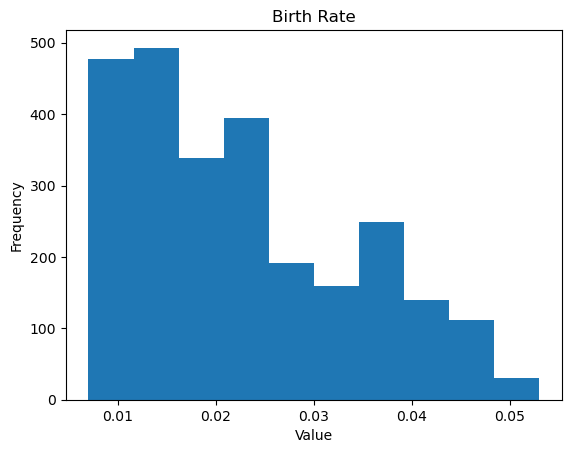

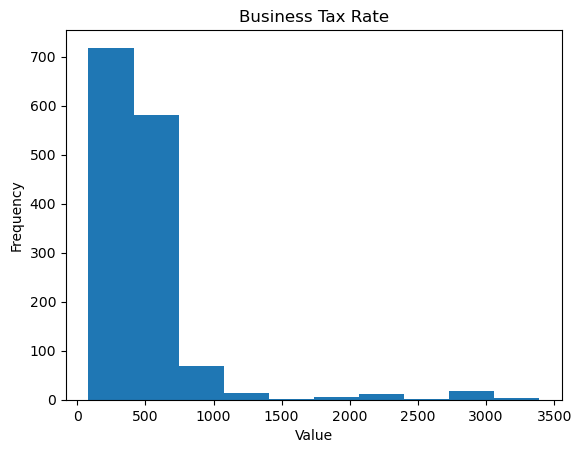

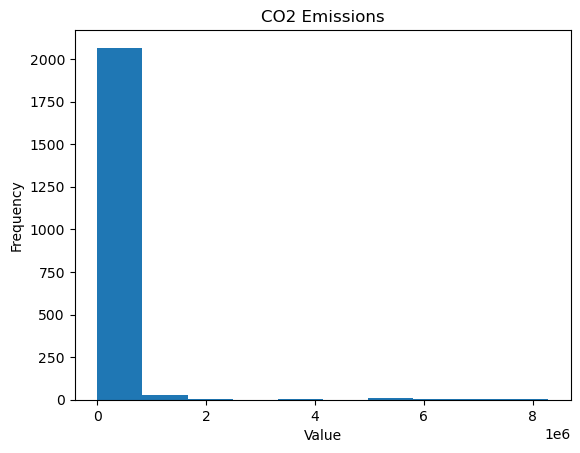

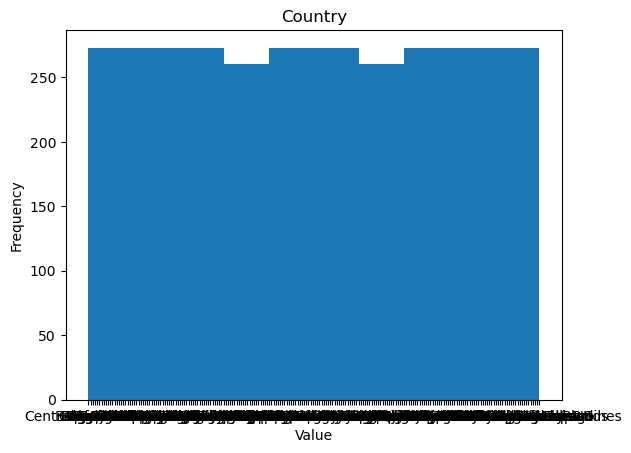

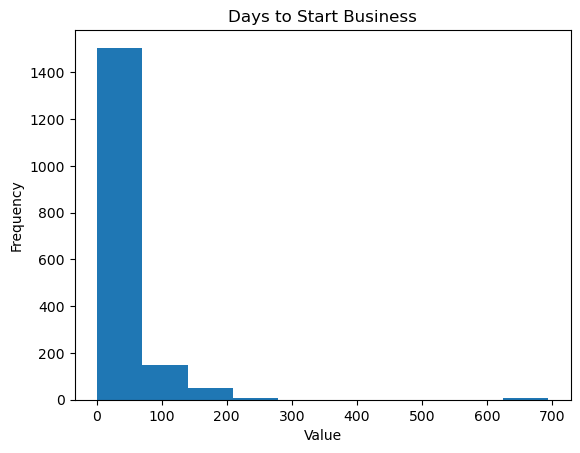

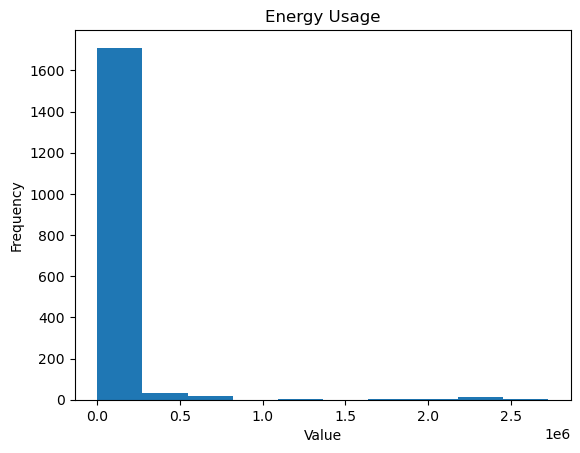

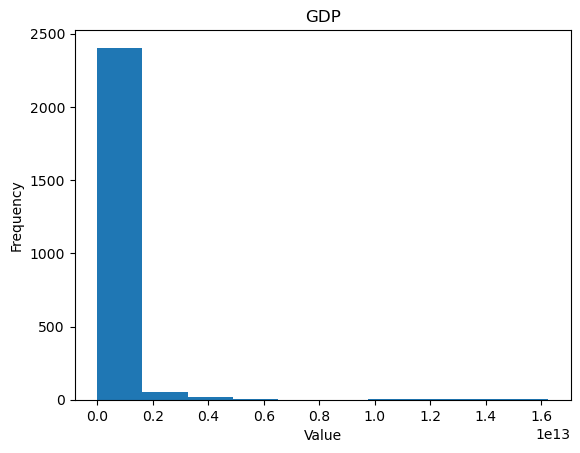

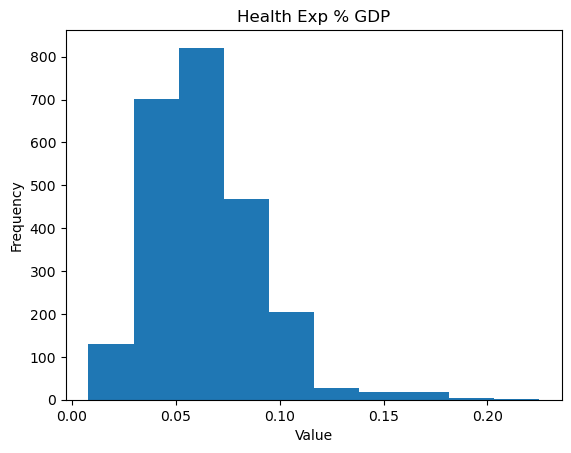

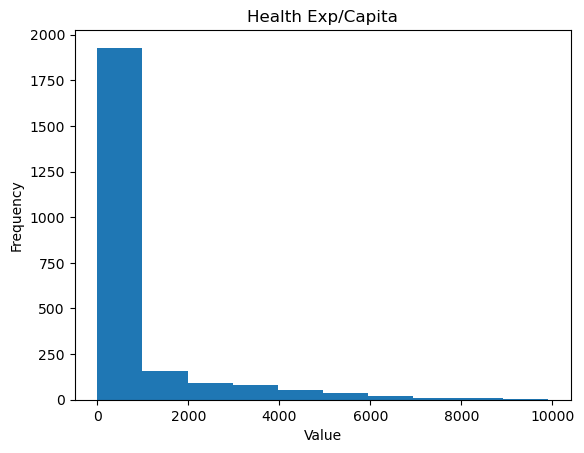

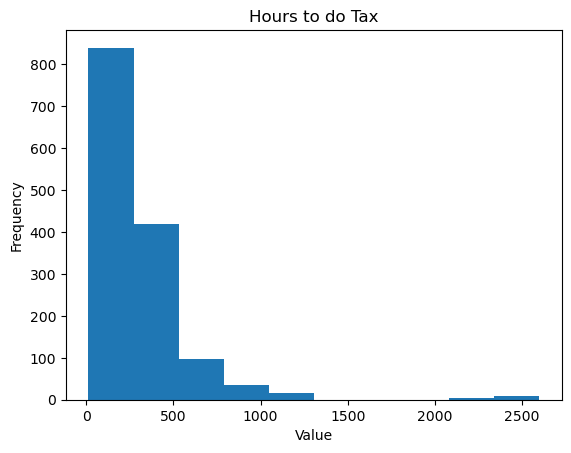

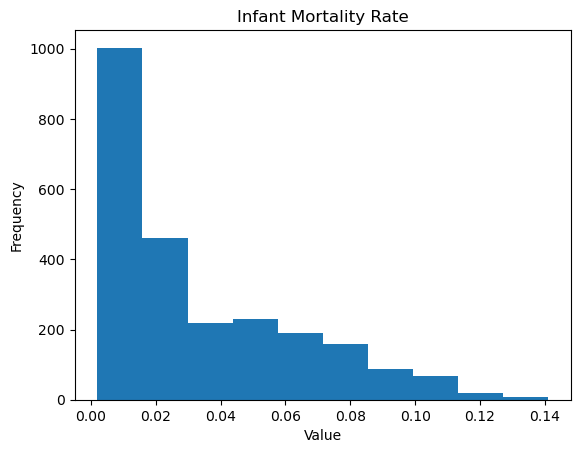

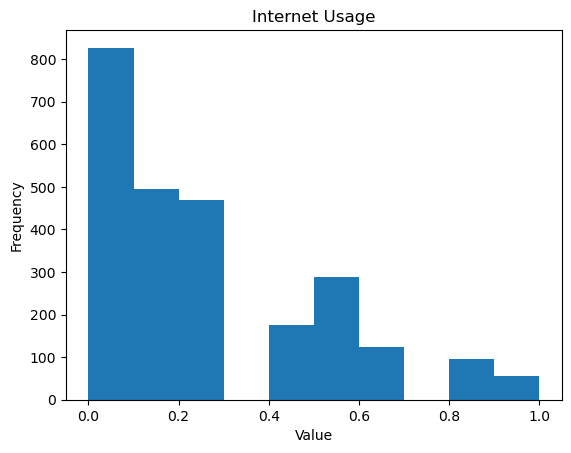

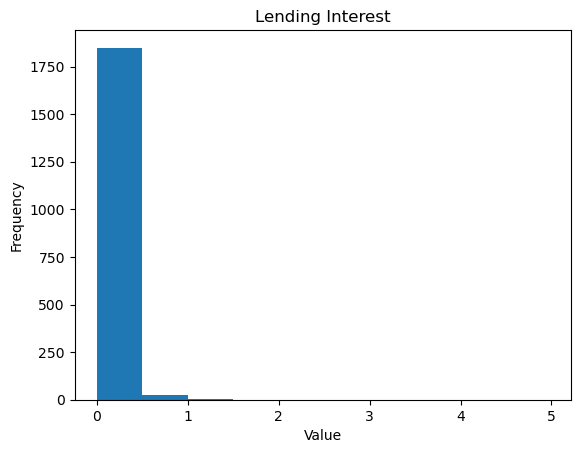

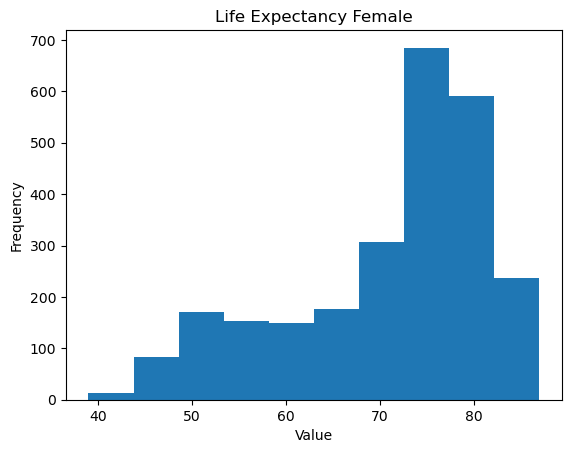

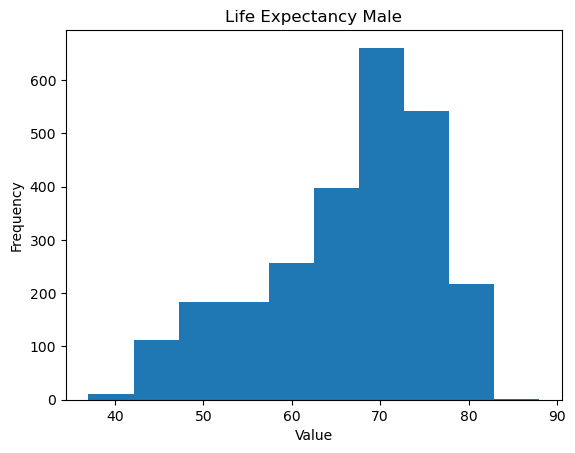

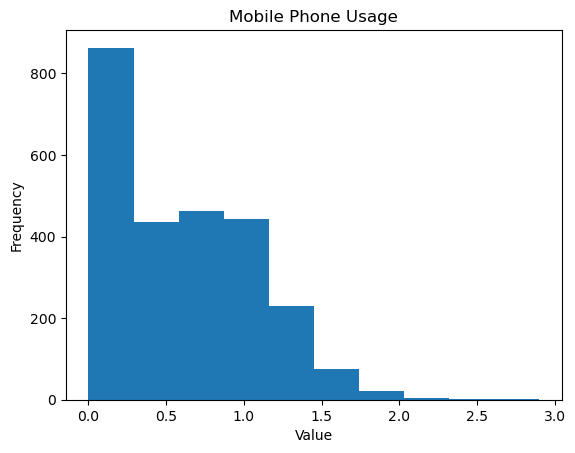

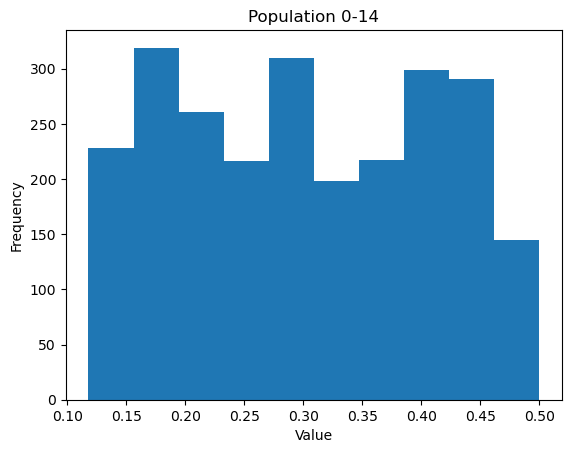

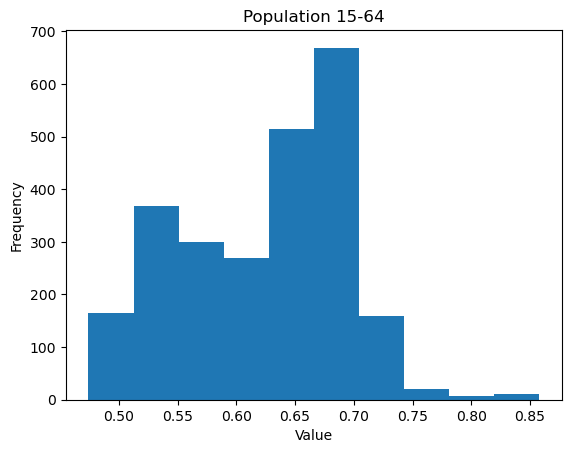

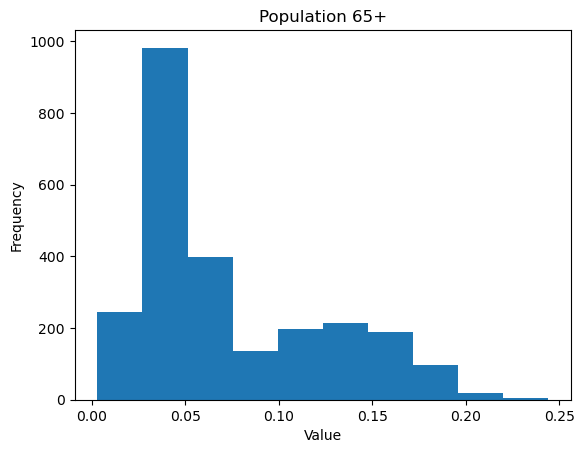

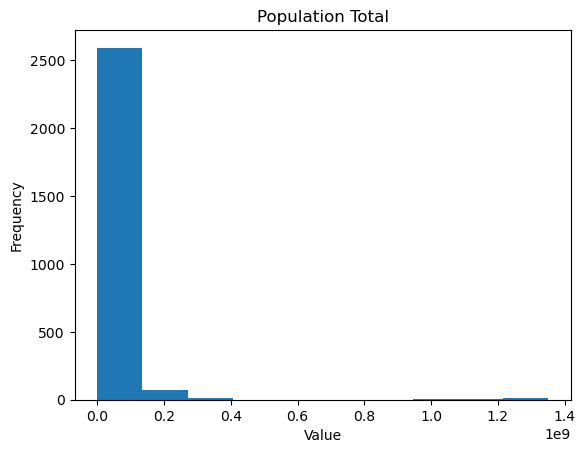

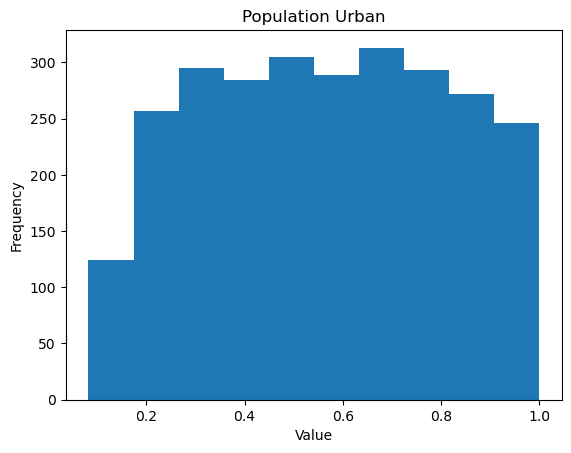

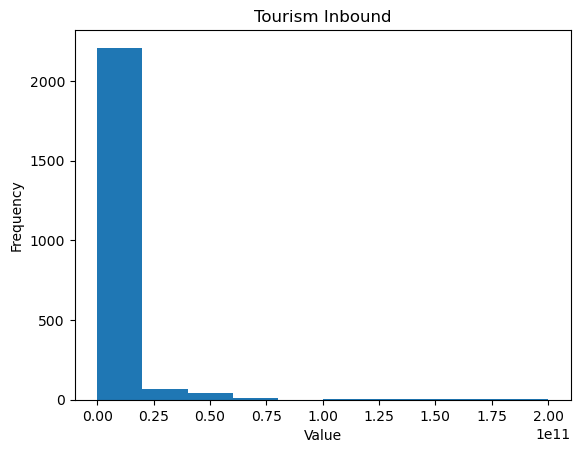

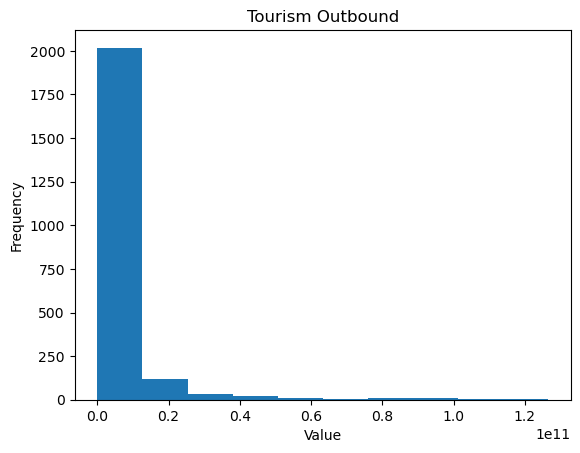

In [18]:
# Histogram of Data Distribution Visualization
for column in columns: 
    plt.hist(data_cleaned2[column])
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [19]:
data_cleaned2.skew().sort_values(ascending=True)

Life Expectancy Female    -0.891556
Life Expectancy Male      -0.705485
Population 15-64          -0.186881
Population Urban           0.012519
Population 0-14            0.059660
Mobile Phone Usage         0.569605
Birth Rate                 0.662151
Population 65+             0.919841
Internet Usage             0.940966
Infant Mortality Rate      1.049118
Health Exp % GDP           1.179757
Health Exp/Capita          2.817482
Business Tax Rate          4.342568
Hours to do Tax            4.491308
Tourism Outbound           5.210304
Energy Usage               7.062230
Tourism Inbound            7.114871
Days to Start Business     7.437592
CO2 Emissions              8.654039
Population Total           8.788164
GDP                        9.424247
Lending Interest          15.536119
dtype: float64

In [20]:
data_cleaned3=data_cleaned2.drop('Country',axis=1)

In [21]:
data_cleaned3

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0          0.020                NaN        87931.0                     NaN   
1          0.050                NaN         9542.0                     NaN   
2          0.043                NaN         1617.0                     NaN   
3          0.027                NaN         4276.0                     NaN   
4          0.046                NaN         1041.0                     NaN   
...          ...                ...            ...                     ...   
2699         NaN                NaN            NaN                     NaN   
2700       0.013              464.0            NaN                     5.0   
2701       0.015              419.0            NaN                     7.0   
2702       0.020              619.0            NaN                   144.0   
2703       0.011                NaN            NaN                     NaN   

      Energy Usage           GDP  Health Exp % GDP  Health Exp/Capita  \
0          26998.0  5.479006e+10             0.035               60.0   
1           7499.0  9.129595e+09             0.034               22.0   
2           1983.0  2.359122e+09             0.043               15.0   
3           1836.0  5.788312e+09             0.047              152.0   
4              NaN  2.610959e+09             0.051               12.0   
...            ...           ...               ...                ...   
2699           NaN           NaN               NaN                NaN   
2700     2132446.0  1.624460e+13             0.179             8895.0   
2701           NaN  5.000435e+10             0.089             1308.0   
2702           NaN  3.812862e+11             0.046              593.0   
2703           NaN           NaN               NaN                NaN   

      Hours to do Tax  Infant Mortality Rate  ...  Life Expectancy Female  \
0                 NaN                  0.034  ...                    71.0   
1                 NaN                  0.128  ...                    47.0   
2                 NaN                  0.090  ...                    57.0   
3                 NaN                  0.054  ...                    52.0   
4                 NaN                  0.096  ...                    52.0   
...               ...                    ...  ...                     ...   
2699              NaN                    NaN  ...                     NaN   
2700            175.0                  0.006  ...                    81.0   
2701            310.0                  0.010  ...                    80.0   
2702            792.0                  0.013  ...                    78.0   
2703              NaN                    NaN  ...                    83.0   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                     67.0                 0.0            0.342   
1                     44.0                 0.0            0.476   
2                     53.0                 0.0            0.454   
3                     49.0                 0.1            0.383   
4                     49.0                 0.0            0.468   
...                    ...                 ...              ...   
2699                   NaN                 NaN              NaN   
2700                  76.0                 1.0            0.196   
2701                  74.0                 1.5            0.220   
2702                  72.0                 1.0            0.288   
2703                  76.0                 NaN            0.206   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0                0.619           0.039          31719449             0.599   
1                0.499           0.025          13924930             0.324   
2                0.517           0.029           6949366             0.383   
3                0.587           0.029           1755375             0.532   
4                0.505           0.028          11607944             0.1

In [22]:
data_cleaned3.fillna(0,inplace =True)

In [23]:
columns= data_cleaned3.columns

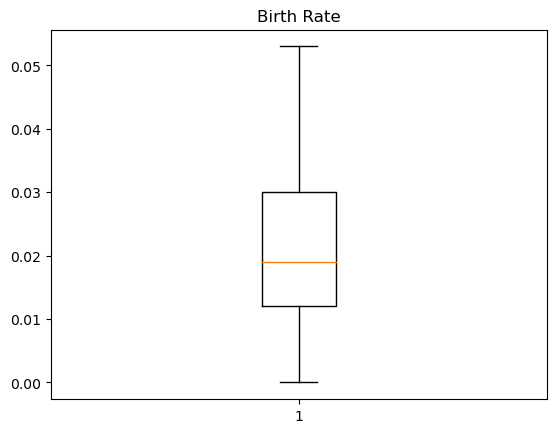

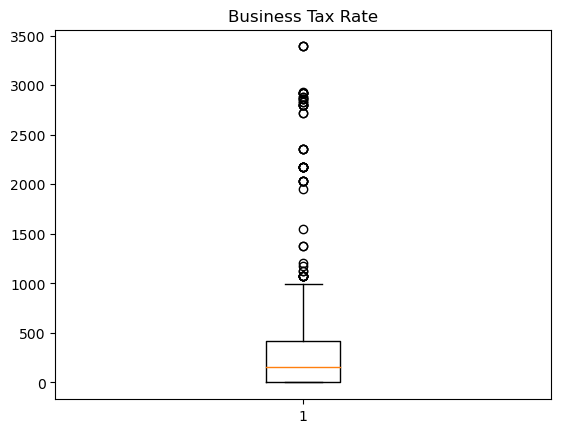

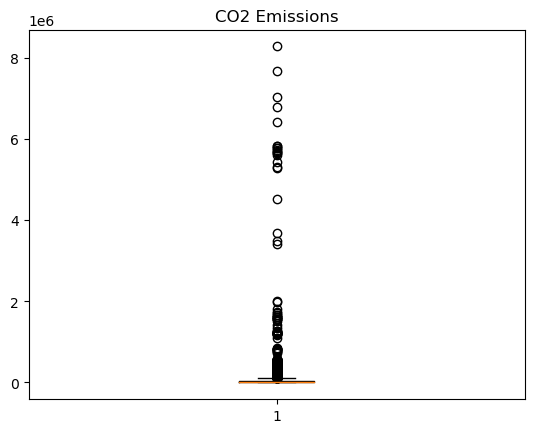

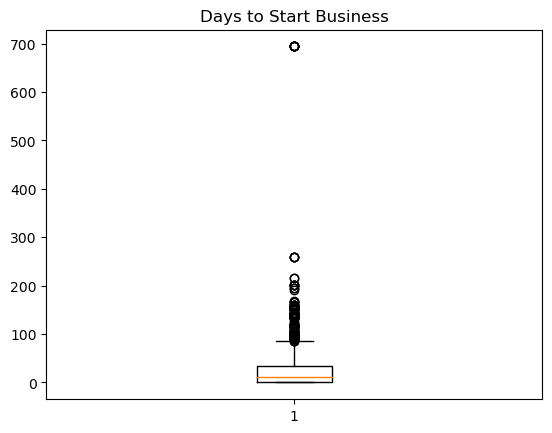

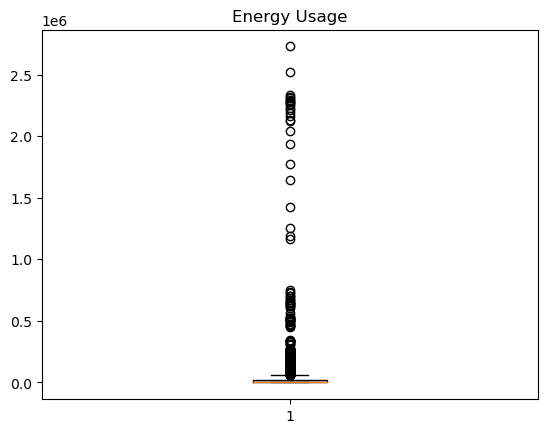

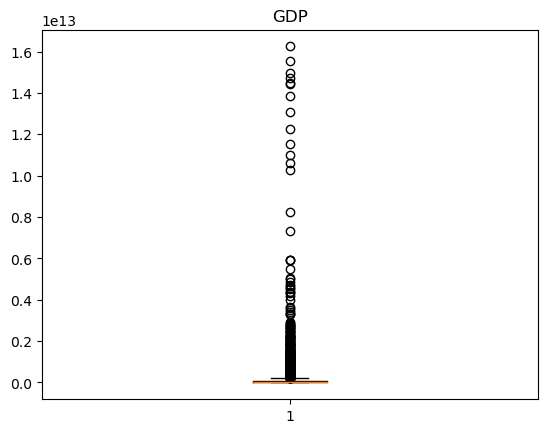

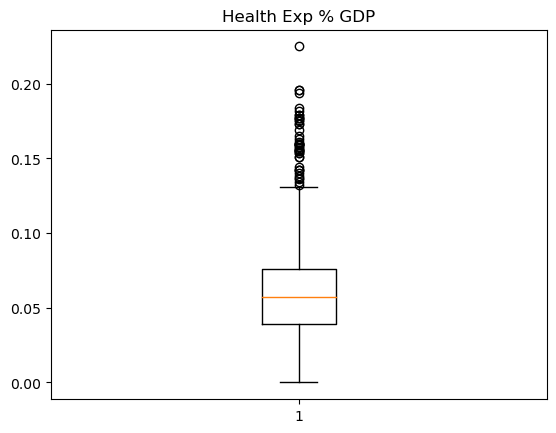

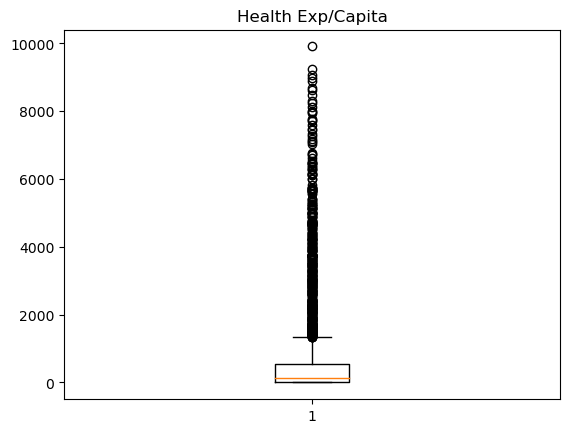

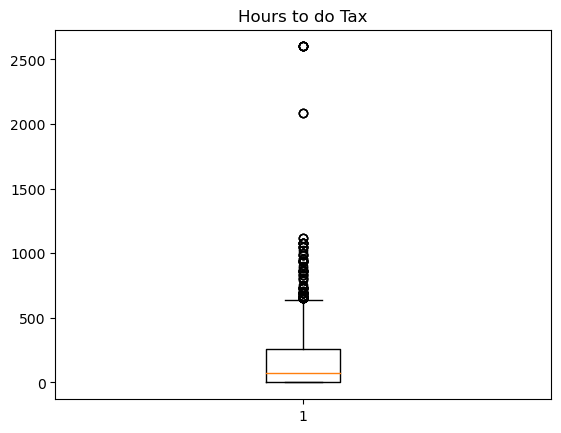

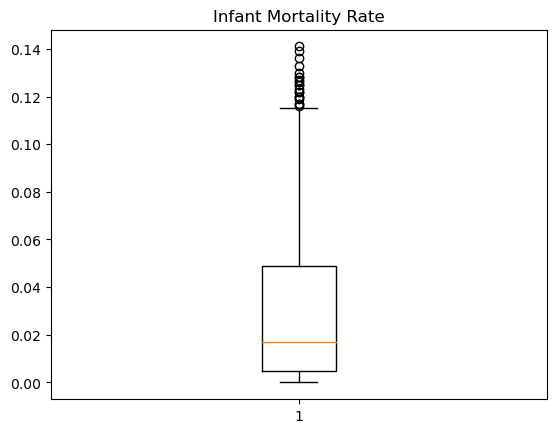

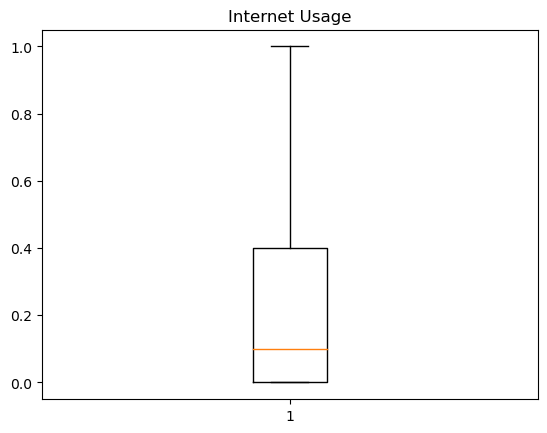

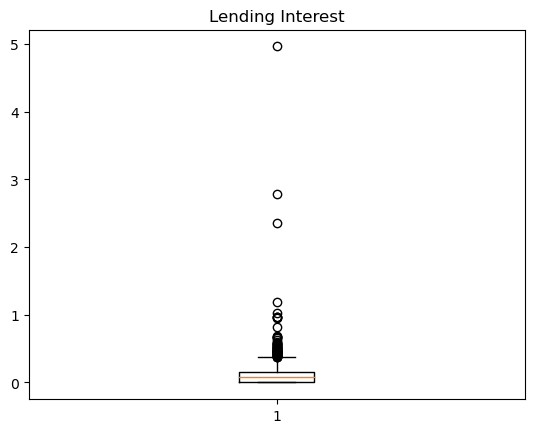

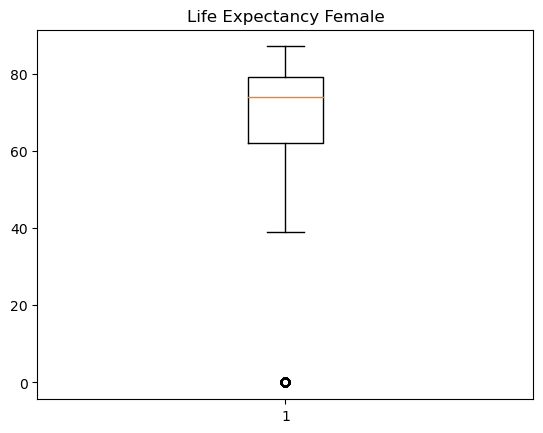

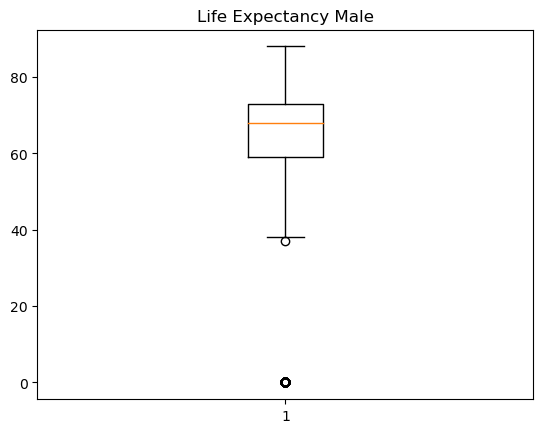

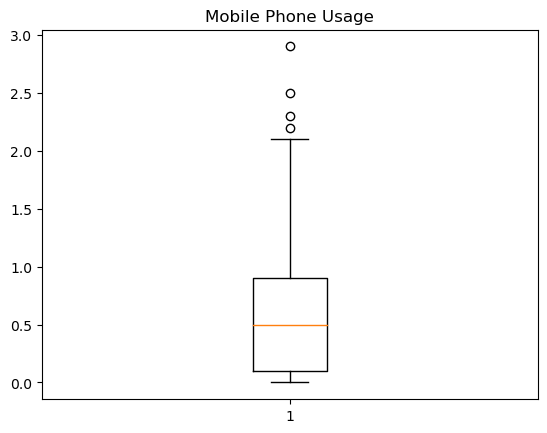

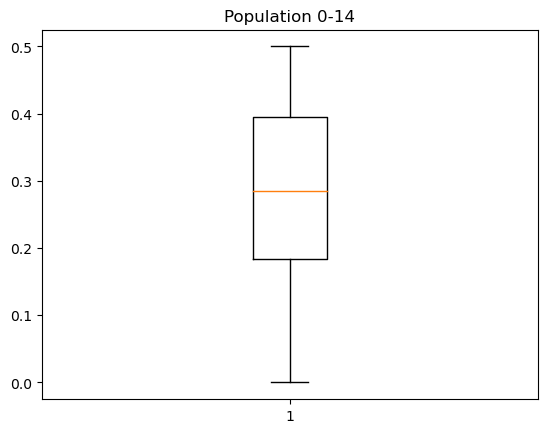

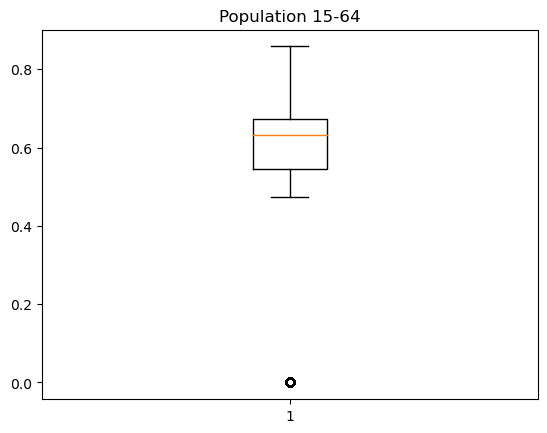

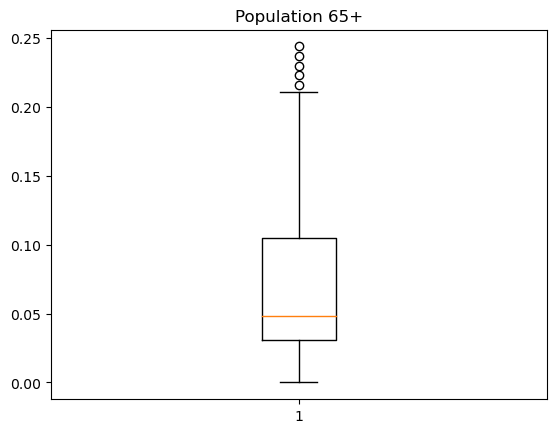

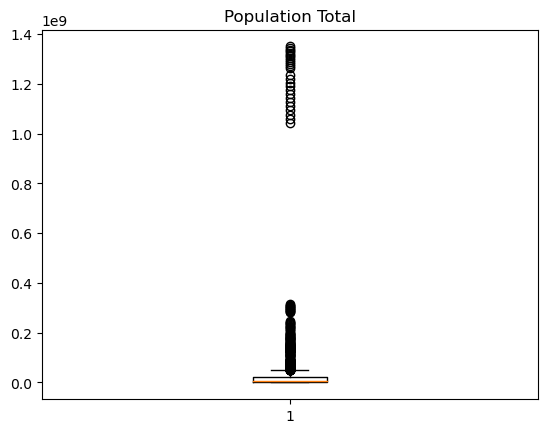

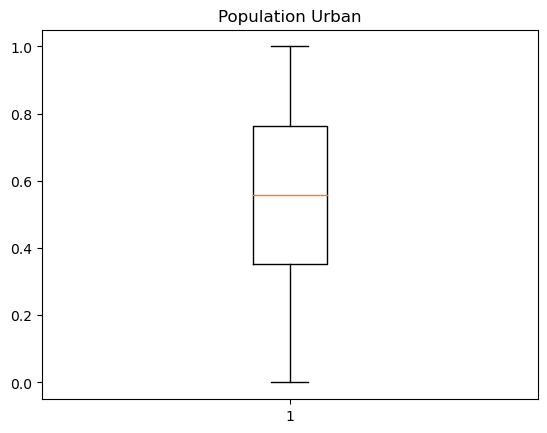

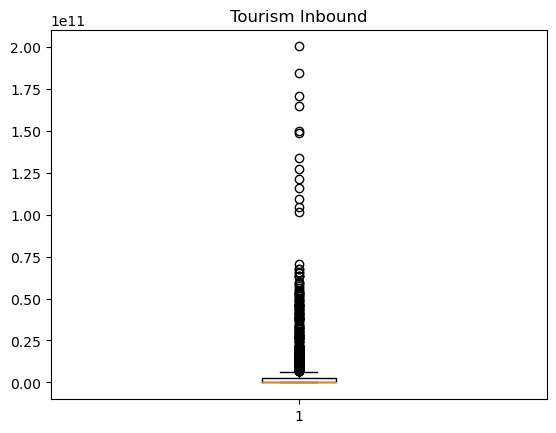

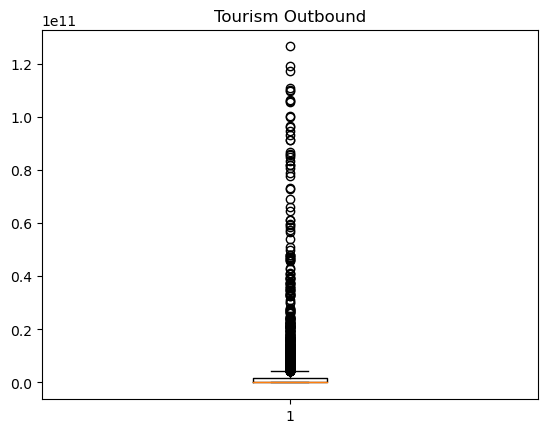

In [24]:
for column in data_cleaned3.columns:
    plt.boxplot(data_cleaned3[column])
    plt.title(column)
    plt.show()

In [25]:
df_merged = data_cleaned2.groupby("Country").mean()

In [26]:
df_merged.dtypes

Birth Rate                float64
Business Tax Rate         float64
CO2 Emissions             float64
Days to Start Business    float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total          float64
Population Urban          float64
Tourism Inbound           float64
Tourism Outbound          float64
dtype: object

In [27]:
df_merged.describe()

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
count  206.000000         185.000000   1.950000e+02              185.000000   
mean     0.022505         484.032117   1.411257e+05               40.657432   
std      0.011215         383.027209   6.024845e+05               57.610193   
min      0.008385          84.000000   1.725000e+01                3.000000   
25%      0.012827         331.000000   1.401091e+03               17.500000   
50%      0.019577         410.625000   7.856455e+03               27.700000   
75%      0.029115         516.500000   5.903514e+04               43.200000   
max      0.051154        3074.000000   5.673742e+06              694.000000   

       Energy Usage           GDP  Health Exp % GDP  Health Exp/Capita  \
count  1.670000e+02  1.970000e+02        185.000000         185.000000   
mean   6.614570e+04  2.573031e+11          0.064051         798.193461   
std    2.385347e+05  1.090124e+12          0.024954        1401.444867   
min    9.250000e+00  1.145310e+08          0.020615           8.538462   
25%    2.355667e+03  3.874152e+09          0.047538          52.461538   
50%    8.974167e+03  1.706592e+10          0.060769         219.384615   
75%    3.095887e+04  1.148514e+11          0.079538         621.615385   
max    2.250944e+06  1.330715e+13          0.180385        6967.384615   

       Hours to do Tax  Infant Mortality Rate  ...  Life Expectancy Female  \
count       185.000000             188.000000  ...              203.000000   
mean        299.354208               0.032813  ...               71.302191   
std         263.395831               0.029414  ...               10.546176   
min          12.000000               0.002308  ...               42.769231   
25%         155.875000               0.008596  ...               65.423077   
50%         241.000000               0.020000  ...               75.307692   
75%         342.500000               0.054327  ...               79.192308   
max        2600.000000               0.125154  ...               85.615385   

       Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
count            203.000000          203.000000       192.000000   
mean              66.581118            0.570847         0.302916   
std                9.223669            0.345325         0.105282   
min               42.000000            0.000000         0.137538   
25%               61.269231            0.261538         0.204000   
50%               69.000000            0.561538         0.300308   
75%               73.384615            0.838462         0.394808   
max               80.153846            1.511111         0.491462   

       Population 15-64  Population 65+  Population Total  Population Urban  \
count        192.000000      192.000000      2.080000e+02        206.000000   
mean           0.623652        0.073433      3.145729e+07          0.562953   
std            0.068086        0.049243      1.244600e+08          0.245851   
min            0.483462        0.006692      2.668023e+04          0.096538   
25%            0.563385        0.032981      9.911953e+05          0.357154   
50%            0.644654        0.053462      5.698424e+06          0.560077   
75%            0.674500        0.111769      2.002100e+07          0.764808   
max            0.804308        0.205692      1.309265e+09          1.000000   

       Tourism Inbound  Tourism Outbound  
count     1.920000e+02      1.860000e+02  
mean      4.653710e+09      4.410565e+09  
std       1.301581e+10      1.236249e+10  
min       1.884615e+06      3.285714e+05  
25%       1.484327e+08      1.085962e+08  
50%       6.570385e+08      4.347094e+08  
75%       3.582462e+09      2.777942e+09  
max       1.408008e+11      1.024878e+11  

[8 rows x 22 columns]

In [28]:
# Checking count of missing values
df_merged.isnull().sum()

Birth Rate                 2
Business Tax Rate         23
CO2 Emissions             13
Days to Start Business    23
Energy Usage              41
GDP                       11
Health Exp % GDP          23
Health Exp/Capita         23
Hours to do Tax           23
Infant Mortality Rate     20
Internet Usage             9
Lending Interest          45
Life Expectancy Female     5
Life Expectancy Male       5
Mobile Phone Usage         5
Population 0-14           16
Population 15-64          16
Population 65+            16
Population Total           0
Population Urban           2
Tourism Inbound           16
Tourism Outbound          22
dtype: int64

In [29]:
df_merged.fillna(0,inplace=True)

In [30]:
df_merged.isnull().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Days to Start Business    0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

- **Correlation Analysis**

In [31]:
#Checking for Correlation
df_merged.corr()

Birth Rate  Business Tax Rate  CO2 Emissions  \
Birth Rate                1.000000           0.344378      -0.155945   
Business Tax Rate         0.344378           1.000000       0.055354   
CO2 Emissions            -0.155945           0.055354       1.000000   
Days to Start Business    0.203982           0.096678      -0.033850   
Energy Usage             -0.159572           0.058133       0.992701   
GDP                      -0.176949           0.040305       0.836017   
Health Exp % GDP         -0.009151           0.259441       0.186622   
Health Exp/Capita        -0.432180          -0.059306       0.264913   
Hours to do Tax           0.155593           0.263029       0.092458   
Infant Mortality Rate     0.882437           0.387427      -0.103547   
Internet Usage           -0.691426          -0.196301       0.143219   
Lending Interest          0.251196           0.243921      -0.054687   
Life Expectancy Female   -0.457942          -0.092336       0.110729   
Life Expectancy Male     -0.407070          -0.097069       0.113178   
Mobile Phone Usage       -0.663650          -0.187363       0.060809   
Population 0-14           0.862284           0.316464      -0.109948   
Population 15-64         -0.116465           0.111892       0.128130   
Population 65+           -0.602995          -0.006196       0.171494   
Population Total         -0.045799           0.092423       0.731765   
Population Urban         -0.587289          -0.179559       0.086326   
Tourism Inbound          -0.265190           0.025581       0.725712   
Tourism Outbound         -0.269655           0.027102       0.699272   

                        Days to Start Business  Energy Usage       GDP  \
Birth Rate                            0.203982     -0.159572 -0.176949   
Business Tax Rate                     0.096678      0.058133  0.040305   
CO2 Emissions                        -0.033850      0.992701  0.836017   
Days to Start Business                1.000000     -0.034434 -0.053688   
Energy Usage                         -0.034434      1.000000  0.882183   
GDP                                  -0.053688      0.882183  1.000000   
Health Exp % GDP                      0.033342      0.212454  0.310072   
Health Exp/Capita                    -0.141508      0.301514  0.458667   
Hours to do Tax                       0.218098      0.108642  0.056087   
Infant Mortality Rate                 0.226426     -0.106383 -0.147668   
Internet Usage                       -0.228022      0.164904  0.276685   
Lending Interest                      0.240342     -0.048892 -0.064149   
Life Expectancy Female               -0.070509      0.117996  0.153821   
Life Expectancy Male                 -0.072355      0.118792  0.156959   
Mobile Phone Usage                   -0.142602      0.069684  0.134496   
Population 0-14                       0.252867     -0.112766 -0.138278   
Population 15-64                      0.088053      0.133442  0.118783   
Population 65+                       -0.119771      0.191194  0.278725   
Population Total                      0.019822      0.696697  0.387080   
Population Urban                     -0.118799      0.100061  0.165583   
Tourism Inbound                      -0.093003      0.770684  0.889993   
Tourism Outbound                     -0.086131      0.741586  0.859177   

                        Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
Birth Rate                     -0.009151          -0.432180         0.155593   
Business Tax Rate               0.259441          -0.059306         0.263029   
CO2 Emissions                   0.186622           0.264913         0.092458   
Days to Start Business          0.033342          -0.141508         0.218098   
Energy Usage                    0.212454           0.301514         0.108642   
GDP                             0.310072           0.458667         0.056087   
Health Exp % GDP                1.000000           0.468098         0.165314   
Health Exp/Capita       

<AxesSubplot:>

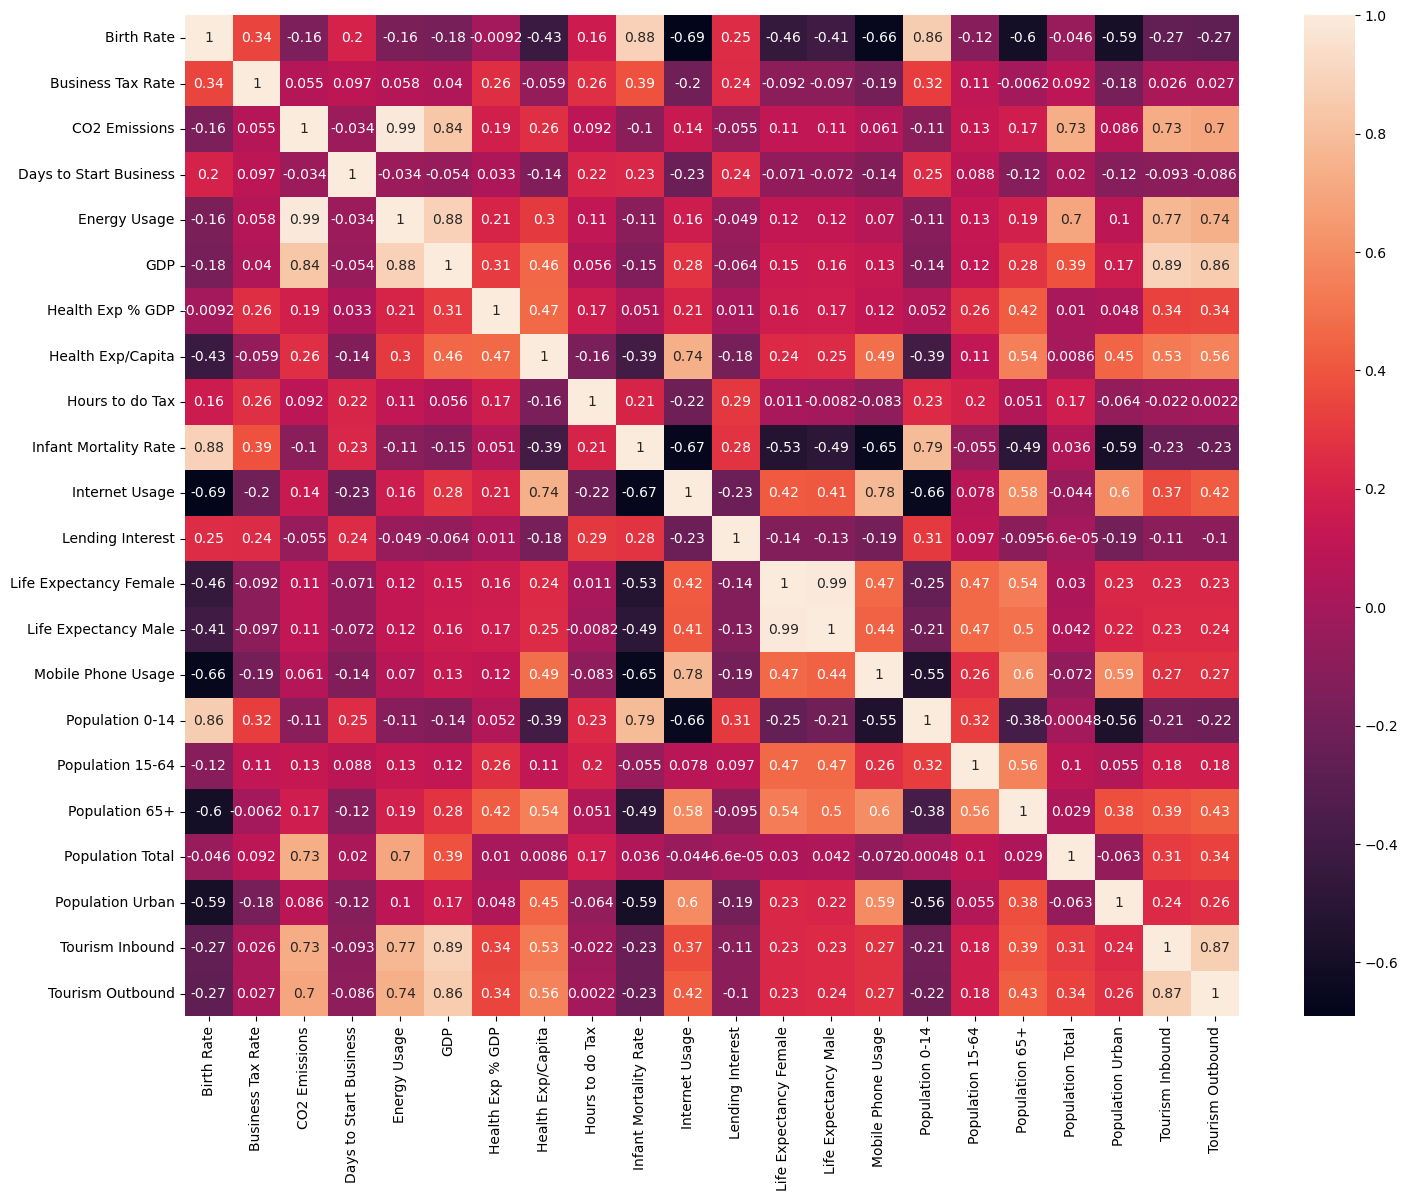

In [32]:
#plotting heatmap for Correlation
plt.figure(figsize=(17, 13))
sns.heatmap(df_merged.corr(), annot=True)

- **Explaination**

1) Birthrate has strong positive correlation with Population 0-14, infant Mortality Rate and strong Negative correlation with Life Expectancy Male, Life Expectancy FeMale. 

2) Co2 Emission has strong correlation with Tourism Outbound, Tourism Inbound, Population Total, GDP and Energy Usage.

3) Ease of Business has a Neagtive correlation with Internet Usage Energy Usage has Positive correlation with Tourism Outbound, Tourism Inbound, GDP and Co2 Emission. 

4) GDP has positive correlation with Tourism Outbound,

In [33]:
df1 = df_merged.copy()

In [34]:
df1.reset_index(inplace=True)

In [35]:
df1.head()

Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
0    Afghanistan    0.043154            363.000    2375.727273   
1        Albania    0.014692            425.500    3902.090909   
2        Algeria    0.022077            737.125  102837.636364   
3  AmericanSamoa    0.020500              0.000       0.000000   
4        Andorra    0.010583              0.000     537.636364   

   Days to Start Business  Energy Usage           GDP  Health Exp % GDP  \
0                8.111111      0.000000  9.718945e+09          0.091909   
1               23.000000   2024.583333  8.895522e+09          0.061462   
2               25.000000  34042.166667  1.190391e+11          0.038462   
3                0.000000      0.000000  0.000000e+00          0.000000   
4                0.000000      0.000000  2.268380e+09          0.063231   

   Health Exp/Capita  Hours to do Tax  ...  Life Expectancy Female  \
0          30.636364            275.0  ...               58.769231   
1         168.846154            364.5  ...               79.230769   
2         133.846154            451.0  ...               71.615385   
3           0.000000              0.0  ...                0.000000   
4        2394.461538              0.0  ...                0.000000   

   Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0             56.384615            0.254545         0.490308   
1             73.000000            0.561538         0.258385   
2             68.384615            0.492308         0.292692   
3              0.000000            0.000000         0.000000   
4              0.000000            0.700000         0.000000   

   Population 15-64  Population 65+  Population Total  Population Urban  \
0          0.488769        0.020769      2.539926e+07          0.232923   
1          0.653692        0.087923      2.956845e+06          0.478538   
2          0.663077        0.044231      3.476067e+07          0.645154   
3          0.000000        0.000000      5.752538e+04          0.880000   
4          0.000000        0.000000      7.668408e+04          0.897462   

   Tourism Inbound  Tourism Outbound  
0     1.060000e+08      8.240000e+07  
1     1.165231e+09      1.007077e+09  
2     2.752308e+08      4.513077e+08  
3     0.000000e+00      0.000000e+00  
4     0.000000e+00      0.000000e+00  

[5 rows x 23 columns]

In [36]:
df1.columns

Index(['Country', 'Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Energy Usage', 'GDP', 'Health Exp % GDP',
       'Health Exp/Capita', 'Hours to do Tax', 'Infant Mortality Rate',
       'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
       'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'Population Total',
       'Population Urban', 'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

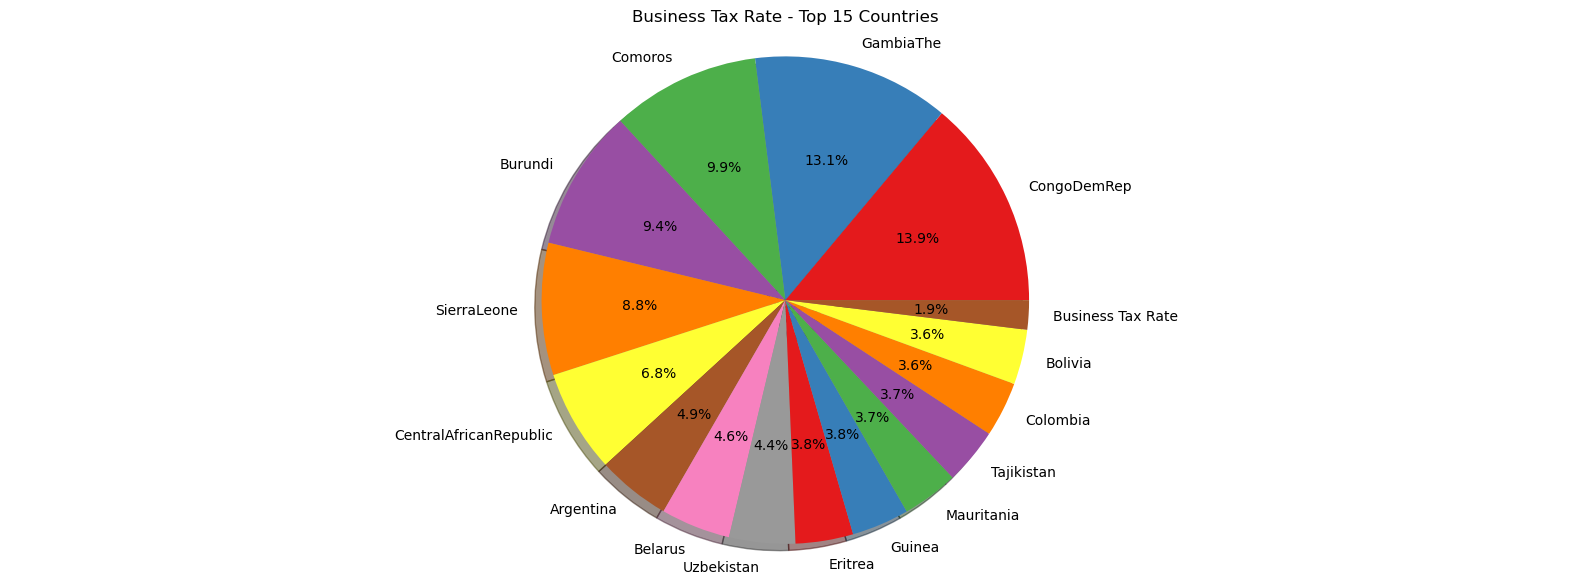

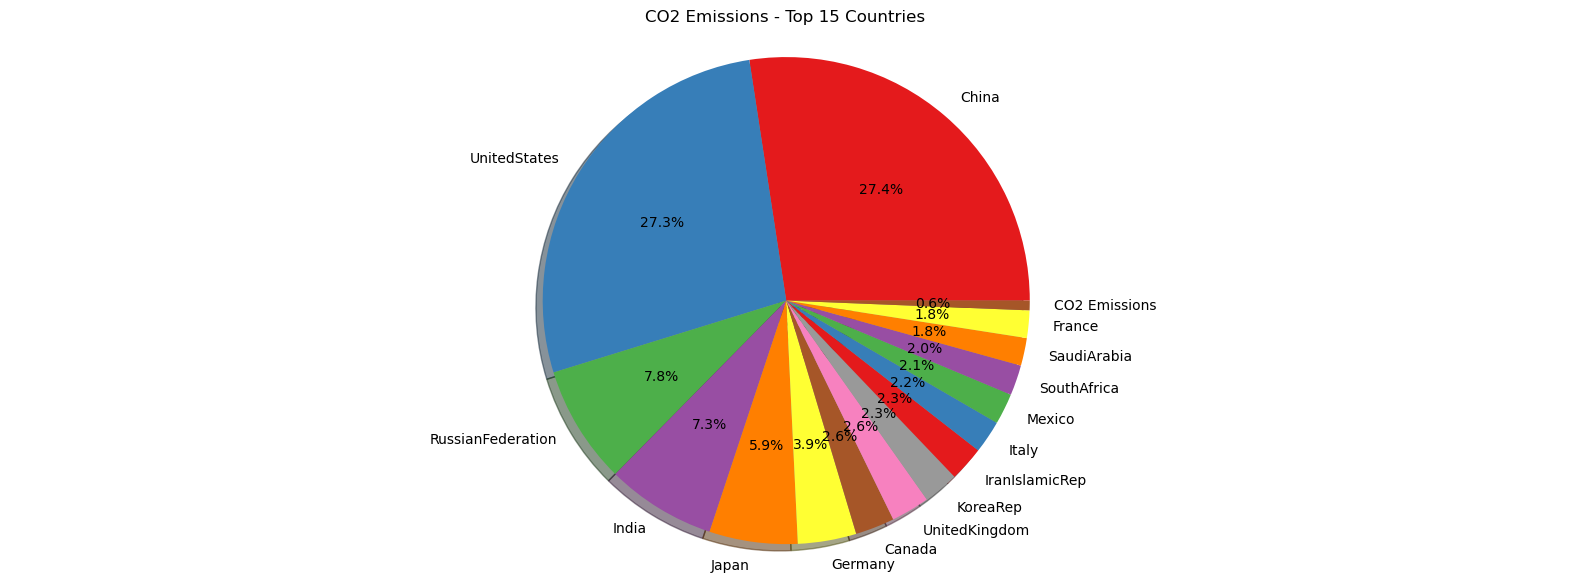

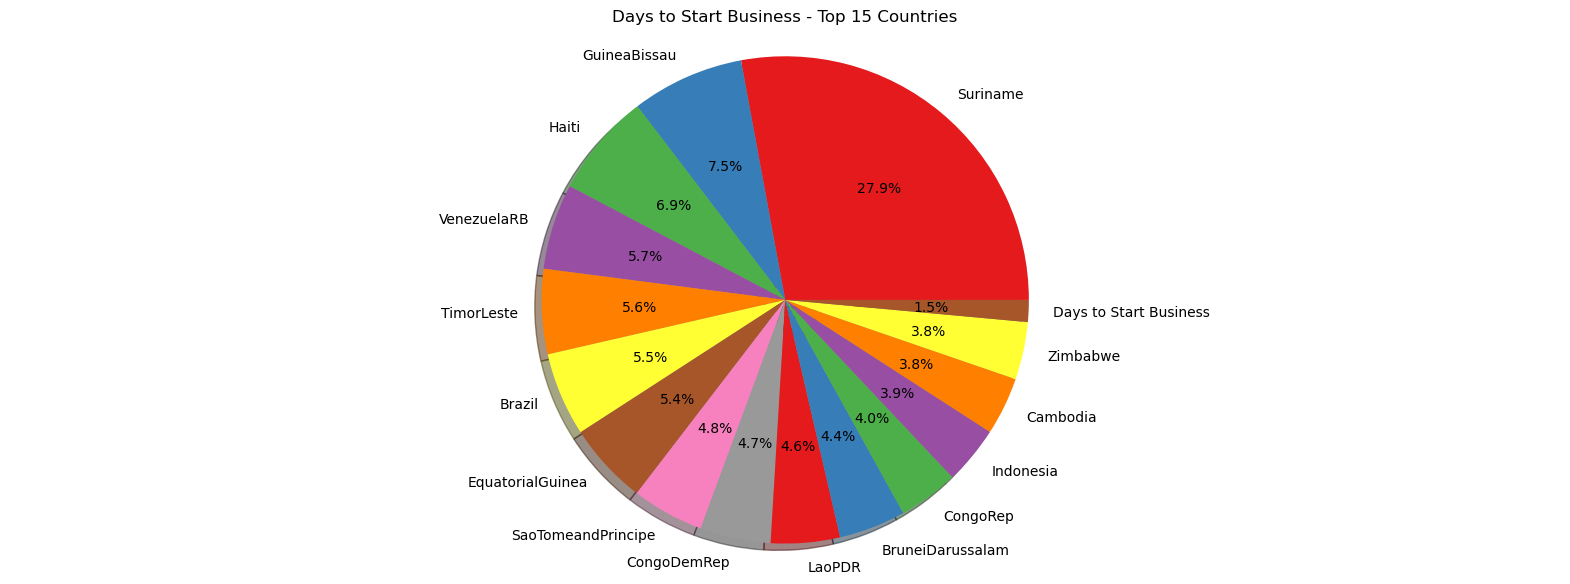

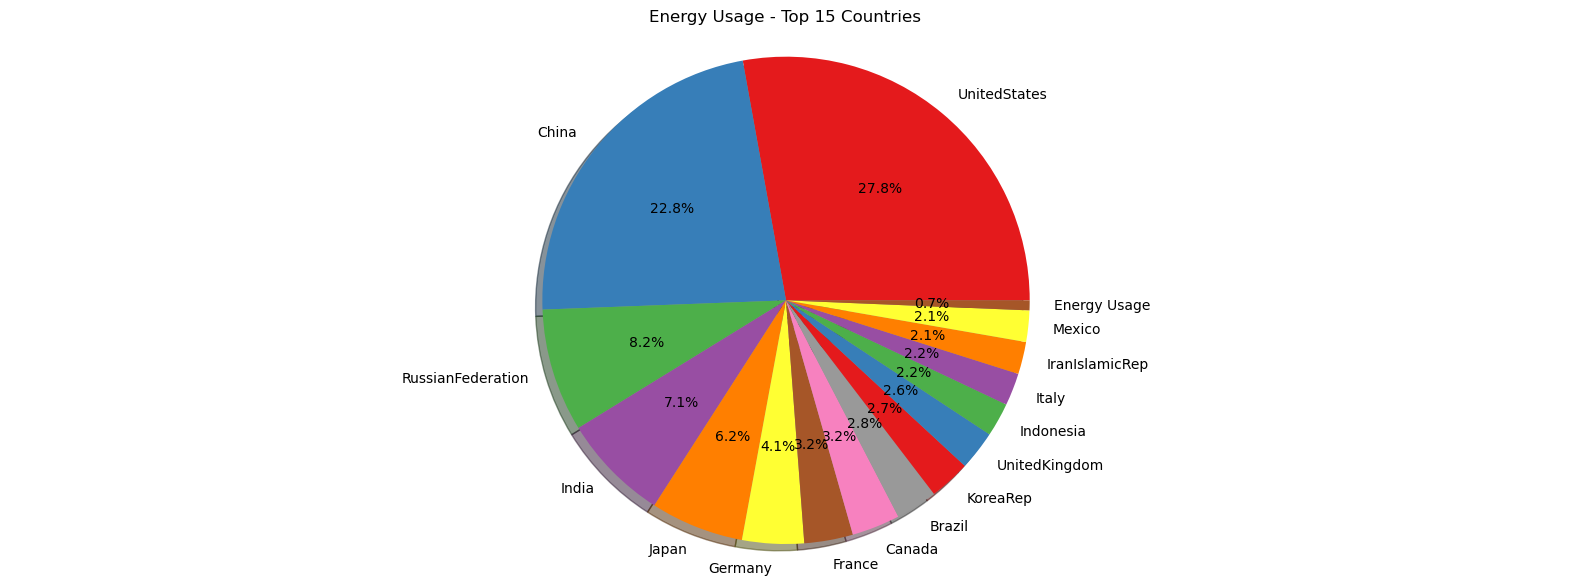

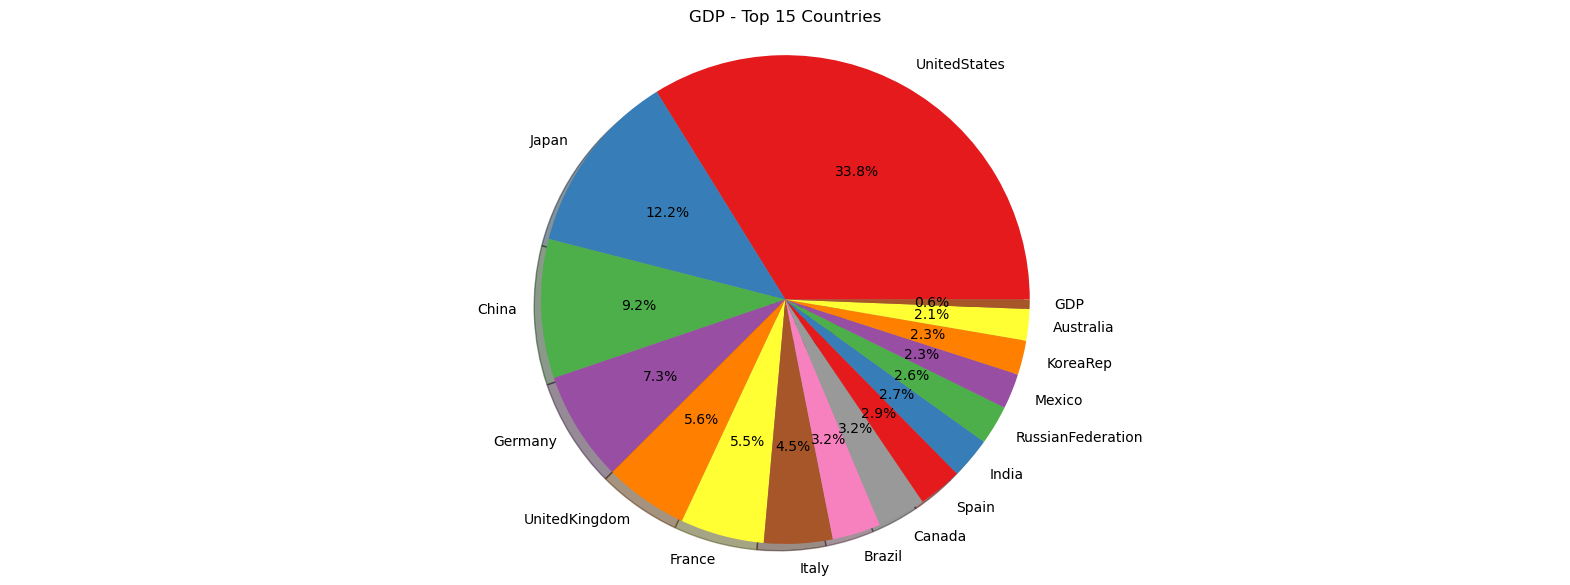

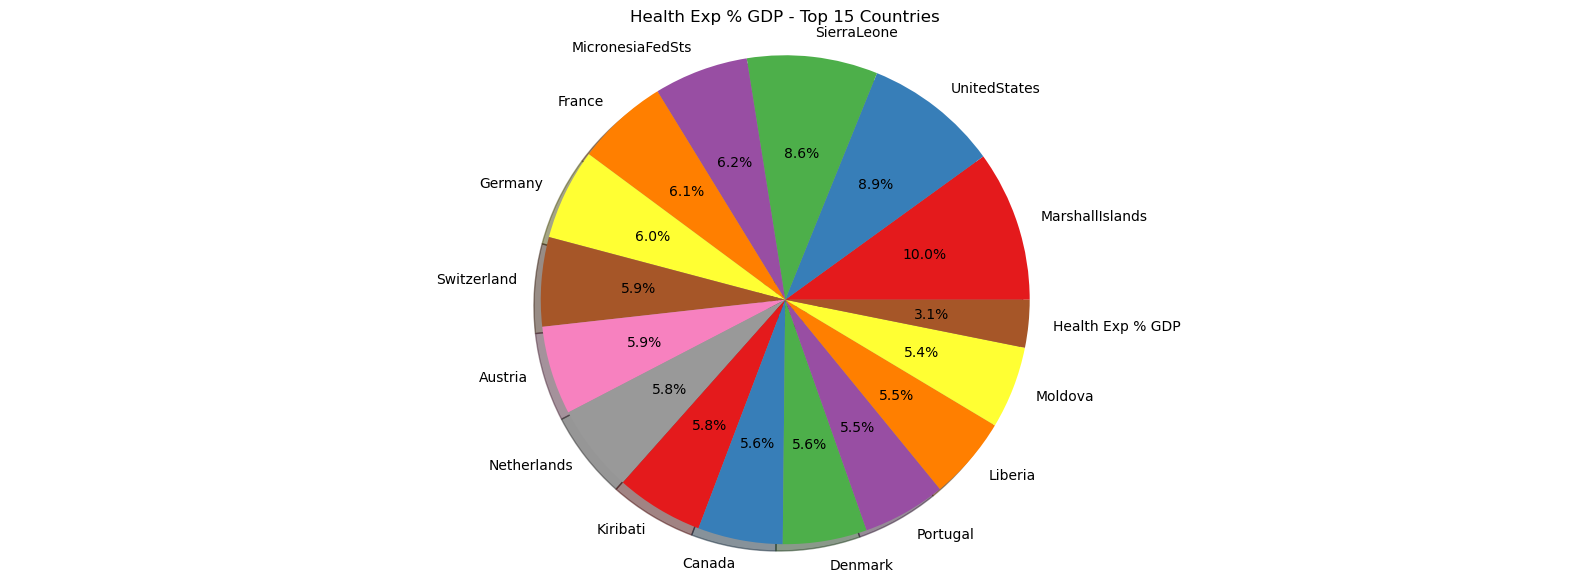

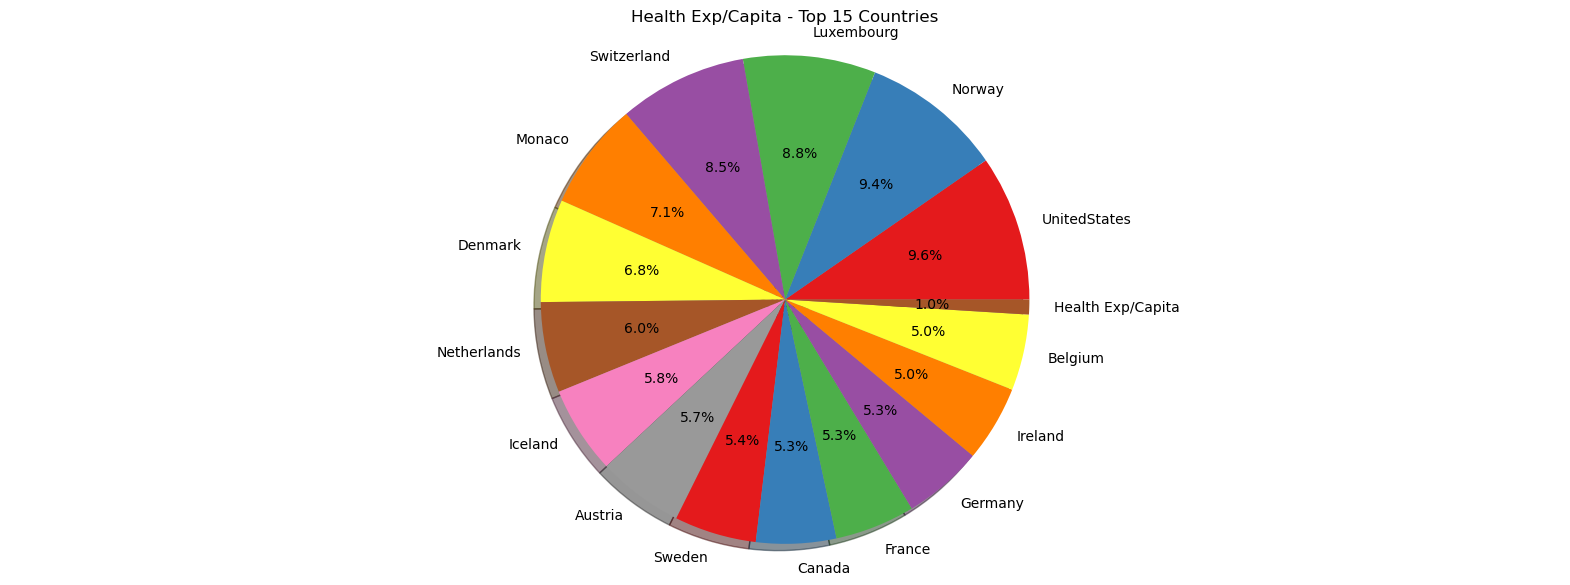

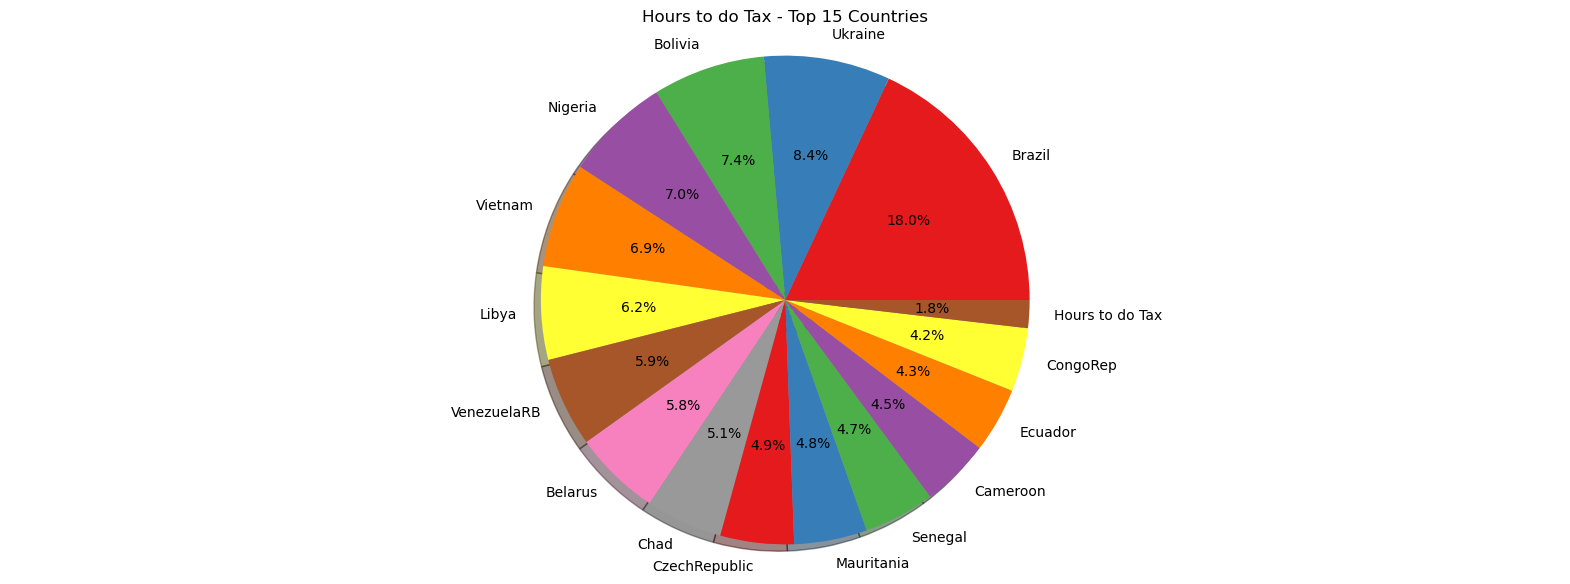

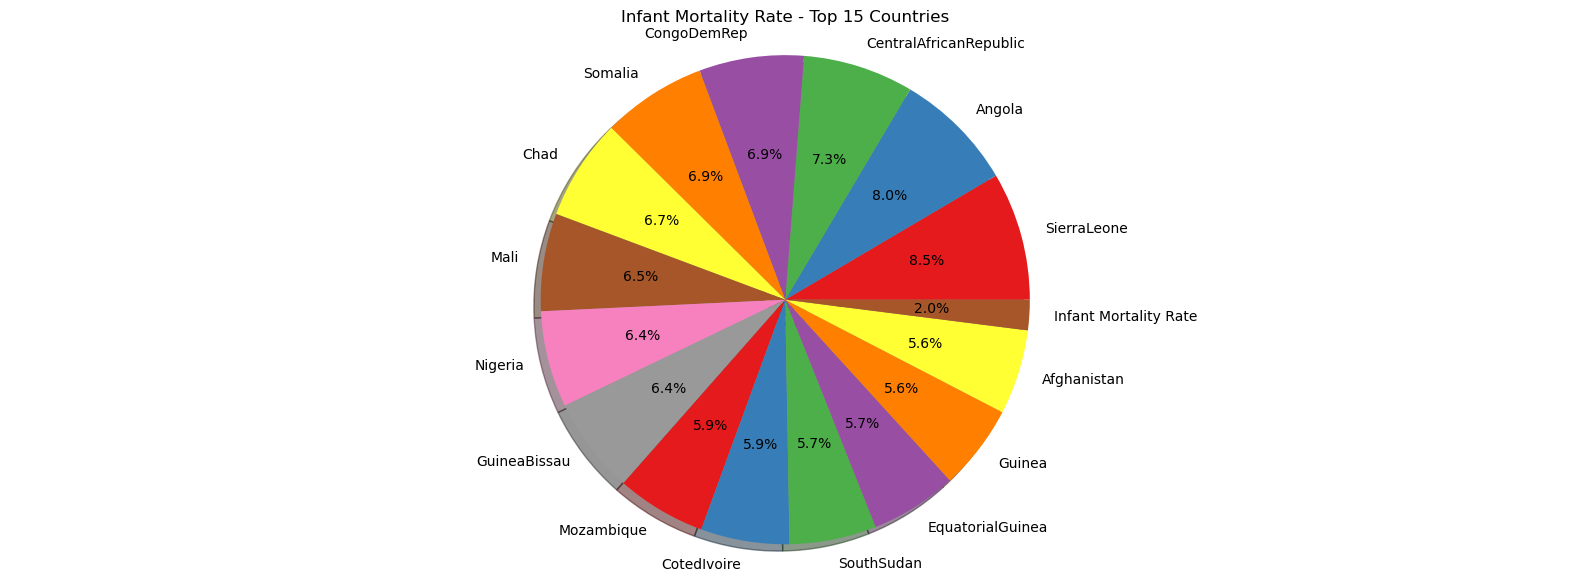

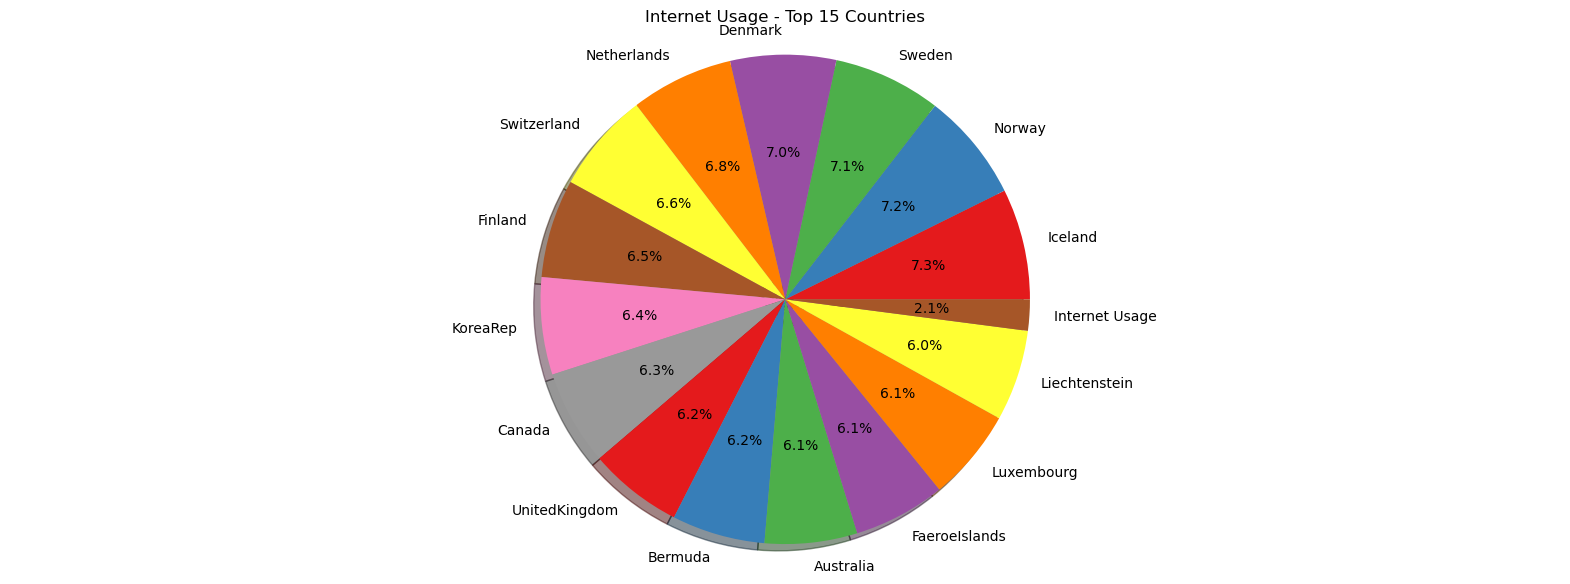

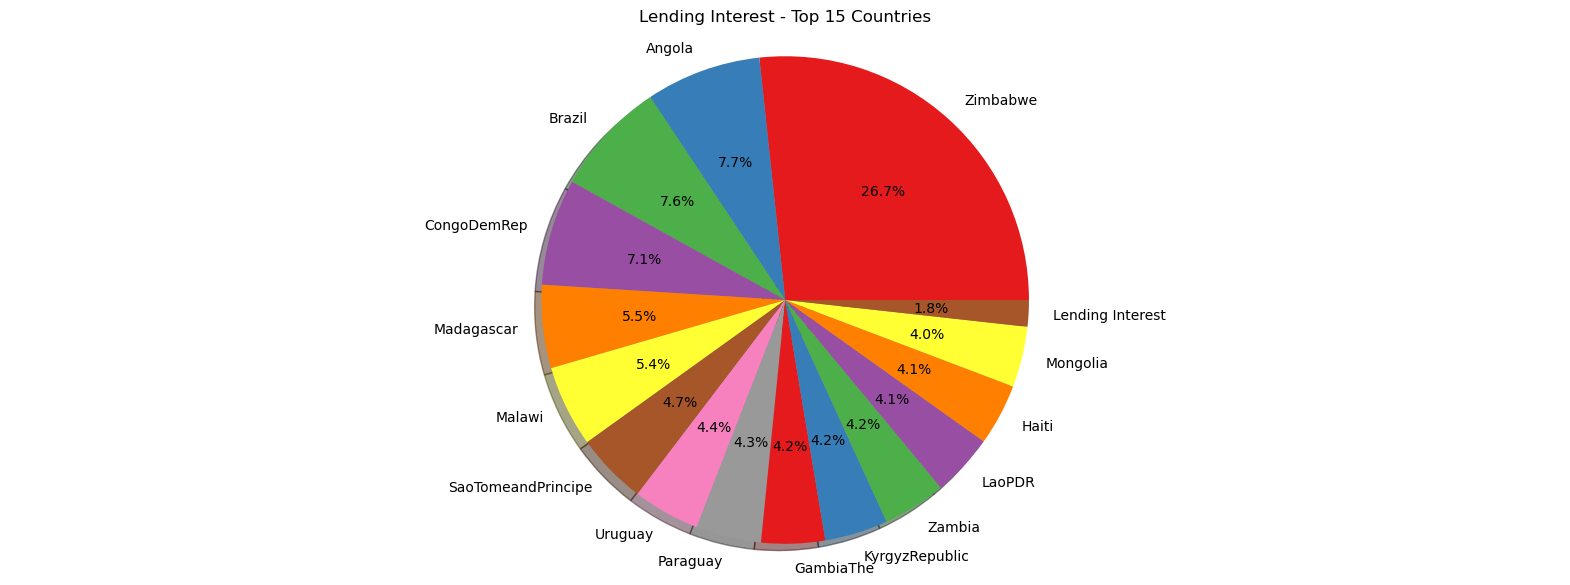

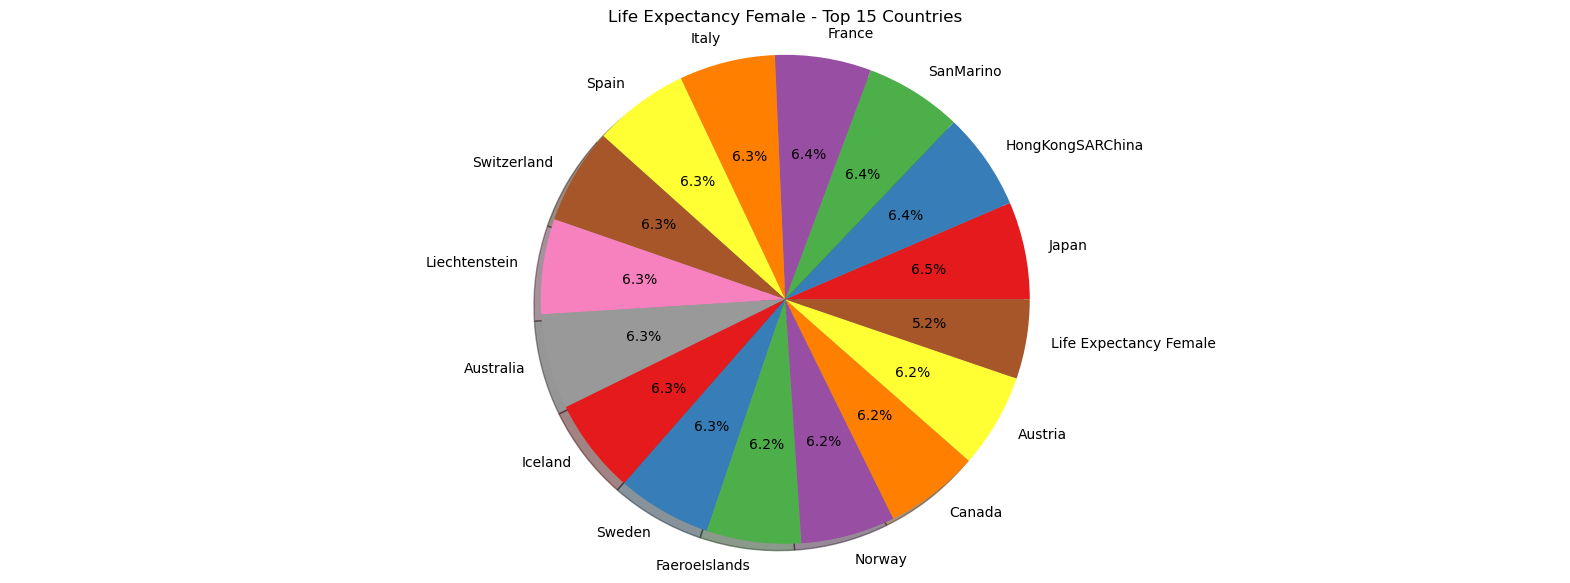

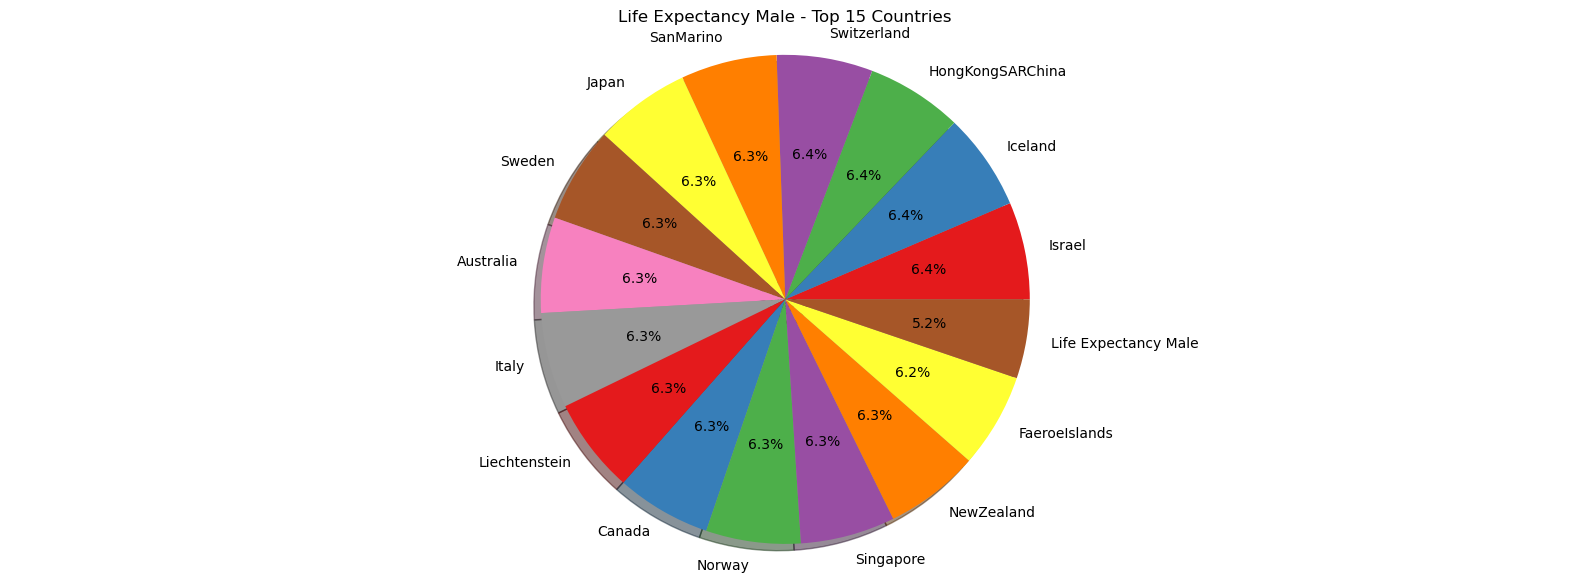

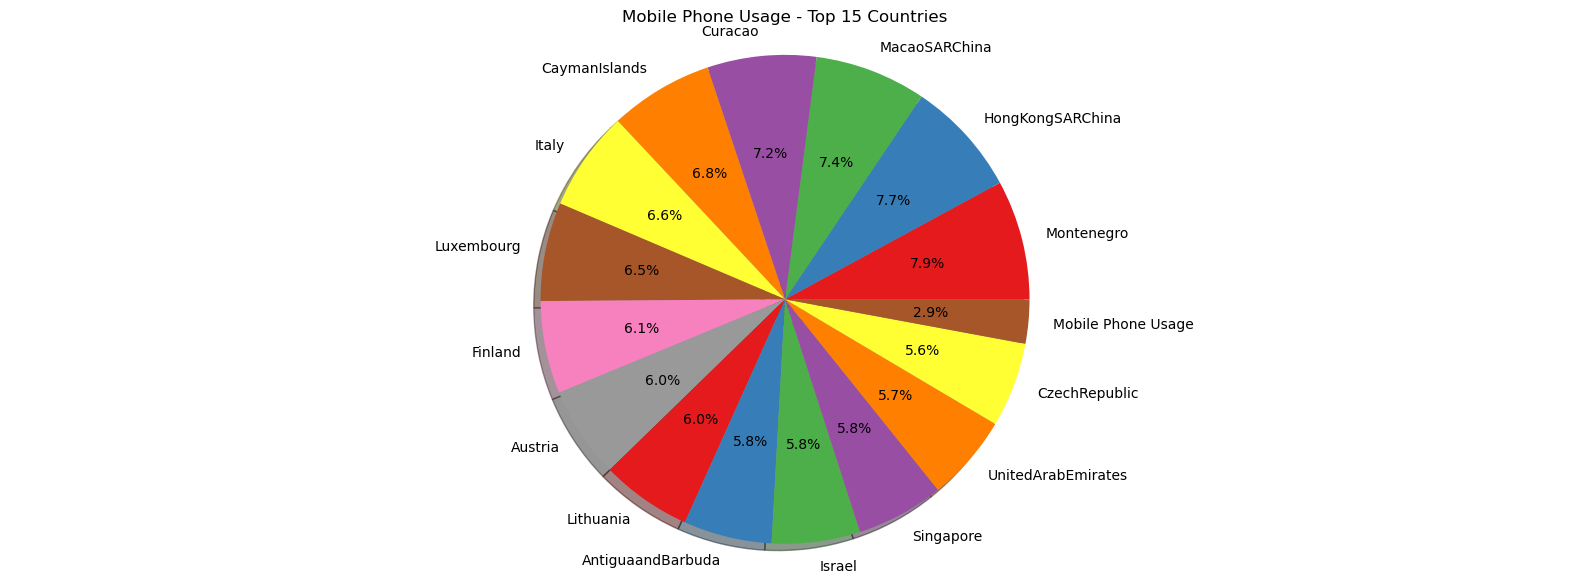

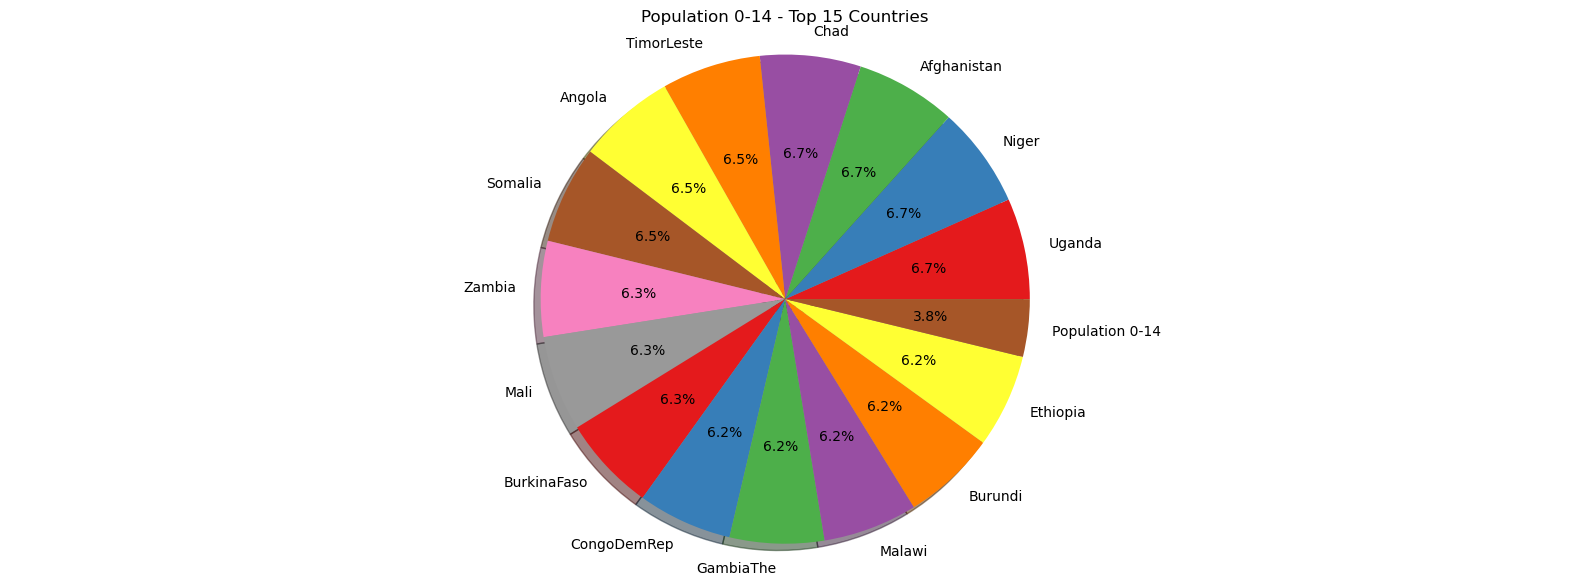

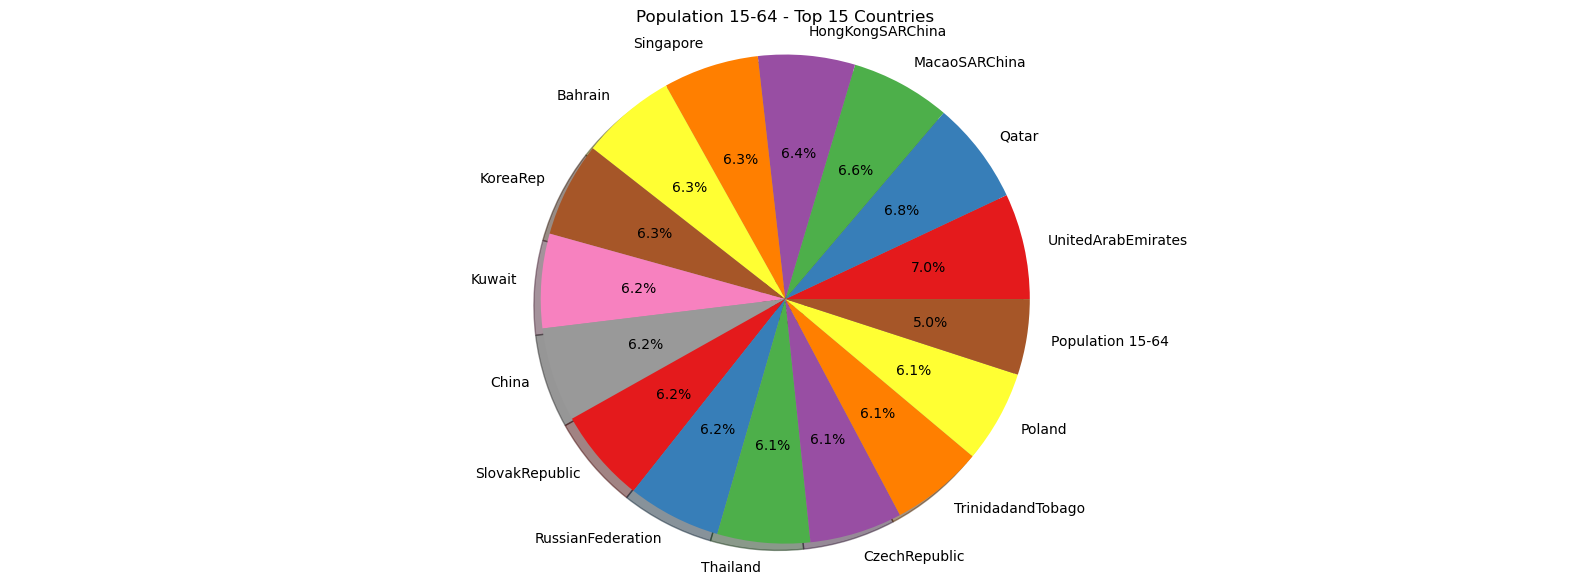

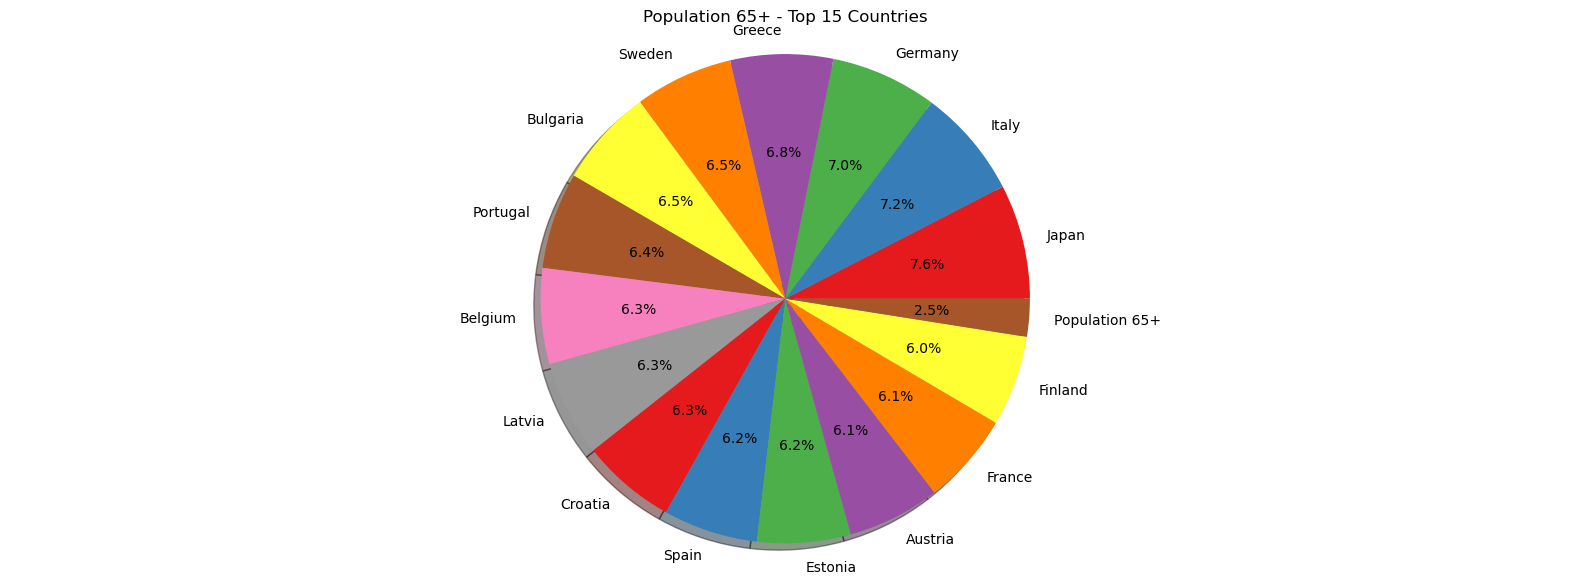

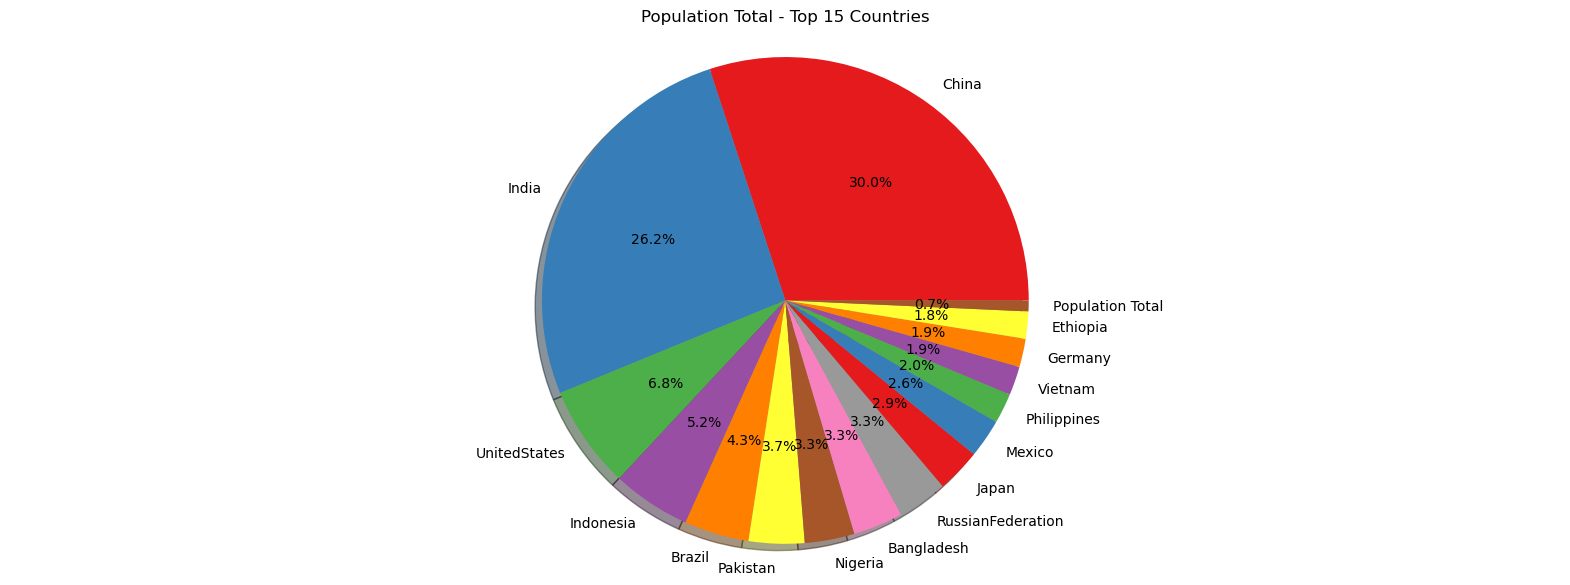

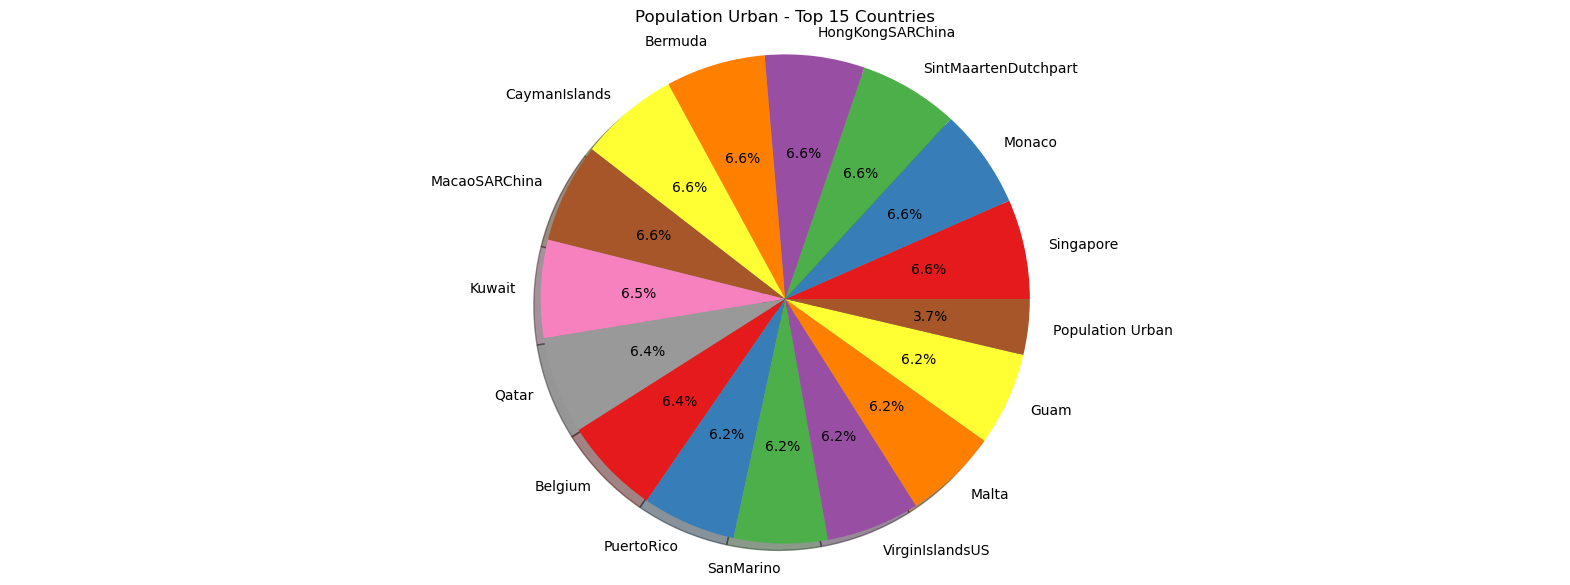

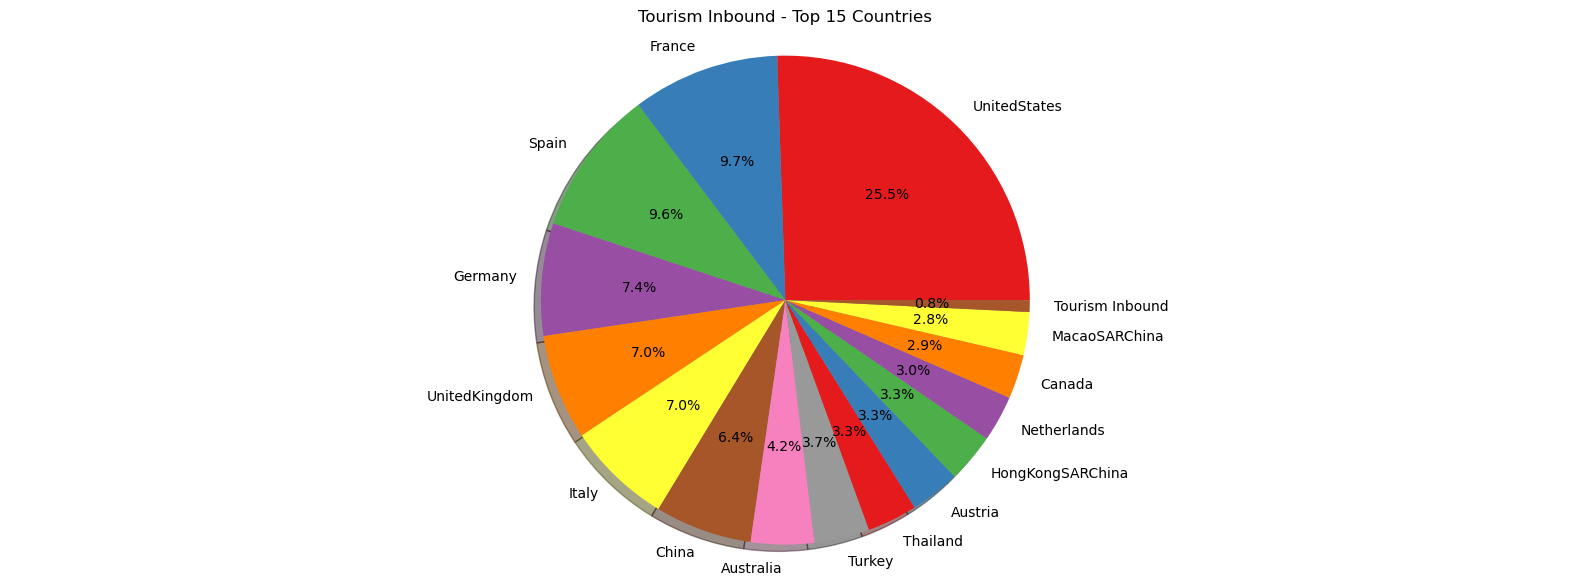

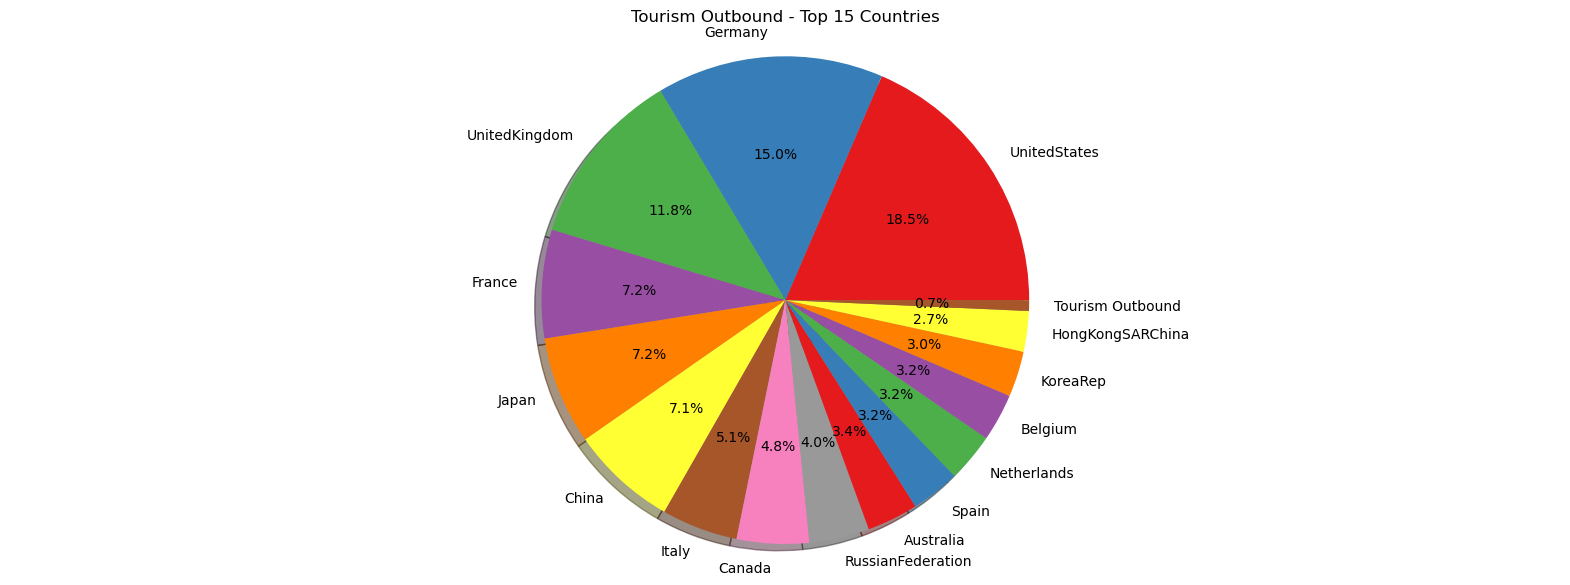

In [37]:
cols =[ 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Energy Usage', 'GDP', 'Health Exp % GDP',
       'Health Exp/Capita', 'Hours to do Tax', 'Infant Mortality Rate',
       'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
       'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'Population Total',
       'Population Urban', 'Tourism Inbound', 'Tourism Outbound']
for col in cols:
    top_values = df1.sort_values(col,ascending=False).head(15)
    mean = pd.DataFrame({'Country':[col], col:[df1[col].mean()]})
    combined = pd.concat([top_values,mean],ignore_index=True)
    fig, ax = plt.subplots(figsize=(20,7))
    plt.title(col + ' - Top 15 Countries')
    colors = sns.color_palette("Set1", combined.shape[0]).as_hex()
    ax.pie(combined[col], labels=combined['Country'],colors=colors,autopct='%1.1f%%',shadow=True)
    ax.axis('equal')
    plt.show()

**- Code Explaination for Pie Chart**

1) Plotting pie plots The cols list contains the names of the columns for which pie charts will be plotted.

2) The code then iterates over each column in the cols list.

3) For each column, it selects the top 15 values by sorting the dataframe df1 in descending order based on that column.

4) It creates a new dataframe mean that contains the average value of the selected column.

5) The top_values and mean dataframes are then concatenated together to create the combined dataframe.

6) A new figure and axis are created for each column to plot the pie chart.

7) The pie chart is plotted using the combined dataframe. Each slice of the pie represents a country, and the size of the slice corresponds to the value of the column being plotted.

8) The pie chart is displayed with a title and labels indicating the country names. The percentage values are also shown on each slice.

9) The plt.show() function is called to display the pie chart.

10)The process repeats for each column in the cols list.

11) The code generates pie charts for each specified column, showing the distribution of values among the top 15 countries, along with the average value for that column.

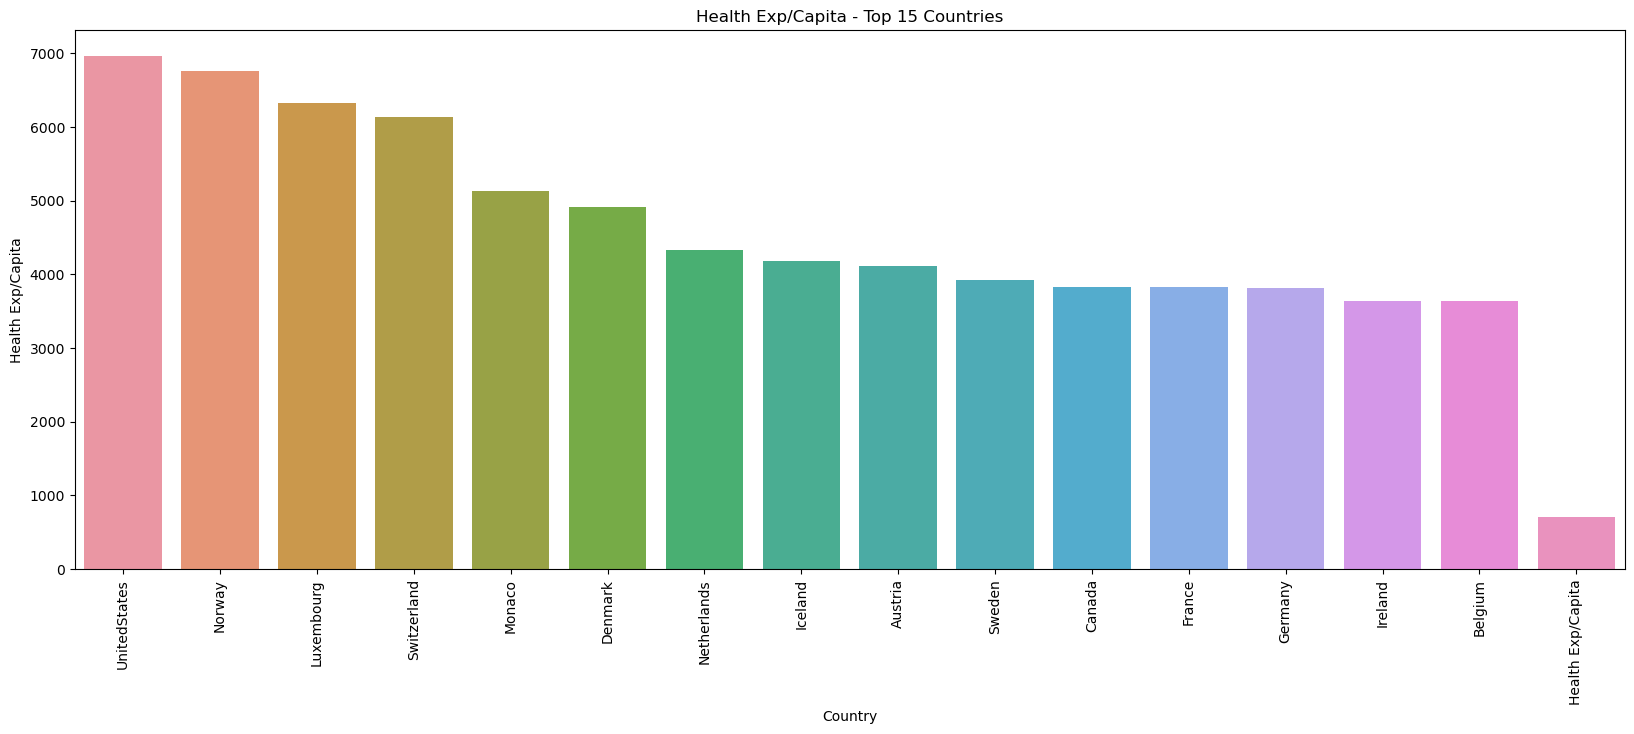

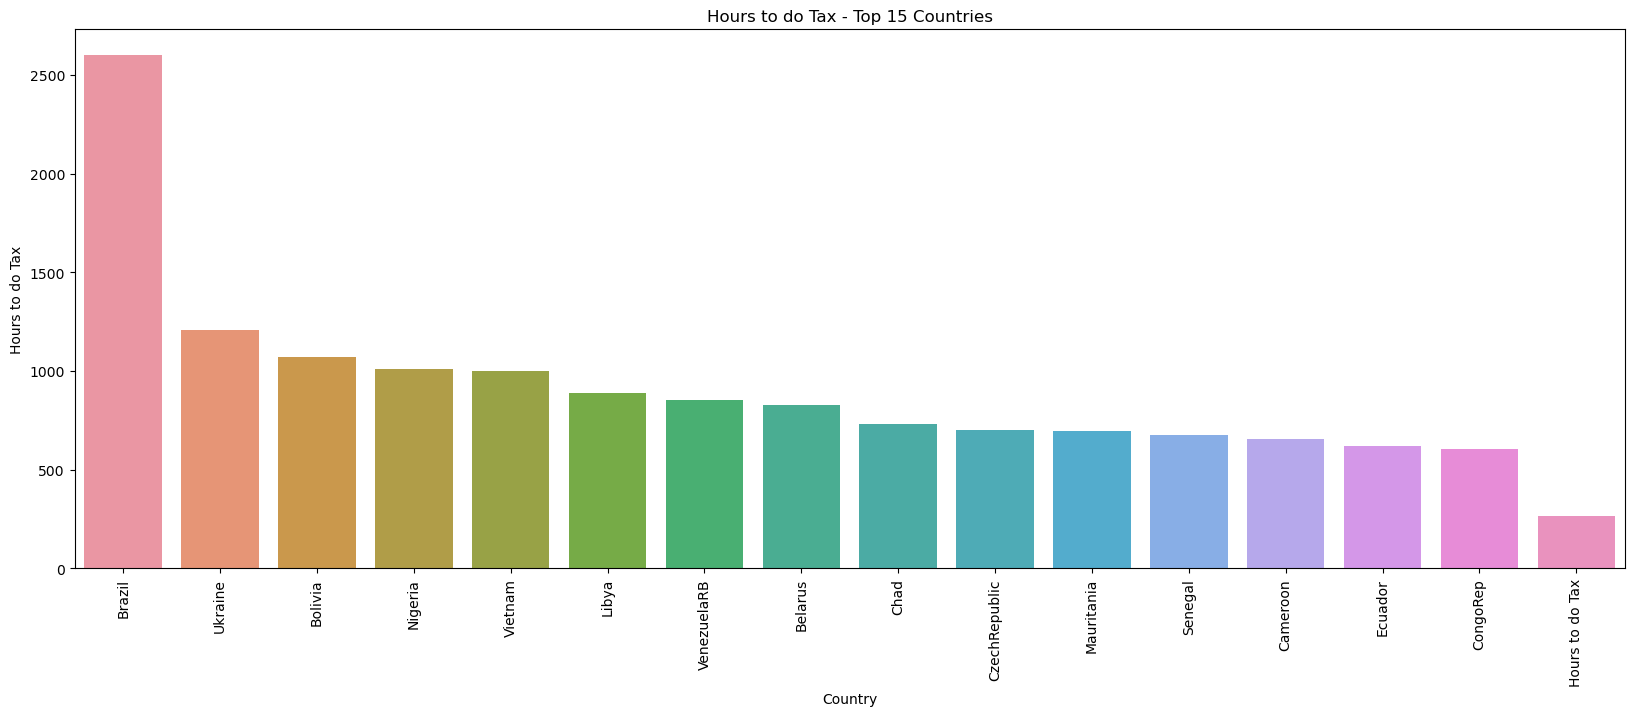

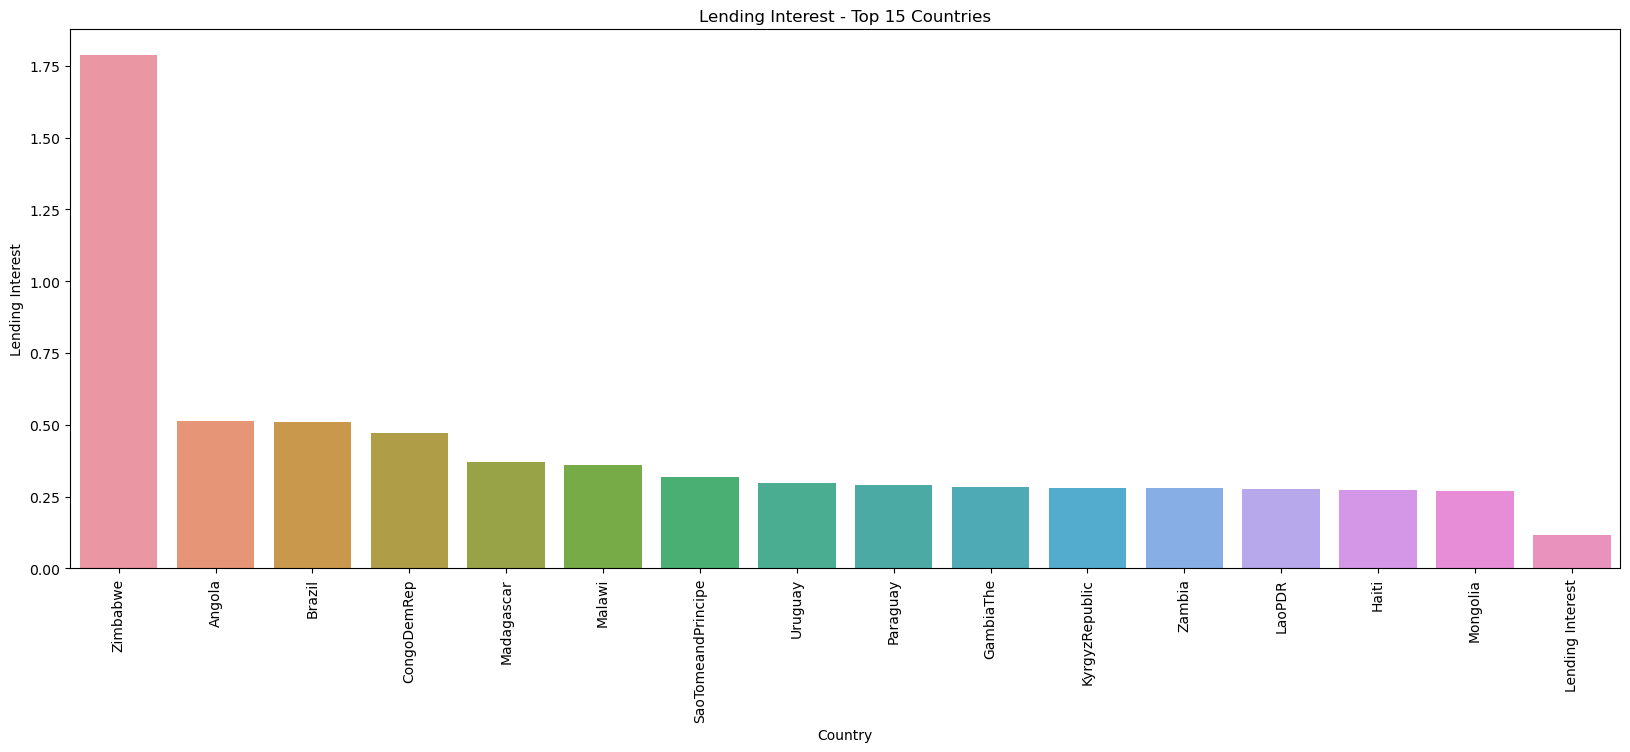

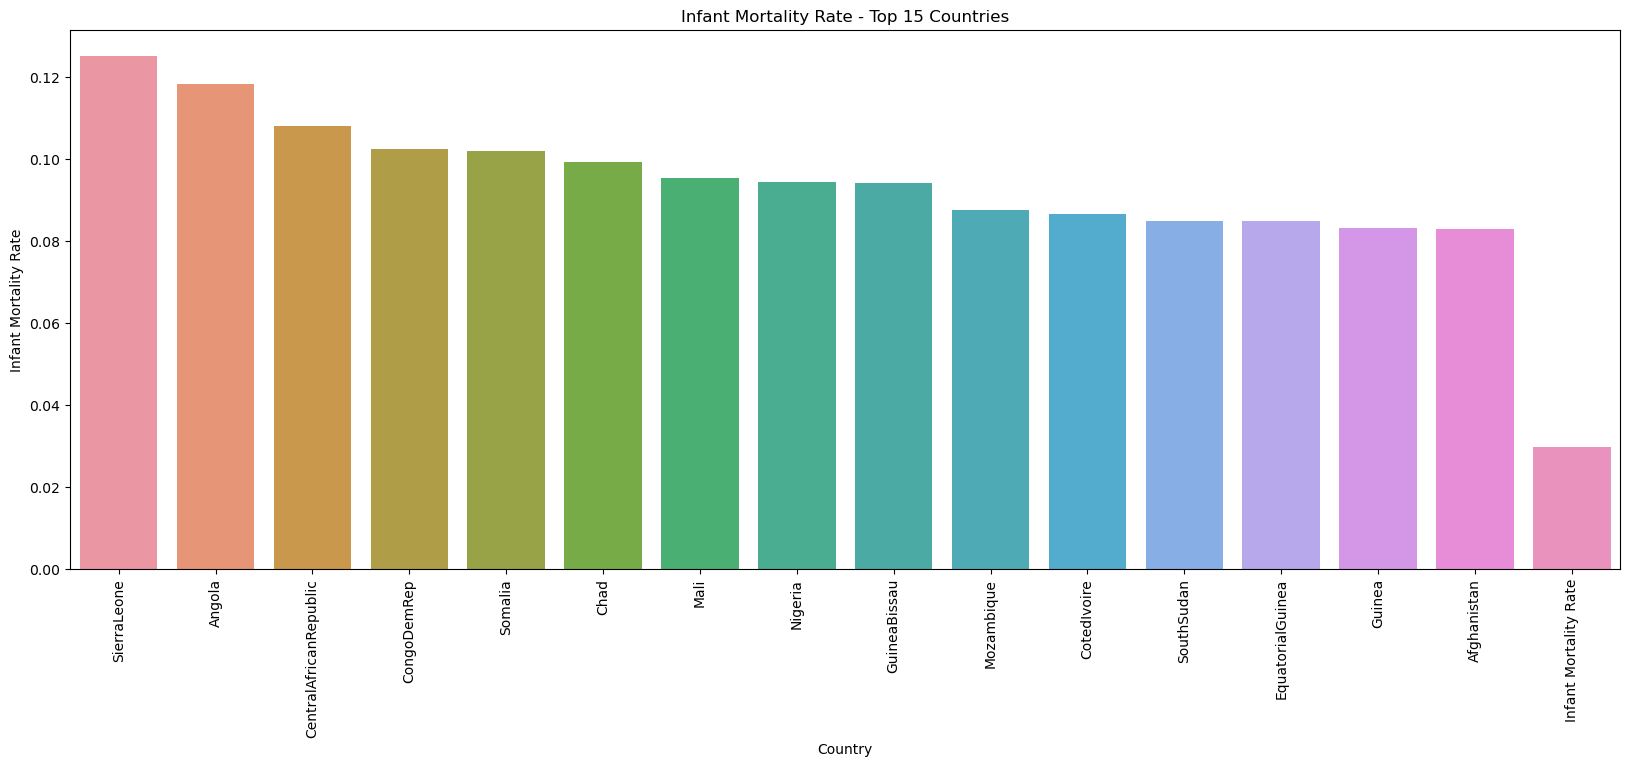

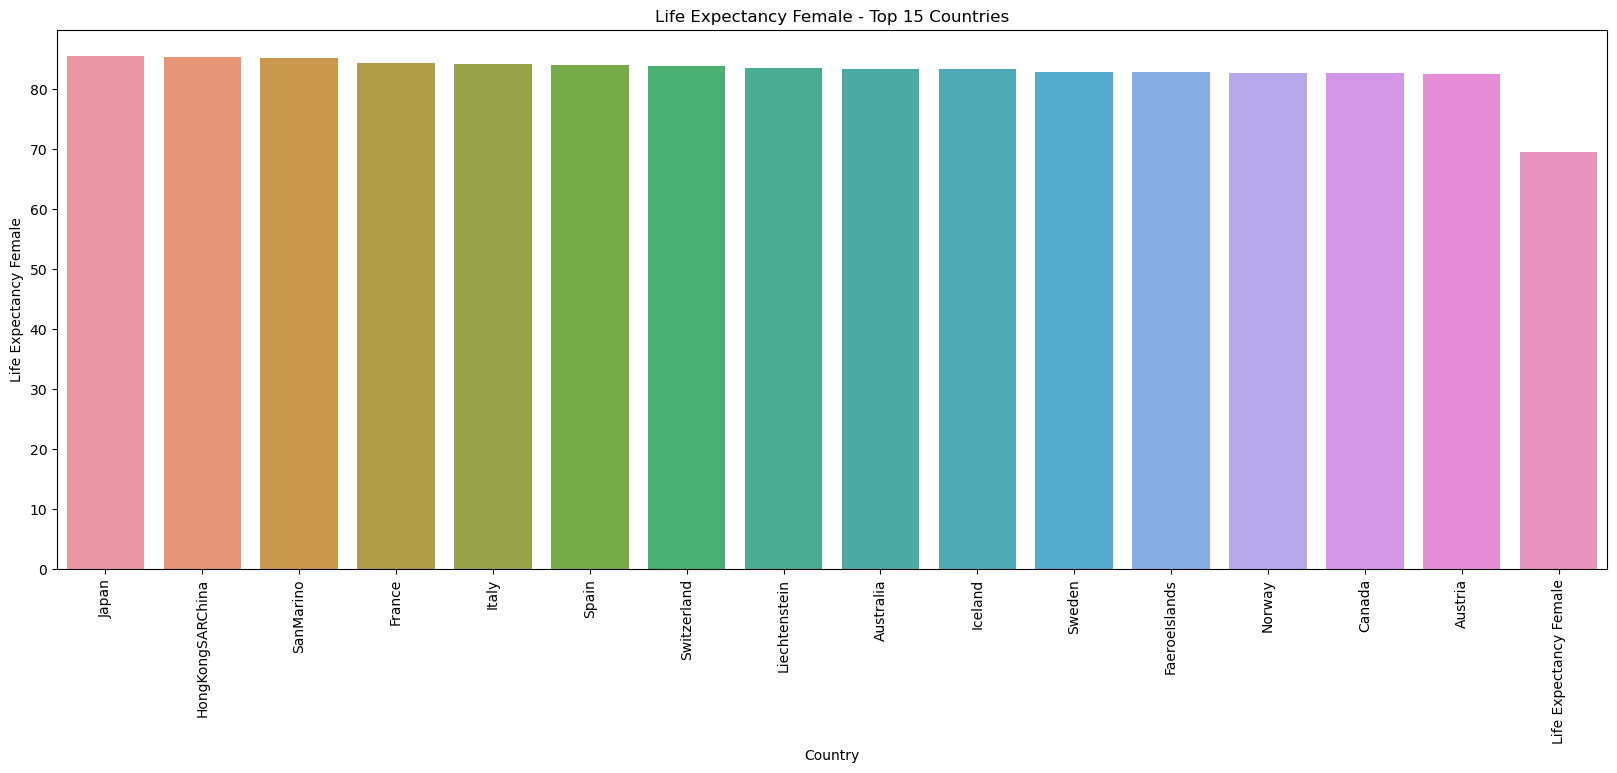

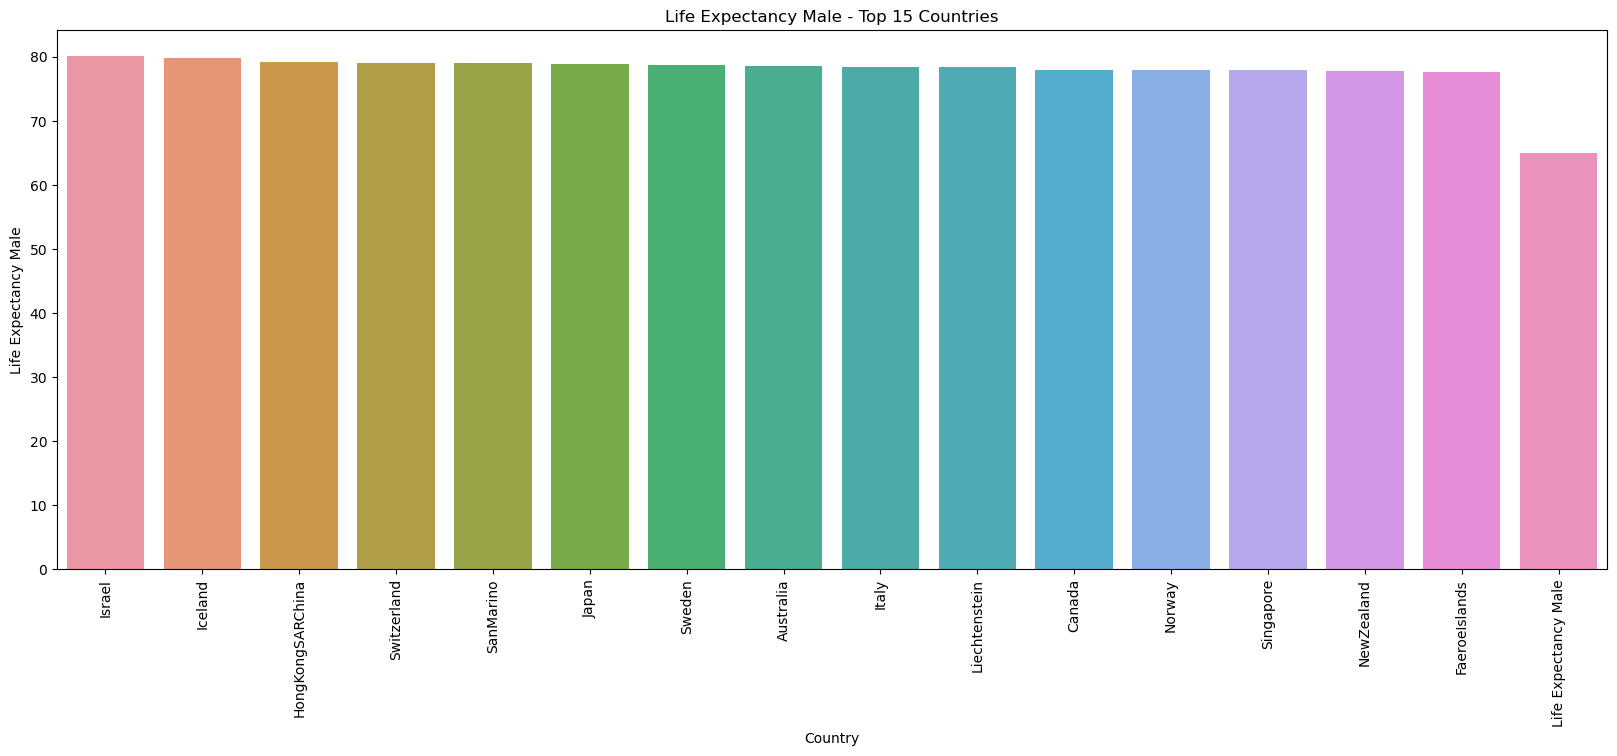

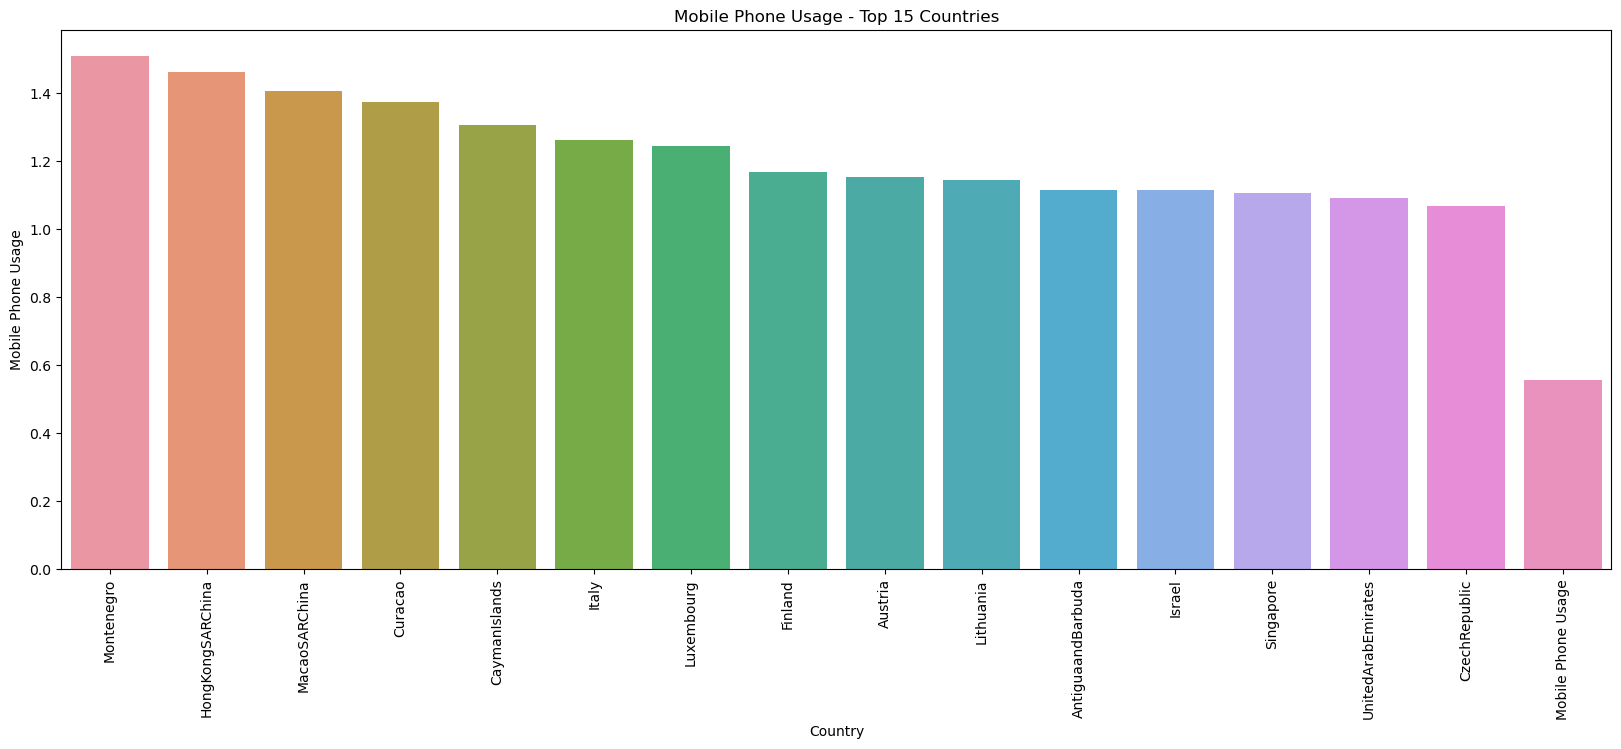

In [38]:
# Checking for top 15 countries
cols = ['Health Exp/Capita', 'Hours to do Tax','Lending Interest','Infant Mortality Rate', 
        'Life Expectancy Female', 'Life Expectancy Male','Mobile Phone Usage']
for col in cols:
    top_values = df1.sort_values(col,ascending=False).head(15)
    mean = pd.DataFrame({'Country':[col], col:[df1[col].mean()]})
    combined = pd.concat([top_values,mean],ignore_index=True)
    
    fig, ax = plt.subplots(figsize=(20,7))
    plt.title(col + ' - Top 15 Countries')
    sns.barplot(x='Country', y=col, data=combined)
    plt.xticks(rotation='vertical')
    plt.show()

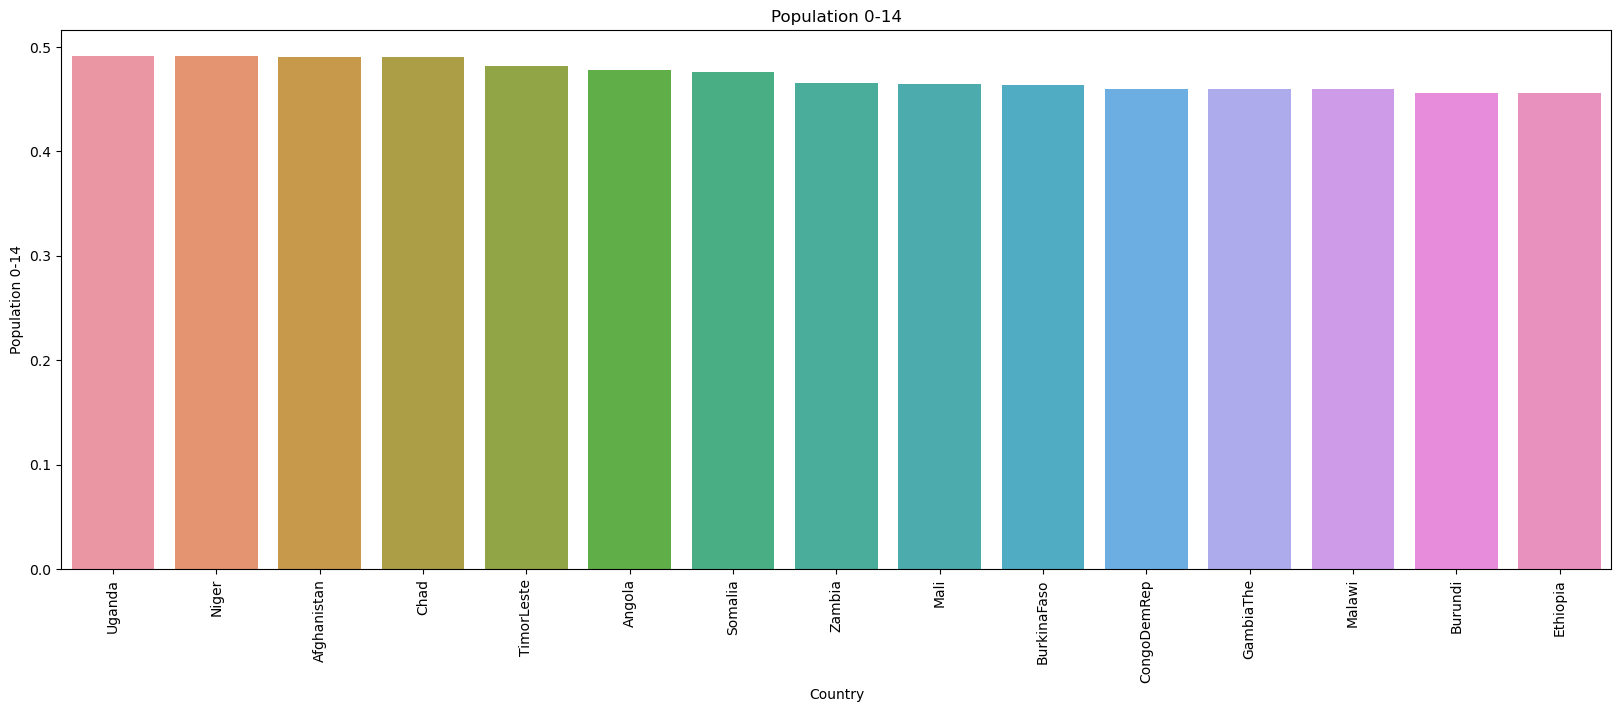

The position of Uganda in world GDP is: 111
The position of Niger in world GDP is: 145
The position of Afghanistan in world GDP is: 118
The position of Chad in world GDP is: 131
The position of TimorLeste in world GDP is: 184
The position of Angola in world GDP is: 64
The position of Somalia in world GDP is: 198
The position of Zambia in world GDP is: 115
The position of Mali in world GDP is: 135
The position of BurkinaFaso in world GDP is: 137


In [39]:
# Checking top 15 countries with Population 0-14 and there position as per GDP
fig, ax = plt.subplots(figsize=(20,7))
plt.title('Population 0-14')
sns.barplot(x='Country', y='Population 0-14', data=df1.sort_values('Population 0-14', ascending=False).head(15))
plt.xticks(rotation='vertical')
plt.show()

df1['Percentage of World GDP'] = df1['GDP'] / df1['GDP'].sum() * 100
df1.sort_values('Percentage of World GDP',ascending=False,inplace=True)
df1['Rank_GDP'] = range(1, len(df1) + 1)

top_pop = df1.sort_values('Population 0-14', ascending=False).head(10)

for country in top_pop['Country']:
  position = df1.loc[df1['Country'] == country]['Rank_GDP']
  print(f"The position of {country} in world GDP is: {position.values[0]}")

- **Code Explaination for Bar Chart**

1) fig, ax = plt.subplots(figsize=(20,7)) plt.title('Population 0-14') sns.barplot(x='Country', y='Population 0-14', data=df1.sort_values('Population 0-14', ascending=False).head(15)) plt.show()

2) This code generates a bar chart to visualize the top 15 countries with the highest population in the age group 0-14. The fig, ax = plt.subplots(figsize=(20,7)) line creates a figure and axes object for the plot with a specific size. plt.title('Population 0-14') sets the title of the plot. sns.barplot creates the bar plot,

3) where x='Country' represents the countries on the x-axis and y='Population 0-14' represents the population 0-14 on the y-axis. data=df1.sort_values('Population 0-14', ascending=False).head(15) specifies the data to be used for the plot, which is the top 15 countries sorted in descending order based on their population 0-14. Finally, plt.show() displays the plot.

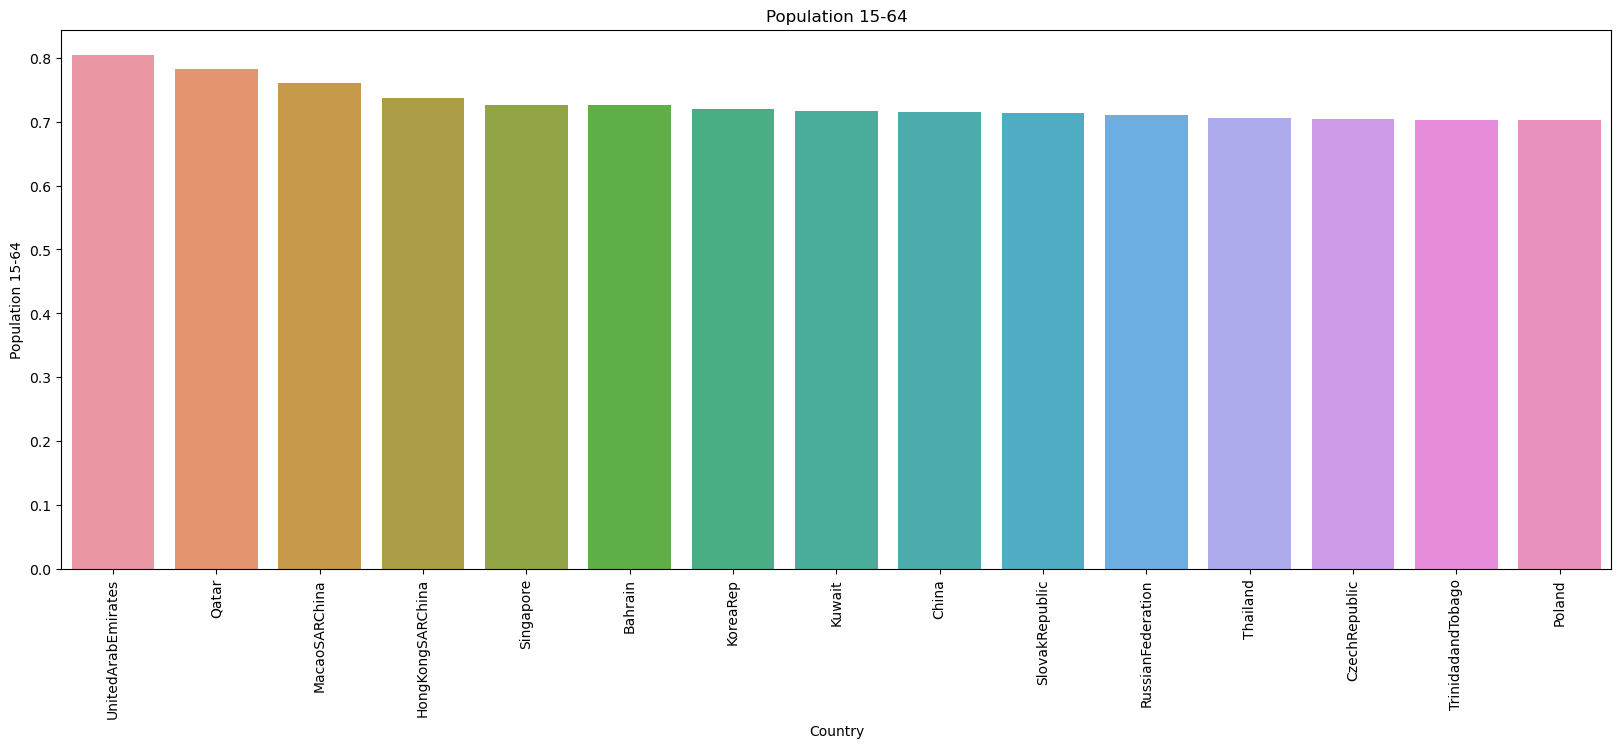

The position of UnitedArabEmirates in world GDP is: 32
The position of Qatar in world GDP is: 59
The position of MacaoSARChina in world GDP is: 97
The position of HongKongSARChina in world GDP is: 35
The position of Singapore in world GDP is: 42
The position of Bahrain in world GDP is: 92
The position of KoreaRep in world GDP is: 14
The position of Kuwait in world GDP is: 55
The position of China in world GDP is: 3
The position of SlovakRepublic in world GDP is: 62


In [40]:
# Checking top 15 countries with Population 15-64 and there position as per GDP
fig, ax = plt.subplots(figsize=(20,7))
plt.title('Population 15-64')
sns.barplot(x='Country', y='Population 15-64', data=df1.sort_values('Population 15-64', ascending=False).head(15))
plt.xticks(rotation='vertical')
plt.show()

df1['Percentage of World GDP'] = df1['GDP'] / df1['GDP'].sum() * 100
df1.sort_values('Percentage of World GDP',ascending=False,inplace=True)
df1['Rank_GDP'] = range(1, len(df1) + 1)

top_pop = df1.sort_values('Population 15-64', ascending=False).head(10)

for country in top_pop['Country']:
  position = df1.loc[df1['Country'] == country]['Rank_GDP']
  print(f"The position of {country} in world GDP is: {position.values[0]}")

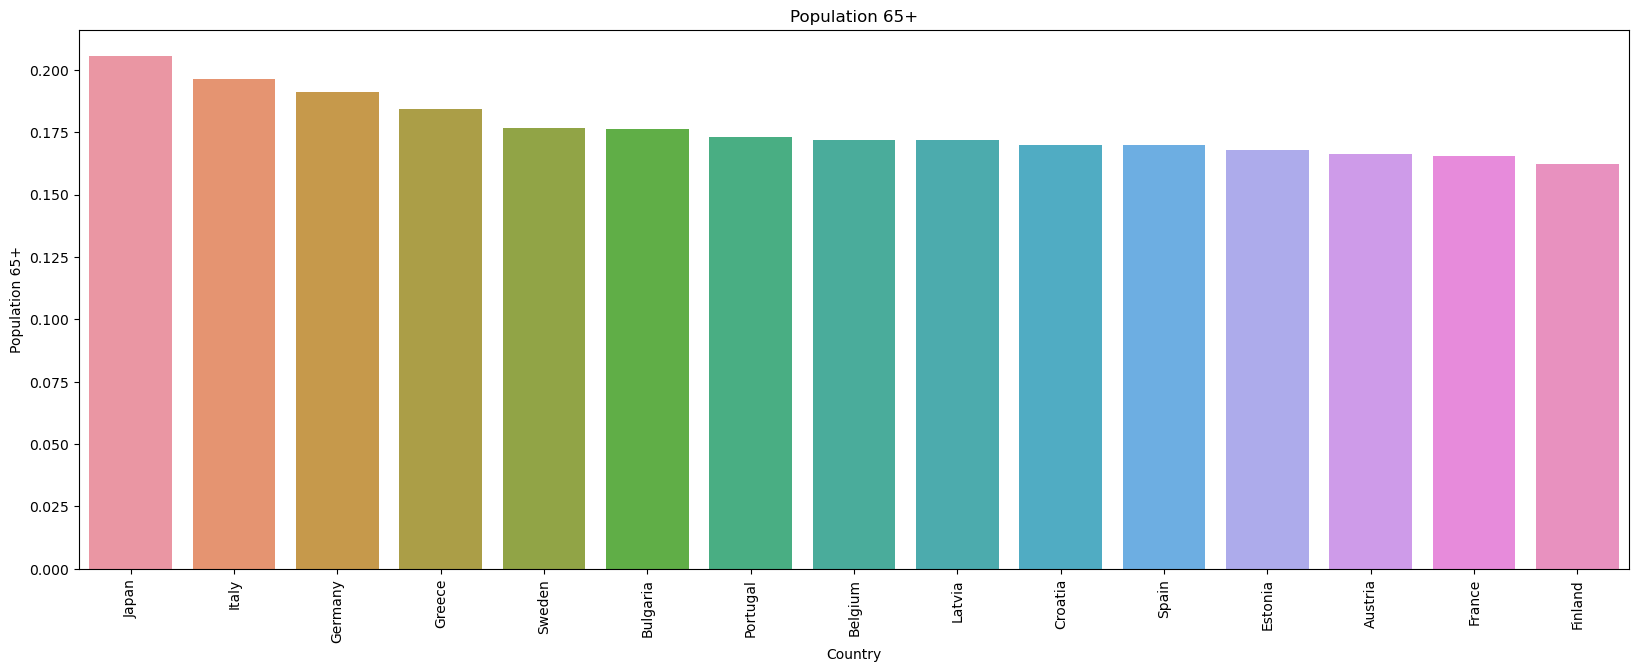

The position of Japan in world GDP is: 2
The position of Italy in world GDP is: 7
The position of Germany in world GDP is: 4
The position of Greece in world GDP is: 30
The position of Sweden in world GDP is: 21
The position of Bulgaria in world GDP is: 75
The position of Portugal in world GDP is: 36
The position of Belgium in world GDP is: 20
The position of Latvia in world GDP is: 90
The position of Croatia in world GDP is: 67


In [41]:
# Checking top 15 countries with Population 65+ and there position as per GDP
fig, ax = plt.subplots(figsize=(20,7))
plt.title('Population 65+')
sns.barplot(x='Country', y='Population 65+', data=df1.sort_values('Population 65+', ascending=False).head(15))
plt.xticks(rotation='vertical')
plt.show()

df1['Percentage of World GDP'] = df1['GDP'] / df1['GDP'].sum() * 100
df1.sort_values('Percentage of World GDP',ascending=False,inplace=True)
df1['Rank_GDP'] = range(1, len(df1) + 1)

top_pop = df1.sort_values('Population 65+', ascending=False).head(10)

for country in top_pop['Country']:
  position = df1.loc[df1['Country'] == country]['Rank_GDP']
  print(f"The position of {country} in world GDP is: {position.values[0]}")

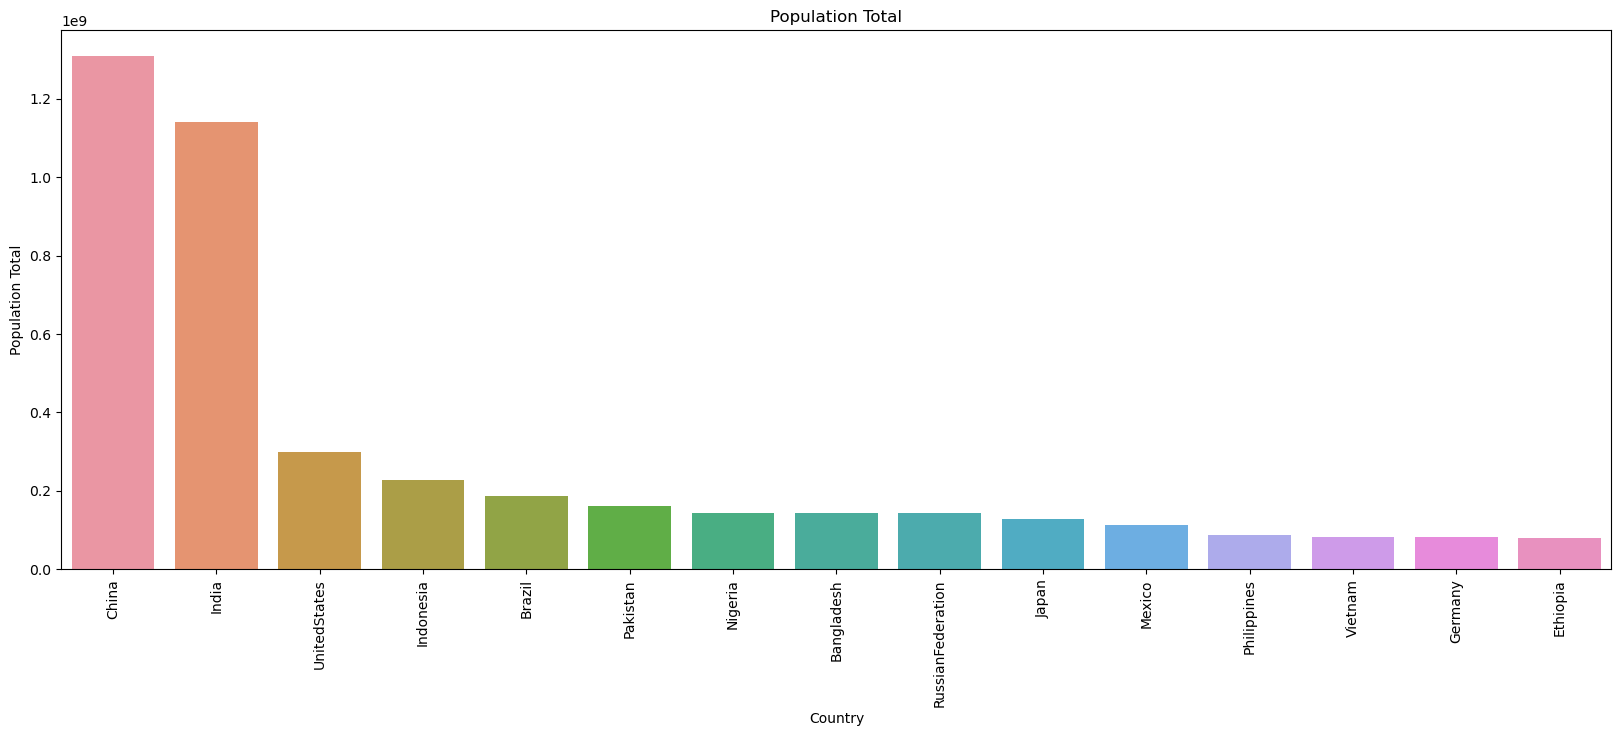

The position of China in world GDP is: 3
The position of India in world GDP is: 11
The position of UnitedStates in world GDP is: 1
The position of Indonesia in world GDP is: 19
The position of Brazil in world GDP is: 8
The position of Pakistan in world GDP is: 47
The position of Nigeria in world GDP is: 39
The position of Bangladesh in world GDP is: 60
The position of RussianFederation in world GDP is: 12
The position of Japan in world GDP is: 2


In [42]:
# Checking top 15 countries with Population Total and there position as per GDP
fig, ax = plt.subplots(figsize=(20,7))
plt.title('Population Total')
sns.barplot(x='Country', y='Population Total', data=df1.sort_values('Population Total', ascending=False).head(15))
plt.xticks(rotation='vertical')
plt.show()

df1['Percentage of World GDP'] = df1['GDP'] / df1['GDP'].sum() * 100
df1.sort_values('Percentage of World GDP',ascending=False,inplace=True)
df1['Rank_GDP'] = range(1, len(df1) + 1)

top_pop = df1.sort_values('Population Total', ascending=False).head(10)

for country in top_pop['Country']:
  position = df1.loc[df1['Country'] == country]['Rank_GDP']
  print(f"The position of {country} in world GDP is: {position.values[0]}")

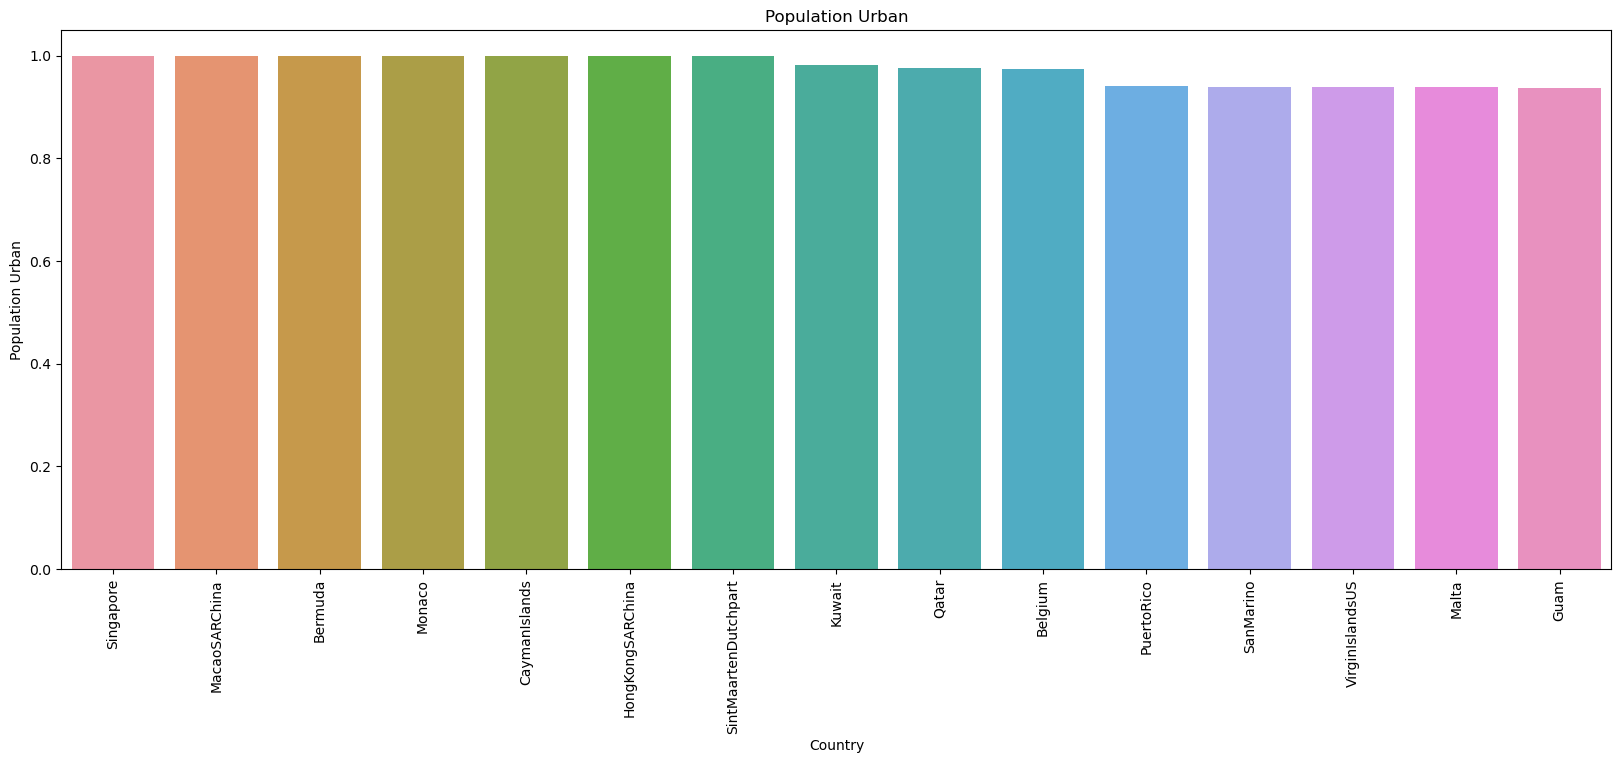

The position of Singapore in world GDP is: 42
The position of MacaoSARChina in world GDP is: 97
The position of Bermuda in world GDP is: 139
The position of Monaco in world GDP is: 141
The position of CaymanIslands in world GDP is: 199
The position of HongKongSARChina in world GDP is: 35
The position of SintMaartenDutchpart in world GDP is: 204
The position of Kuwait in world GDP is: 55
The position of Qatar in world GDP is: 59
The position of Belgium in world GDP is: 20


In [43]:
# Checking top 15 countries with Urban Population and there position as per GDP
fig, ax = plt.subplots(figsize=(20,7))
plt.title('Population Urban')
sns.barplot(x='Country', y='Population Urban', data=df1.sort_values('Population Urban', ascending=False).head(15))
plt.xticks(rotation='vertical')
plt.show()

df1['Percentage of World GDP'] = df1['GDP'] / df1['GDP'].sum() * 100
df1.sort_values('Percentage of World GDP',ascending=False,inplace=True)
df1['Rank_GDP'] = range(1, len(df1) + 1)

top_pop = df1.sort_values('Population Urban', ascending=False).head(10)

for country in top_pop['Country']:
  position = df1.loc[df1['Country'] == country]['Rank_GDP']
  print(f"The position of {country} in world GDP is: {position.values[0]}")

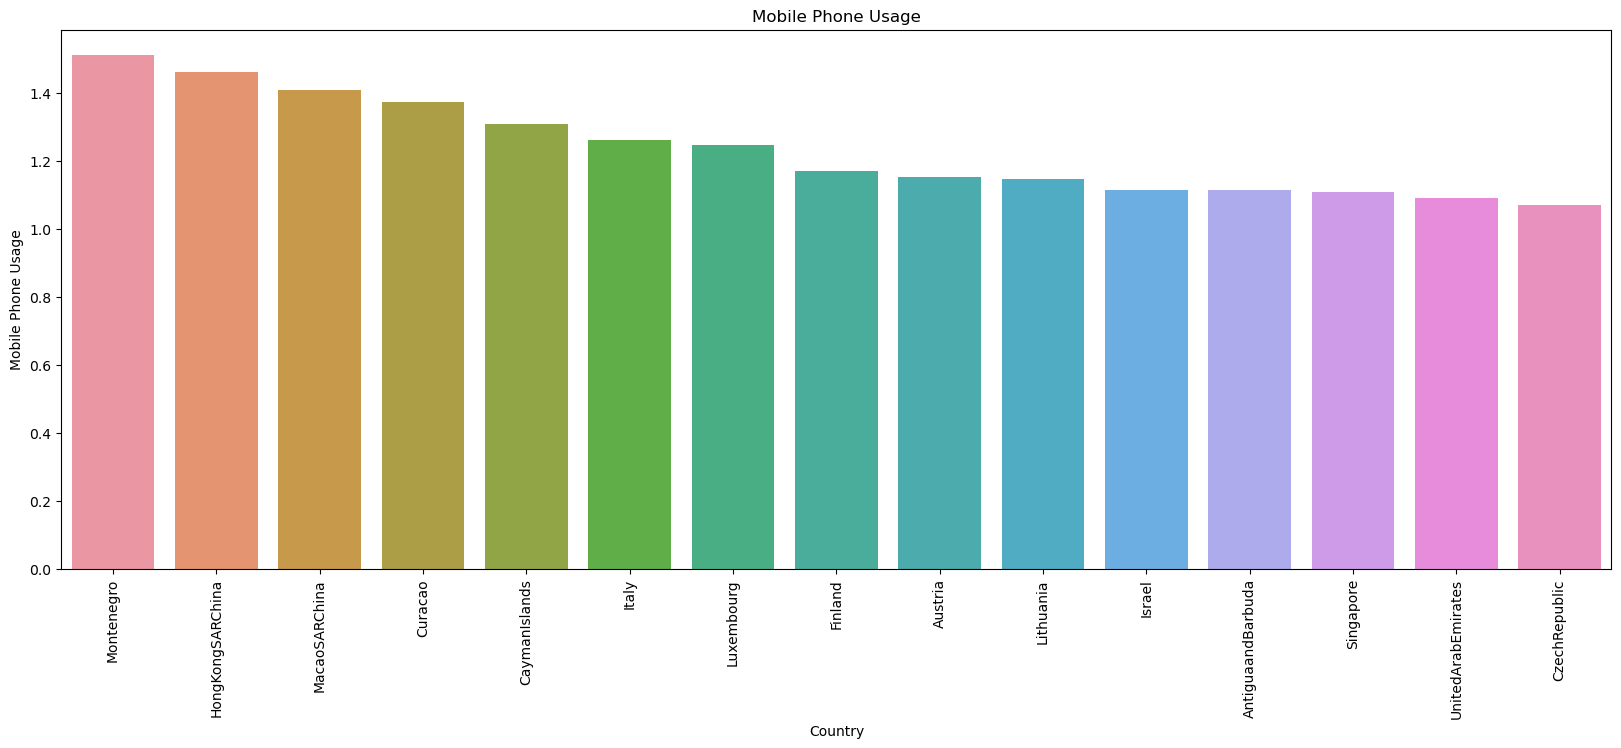

The position of Montenegro in world GDP is: 156
The position of HongKongSARChina in world GDP is: 35
The position of MacaoSARChina in world GDP is: 97
The position of Curacao in world GDP is: 202
The position of CaymanIslands in world GDP is: 199
The position of Italy in world GDP is: 7
The position of Luxembourg in world GDP is: 69
The position of Finland in world GDP is: 34
The position of Austria in world GDP is: 26
The position of Lithuania in world GDP is: 78


In [44]:
# Checking top 15 countries with MObile Phone Usages  and there position as per GDP
fig, ax = plt.subplots(figsize=(20,7))
plt.title('Mobile Phone Usage')
sns.barplot(x='Country', y='Mobile Phone Usage', data=df1.sort_values('Mobile Phone Usage', ascending=False).head(15))
plt.xticks(rotation='vertical')
plt.show()

df1['Percentage of World GDP'] = df1['GDP'] / df1['GDP'].sum() * 100
df1.sort_values('Percentage of World GDP',ascending=False,inplace=True)
df1['Rank_GDP'] = range(1, len(df1) + 1)

top_pop = df1.sort_values('Mobile Phone Usage', ascending=False).head(10)

for country in top_pop['Country']:
  position = df1.loc[df1['Country'] == country]['Rank_GDP']
  print(f"The position of {country} in world GDP is: {position.values[0]}")

- **End of EDA Performance**


In [45]:
sort_df = data.copy()

In [46]:
sort_df

Birth Rate Business Tax Rate  CO2 Emissions                   Country  \
0          0.020               NaN        87931.0                   Algeria   
1          0.050               NaN         9542.0                    Angola   
2          0.043               NaN         1617.0                     Benin   
3          0.027               NaN         4276.0                  Botswana   
4          0.046               NaN         1041.0              Burkina Faso   
...          ...               ...            ...                       ...   
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage  \
0                        NaN               NaN       26998.0   
1                        NaN               NaN        7499.0   
2                        NaN               NaN        1983.0   
3                        NaN               NaN        1836.0   
4                        NaN               NaN           NaN   
...                      ...               ...           ...   
2699                     NaN               NaN           NaN   
2700                     5.0               4.0     2132446.0   
2701                     7.0              85.0           NaN   
2702                   144.0             180.0           NaN   
2703                     NaN               NaN           NaN   

                      GDP  Health Exp % GDP Health Exp/Capita  ...  \
0         $54,790,058,957             0.035               $60  ...   
1          $9,129,594,819             0.034               $22  ...   
2          $2,359,122,303             0.043               $15  ...   
3          $5,788,311,645             0.047              $152  ...   
4          $2,610,959,139             0.051               $12  ...   
...                   ...               ...               ...  ...   
2699                  NaN               NaN               NaN  ...   
2700  $16,244,600,000,000             0.179            $8,895  ...   
2701      $50,004,354,667             0.089            $1,308  ...   
2702     $381,286,223,859             0.046              $593  ...   
2703                  NaN               NaN               NaN  ...   

      Life Expectancy Male  Mobile Phone Usage  Number of Records  \
0                     67.0                 0.0                  1   
1                     44.0                 0.0                  1   
2                     53.0                 0.0                  1   
3                     49.0                 0.1                  1   
4                     49.0                 0.0                  1   
...                    ...                 ...                ...   
2699                   NaN                 NaN                  1   
2700                  76.0                 1.0                  1   
2701                  74.0                 1.5                  1   
2702                  72.0                 1.0                  1   
2703                  76.0                 NaN                  1   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               ...             ...               ...   
2699              NaN               NaN             NaN             32427   
27

In [47]:
sort_df.drop(['Country'],axis=1)

Birth Rate Business Tax Rate  CO2 Emissions  Days to Start Business  \
0          0.020               NaN        87931.0                     NaN   
1          0.050               NaN         9542.0                     NaN   
2          0.043               NaN         1617.0                     NaN   
3          0.027               NaN         4276.0                     NaN   
4          0.046               NaN         1041.0                     NaN   
...          ...               ...            ...                     ...   
2699         NaN               NaN            NaN                     NaN   
2700       0.013             46.4%            NaN                     5.0   
2701       0.015             41.9%            NaN                     7.0   
2702       0.020             61.9%            NaN                   144.0   
2703       0.011               NaN            NaN                     NaN   

      Ease of Business  Energy Usage                  GDP  Health Exp % GDP  \
0                  NaN       26998.0      $54,790,058,957             0.035   
1                  NaN        7499.0       $9,129,594,819             0.034   
2                  NaN        1983.0       $2,359,122,303             0.043   
3                  NaN        1836.0       $5,788,311,645             0.047   
4                  NaN           NaN       $2,610,959,139             0.051   
...                ...           ...                  ...               ...   
2699               NaN           NaN                  NaN               NaN   
2700               4.0     2132446.0  $16,244,600,000,000             0.179   
2701              85.0           NaN      $50,004,354,667             0.089   
2702             180.0           NaN     $381,286,223,859             0.046   
2703               NaN           NaN                  NaN               NaN   

     Health Exp/Capita  Hours to do Tax  ...  Life Expectancy Male  \
0                  $60              NaN  ...                  67.0   
1                  $22              NaN  ...                  44.0   
2                  $15              NaN  ...                  53.0   
3                 $152              NaN  ...                  49.0   
4                  $12              NaN  ...                  49.0   
...                ...              ...  ...                   ...   
2699               NaN              NaN  ...                   NaN   
2700            $8,895            175.0  ...                  76.0   
2701            $1,308            310.0  ...                  74.0   
2702              $593            792.0  ...                  72.0   
2703               NaN              NaN  ...                  76.0   

      Mobile Phone Usage  Number of Records  Population 0-14  \
0                    0.0                  1            0.342   
1                    0.0                  1            0.476   
2                    0.0                  1            0.454   
3                    0.1                  1            0.383   
4                    0.0                  1            0.468   
...                  ...                ...              ...   
2699                 NaN                  1              NaN   
2700                 1.0                  1            0.196   
2701                 1.5                  1            0.220   
2702                 1.0                  1            0.288   
2703                 NaN                  1            0.206   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0                0.619           0.039          31719449             0.599   
1                0.499           0.025          13924930             0.324   
2                0.517           0.029           6949366             0.383   
3                0.587           0.029           1755375             0.532   
4                0.505           0.028          11607944             0.178   
...                ...             ...               .

In [48]:
df_merged

Birth Rate  Business Tax Rate  CO2 Emissions  \
Country                                                         
Afghanistan        0.043154            363.000    2375.727273   
Albania            0.014692            425.500    3902.090909   
Algeria            0.022077            737.125  102837.636364   
AmericanSamoa      0.020500              0.000       0.000000   
Andorra            0.010583              0.000     537.636364   
...                     ...                ...            ...   
Vietnam            0.016769            383.375   98764.272727   
VirginIslandsUS    0.013000              0.000       0.000000   
YemenRep           0.034923            624.750   19319.090909   
Zambia             0.043923            149.500    2046.363636   
Zimbabwe           0.032000            413.125   10598.090909   

                 Days to Start Business  Energy Usage           GDP  \
Country                                                               
Afghanistan                    8.111111      0.000000  9.718945e+09   
Albania                       23.000000   2024.583333  8.895522e+09   
Algeria                       25.000000  34042.166667  1.190391e+11   
AmericanSamoa                  0.000000      0.000000  0.000000e+00   
Andorra                        0.000000      0.000000  2.268380e+09   
...                                 ...           ...           ...   
Vietnam                       43.200000  43263.750000  7.791354e+10   
VirginIslandsUS                0.000000      0.000000  0.000000e+00   
YemenRep                      41.300000   6517.833333  2.065261e+10   
Zambia                        26.200000   7262.250000  1.025046e+10   
Zimbabwe                      94.900000   9382.500000  7.176303e+09   

                 Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
Country                                                                 
Afghanistan              0.091909          30.636364            275.0   
Albania                  0.061462         168.846154            364.5   
Algeria                  0.038462         133.846154            451.0   
AmericanSamoa            0.000000           0.000000              0.0   
Andorra                  0.063231        2394.461538              0.0   
...                           ...                ...              ...   
Vietnam                  0.060769          51.692308           1000.5   
VirginIslandsUS          0.000000           0.000000              0.0   
YemenRep                 0.048308          49.000000            248.0   
Zambia                   0.063846          52.461538            183.0   
Zimbabwe                 0.000000           0.000000            242.5   

                 Infant Mortality Rate  ...  Life Expectancy Female  \
Country                                 ...                           
Afghanistan                   0.082769  ...               58.769231   
Albania                       0.017769  ...               79.230769   
Algeria                       0.027769  ...               71.615385   
AmericanSamoa                 0.000000  ...                0.000000   
Andorra                       0.003000  ...                0.000000   
...                                ...  ...                     ...   
Vietnam                       0.023154  ...               79.538462   
VirginIslandsUS               0.000000  ...               81.769231   
YemenRep                      0.054769  ...               63.076923   
Zambia                        0.075692  ...               49.692308   
Zimbabwe                      0.058231  ...               47.461538   

                 Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
Country                                                                      
Afghanistan                 56.384615            0.254545         0.490308   
Albania                     73.000000            0.561538         0.258385   
Algeria                     68.384615            0.492308    

In [49]:
# Finding the IQR
percentile25 = df1.quantile(0.25)
percentile75 = df1.quantile(0.75)

In [50]:
# Checking Values for 75 Percentile
percentile75

Birth Rate                 2.903846e-02
Business Tax Rate          4.925625e+02
CO2 Emissions              5.379448e+04
Days to Start Business     4.115000e+01
Energy Usage               2.553769e+04
GDP                        1.036772e+11
Health Exp % GDP           7.625000e-02
Health Exp/Capita          5.610577e+02
Hours to do Tax            3.359062e+02
Infant Mortality Rate      4.963462e-02
Internet Usage             3.730769e-01
Lending Interest           1.593462e-01
Life Expectancy Female     7.909615e+01
Life Expectancy Male       7.326923e+01
Mobile Phone Usage         8.269231e-01
Population 0-14            3.914423e-01
Population 15-64           6.728269e-01
Population 65+             1.086346e-01
Population Total           2.002100e+07
Population Urban           7.627308e-01
Tourism Inbound            3.070154e+09
Tourism Outbound           1.710538e+09
Percentage of World GDP    2.045370e-01
Rank_GDP                   1.562500e+02
Name: 0.75, dtype: float64

In [51]:
# Checking Values for 25 Percentile
percentile25

Birth Rate                 1.267308e-02
Business Tax Rate          2.724688e+02
CO2 Emissions              8.041136e+02
Days to Start Business     1.387500e+01
Energy Usage               6.612500e+01
GDP                        2.822984e+09
Health Exp % GDP           3.921154e-02
Health Exp/Capita          3.192308e+01
Hours to do Tax            1.280000e+02
Infant Mortality Rate      5.538462e-03
Internet Usage             3.333333e-02
Lending Interest           4.837500e-02
Life Expectancy Female     6.290385e+01
Life Expectancy Male       6.003846e+01
Mobile Phone Usage         2.543706e-01
Population 0-14            1.852308e-01
Population 15-64           5.473077e-01
Population 65+             3.125000e-02
Population Total           9.911953e+05
Population Urban           3.555000e-01
Tourism Inbound            9.150000e+07
Tourism Outbound           5.231591e+07
Percentage of World GDP    5.569257e-03
Rank_GDP                   5.275000e+01
Name: 0.25, dtype: float64

In [52]:
# Calculating the IQR
iqr = percentile75 - percentile25

In [53]:
# Calculating the Upper and lower limit for each columns
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [54]:
# Printing Upper and Lower Limits
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit Birth Rate                 5.358654e-02
Business Tax Rate          8.227031e+02
CO2 Emissions              1.332800e+05
Days to Start Business     8.206250e+01
Energy Usage               6.374503e+04
GDP                        2.549585e+11
Health Exp % GDP           1.318077e-01
Health Exp/Capita          1.354760e+03
Hours to do Tax            6.477656e+02
Infant Mortality Rate      1.157788e-01
Internet Usage             8.826923e-01
Lending Interest           3.258029e-01
Life Expectancy Female     1.033846e+02
Life Expectancy Male       9.311538e+01
Mobile Phone Usage         1.685752e+00
Population 0-14            7.007596e-01
Population 15-64           8.611058e-01
Population 65+             2.247115e-01
Population Total           4.856570e+07
Population Urban           1.373577e+00
Tourism Inbound            7.538135e+09
Tourism Outbound           4.197872e+09
Percentage of World GDP    5.029887e-01
Rank_GDP                   3.115000e+02
dtype: float64
Lower limit B

In [55]:
# Finding the number of outliers
df1[(df1 < lower_limit) | (df1 > upper_limit)].count()

Country                     0
Birth Rate                  0
Business Tax Rate          13
CO2 Emissions              30
Days to Start Business     18
Energy Usage               27
GDP                        28
Health Exp % GDP            3
Health Exp/Capita          31
Hours to do Tax            13
Infant Mortality Rate       2
Internet Usage              0
Lending Interest            6
Life Expectancy Female      5
Life Expectancy Male        5
Mobile Phone Usage          0
Population 0-14             0
Population 15-64           16
Population 65+              0
Population Total           24
Population Urban            0
Tourism Inbound            30
Tourism Outbound           36
Percentage of World GDP    28
Rank_GDP                    0
dtype: int64

<AxesSubplot:>

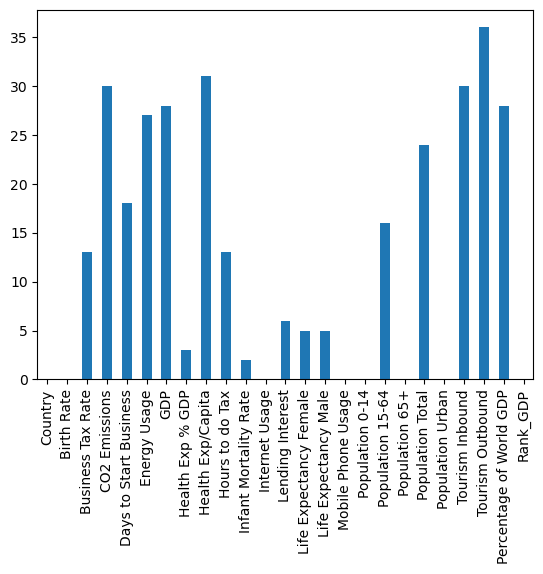

In [56]:
df1[(df1 < lower_limit) | (df1 > upper_limit)].count().plot(kind='bar')

In [57]:
df_merged.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Energy Usage', 'GDP', 'Health Exp % GDP',
       'Health Exp/Capita', 'Hours to do Tax', 'Infant Mortality Rate',
       'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
       'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'Population Total',
       'Population Urban', 'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [58]:
cols = ['Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Population 15-64','Population Total',
       'Tourism Inbound', 'Tourism Outbound']

In [59]:
def Iqr(df_merged, cols):
    for col in cols:
      iqr = percentile75 - percentile25
      Highest_allowed = percentile75 + 1.5 * iqr
      Lowest_allowed = percentile25 + 1.5 * iqr
      df_merged[col] = np.where(df_merged[col] > Highest_allowed[col], Highest_allowed[col], np.where(df_merged[col] < Lowest_allowed[col], Lowest_allowed[col], df_merged[col]))

In [60]:
Iqr(df_merged, cols)

In [62]:
df_merged.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Energy Usage', 'GDP', 'Health Exp % GDP',
       'Health Exp/Capita', 'Hours to do Tax', 'Infant Mortality Rate',
       'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
       'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'Population Total',
       'Population Urban', 'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [63]:
df_merged.rename(columns={'Birth Rate':'Birth_Rate'},inplace=True)

In [64]:
df_merged.rename(columns={'Business Tax Rate':'Business_Tax_Rate','CO2 Emissions':'CO2_Emissions','Ease of Business':'Ease_of_Business','Energy Usage':'Energy_Usage','Days to Start Business':'Days_to_Start_Business'},inplace=True)

In [65]:
df_merged.rename(columns={'Health Exp/Capita':'Health_Exp/Capita','Hours to do Tax':'Hours_to_do_Tax','Infant Mortality Rate':'Infant_Mortality_Rate','Internet Usage':'Internet_Usage','Lending Interest':'Lending_Interest','Life Expectancy Female':'Life_Expectancy_Female'}, inplace=True)

In [66]:
df_merged.rename(columns={'Life Expectancy Male':'Life_Expectancy_Male','Mobile Phone Usage':'Mobile_Phone_Usage','Number of Records':'Number_of_Records','Population 0-14':'Population_0-14','Population 15-64':'Population_15-64','Population 65+':'Population_65+'}, inplace=True)

In [67]:
df_merged.rename(columns={'Population Total':'Population_Total','Population Urban':'Population_Urban','Tourism Inbound':'Tourism_Inbound','Tourism Outbound':'Tourism_Outbound'}, inplace=True)

# Before Removing Outliers

In [70]:
df1.drop(columns=["Country","Percentage of World GDP","Rank_GDP"],axis=1,inplace=True)

In [71]:
df1

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
198    0.013769            464.000   5.657526e+06                     5.5   
93     0.008769            516.500   1.212235e+06                    24.6   
38     0.012308            720.375   5.673742e+06                    40.2   
69     0.008385            469.875   8.029350e+05                    25.8   
197    0.012308            350.125   5.282923e+05                    12.6   
..          ...                ...            ...                     ...   
164    0.013000              0.000   0.000000e+00                     0.0   
204    0.013000              0.000   0.000000e+00                     0.0   
193    0.000000              0.000   1.124545e+02                     0.0   
3      0.020500              0.000   0.000000e+00                     0.0   
98     0.015462              0.000   7.744309e+04                     0.0   

     Energy Usage           GDP  Health Exp % GDP  Health Exp/Capita  \
198  2.250944e+06  1.330715e+13          0.161154        6967.384615   
93   5.003079e+05  4.795284e+12          0.085923        3268.153846   
38   1.840002e+06  3.615967e+12          0.048000         132.076923   
69   3.310585e+05  2.861328e+12          0.109000        3809.384615   
197  2.114018e+05  2.190205e+12          0.084769        3058.692308   
..            ...           ...               ...                ...   
164  0.000000e+00  0.000000e+00          0.000000           0.000000   
204  0.000000e+00  0.000000e+00          0.000000           0.000000   
193  0.000000e+00  0.000000e+00          0.000000           0.000000   
3    0.000000e+00  0.000000e+00          0.000000           0.000000   
98   1.989175e+04  0.000000e+00          0.000000           0.000000   

     Hours to do Tax  Infant Mortality Rate  ...  Life Expectancy Female  \
198          237.250               0.006692  ...               80.230769   
93           342.500               0.002692  ...               85.615385   
38           559.750               0.019692  ...               75.384615   
69           202.875               0.003846  ...               82.000000   
197          107.500               0.004923  ...               81.538462   
..               ...                    ...  ...                     ...   
164            0.000               0.000000  ...               77.333333   
204            0.000               0.000000  ...               81.769231   
193            0.000               0.000000  ...                0.000000   
3              0.000               0.000000  ...                0.000000   
98             0.000               0.029000  ...               71.538462   

     Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
198             75.153846            0.715385         0.204154   
93              78.923077            0.800000         0.137538   
38              72.769231            0.392308         0.206462   
69              76.615385            0.976923         0.142308   
197             77.307692            1.053846         0.180000   
..                    ...                 ...              ...   
164             72.333333            0.000000         0.000000   
204             75.538462            0.483333         0.224769   
193              0.000000            0.000000         0.000000   
3                0.000000            0.000000         0.000000   
98              64.384615            0.025000         0.241692   

     Population 15-64  Population 65+  Population Total  Population Urban  \
198          0.669385        0.126385      2.983420e+08          0.800923   
93           0.656769        0.205692      1.275642e+08          0.862538   
38           0.715615        0.077923      1.309265e+09          0.438462   
69           0.666462        0.191154      8.209426e+07          0.736923   
197          0.658000        0.162000      6.103022e+07          0.801923   
..                ...             ...          

In [72]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
df_MM=MM.fit_transform(df1)

In [73]:
df_MM=pd.DataFrame(df_MM)

In [75]:
df_MM.columns=['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Energy Usage', 'GDP', 'Health Exp % GDP',
       'Health Exp/Capita', 'Hours to do Tax', 'Infant Mortality Rate',
       'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
       'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'Population Total',
       'Population Urban', 'Tourism Inbound', 'Tourism Outbound']

In [76]:
df_MM.head()

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0    0.269173           0.150943       0.997142                0.007925   
1    0.171429           0.168022       0.213657                0.035447   
2    0.240602           0.234345       1.000000                0.057925   
3    0.163910           0.152855       0.141518                0.037176   
4    0.240602           0.113899       0.093112                0.018156   

   Energy Usage       GDP  Health Exp % GDP  Health Exp/Capita  \
0      1.000000  1.000000          0.893390           1.000000   
1      0.222266  0.360354          0.476333           0.469065   
2      0.817436  0.271731          0.266098           0.018956   
3      0.147075  0.215022          0.604264           0.546745   
4      0.093917  0.164589          0.469936           0.439002   

   Hours to do Tax  Infant Mortality Rate  ...  Life Expectancy Female  \
0         0.091250               0.053473  ...                0.937107   
1         0.131731               0.021512  ...                1.000000   
2         0.215288               0.157345  ...                0.880503   
3         0.078029               0.030731  ...                0.957772   
4         0.041346               0.039336  ...                0.952381   

   Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0              0.937620            0.473416         0.415401   
1              0.984645            0.529412         0.279856   
2              0.907869            0.259615         0.420097   
3              0.955854            0.646493         0.289560   
4              0.964491            0.697398         0.366254   

   Population 15-64  Population 65+  Population Total  Population Urban  \
0          0.832249        0.614435          0.227854          0.800923   
1          0.816565        1.000000          0.097414          0.862538   
2          0.889728        0.378833          1.000000          0.438462   
3          0.828615        0.929319          0.062683          0.736923   
4          0.818095        0.787584          0.046595          0.801923   

   Tourism Inbound  Tourism Outbound  
0         1.000000          1.000000  
1         0.083850          0.386271  
2         0.251197          0.380587  
3         0.291003          0.811847  
4         0.273569          0.635389  

[5 rows x 22 columns]

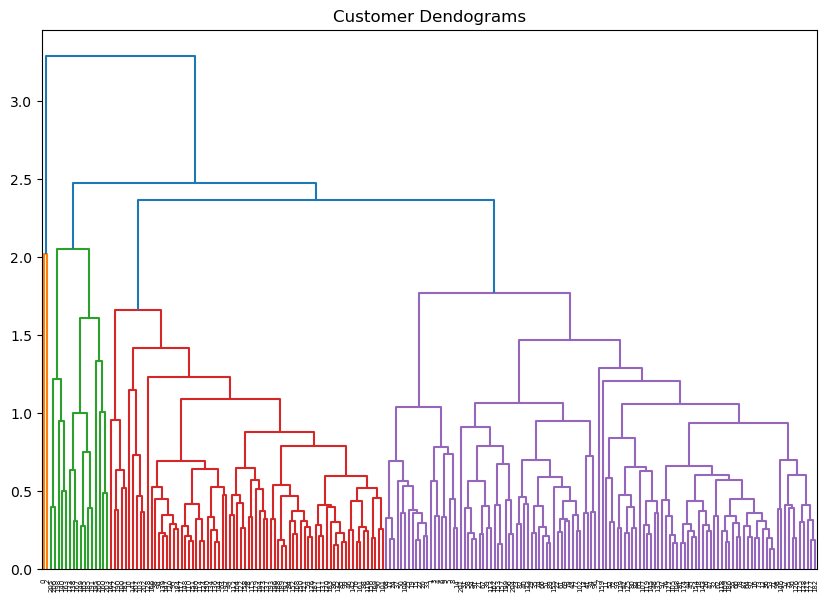

In [77]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(df_MM, method='complete'))

In [84]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
Y = cluster.fit_predict(df_MM)

In [85]:
Y=pd.DataFrame(Y)

In [86]:
 Y.value_counts()

2    116
3     74
0     16
1      2
dtype: int64

In [87]:
from sklearn.cluster import KMeans
KMeans()
kmeans = KMeans(n_clusters=4,random_state=0)

kmeans = kmeans.fit(df_MM)

Y_cluster = kmeans.predict(df_MM)

# Total with in centroid sum of squares 
kmeans.inertia_

62.019425346452394

In [88]:
clust = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_MM)
    clust.append(kmeans.inertia_)

In [89]:
clust

[145.89480553429723,
 96.2816254937067,
 77.13407103414482,
 62.019425346452394,
 55.661745699875546,
 49.28898185948971,
 45.05438323104737,
 40.684382139553946,
 38.772599417077885,
 36.416063708152635]

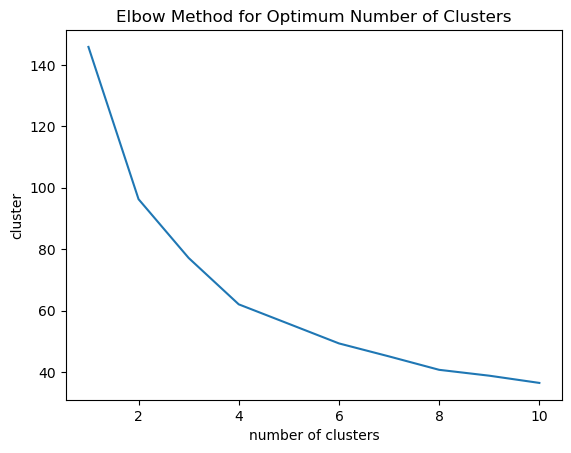

In [119]:
plt.plot(range(1,11),clust)
plt.title('Elbow Method for Optimum Number of Clusters')
plt.xlabel('number of clusters')
plt.ylabel('cluster')
plt.show()

# After Removing Outliers

In [120]:
df_merged.columns

Index(['Birth_Rate', 'Business_Tax_Rate', 'CO2_Emissions',
       'Days_to_Start_Business', 'Energy_Usage', 'GDP', 'Health Exp % GDP',
       'Health_Exp/Capita', 'Hours_to_do_Tax', 'Infant_Mortality_Rate',
       'Internet_Usage', 'Lending_Interest', 'Life_Expectancy_Female',
       'Life_Expectancy_Male', 'Mobile_Phone_Usage', 'Population_0-14',
       'Population_15-64', 'Population_65+', 'Population_Total',
       'Population_Urban', 'Tourism_Inbound', 'Tourism_Outbound'],
      dtype='object')

In [121]:
from sklearn.preprocessing import MinMaxScaler
MM1=MinMaxScaler()
df_MM1=MM1.fit_transform(df_merged)

In [122]:
df_MM1=pd.DataFrame(df_MM1)

In [123]:
df_MM1

0         1         2    3         4    5    6    7         8   \
0    0.843609  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.000000   
1    0.287218  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.000000   
2    0.431579  0.611174  0.425511  0.0  0.000000  0.0  0.0  0.0  0.053585   
3    0.400752  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.000000   
4    0.206892  0.000000  0.000000  0.0  0.000000  0.0  0.0  1.0  0.000000   
..        ...       ...       ...  ...       ...  ...  ...  ...       ...   
203  0.327820  0.000000  0.348641  0.0  0.195916  0.0  0.0  0.0  1.000000   
204  0.254135  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.000000   
205  0.682707  0.100596  0.000000  0.0  0.000000  0.0  0.0  0.0  0.000000   
206  0.858647  0.000000  0.000000  0.0  0.000000  0.0  0.0  0.0  0.000000   
207  0.625564  0.000000  0.000000  1.0  0.000000  0.0  0.0  0.0  0.000000   

           9   ...   12   13        14        15   16        17        18  \
0    0.251417  ...  0.0  0.0  0.168449  0.997652  0.0  0.100972  0.000000   
1    0.000000  ...  0.0  0.0  0.371606  0.525747  0.0  0.427450  0.000000   
2    0.000000  ...  0.0  0.0  0.325792  0.595555  0.0  0.215034  0.274557   
3    0.000000  ...  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.000000   
4    0.000000  ...  0.0  0.0  0.463235  0.000000  0.0  0.000000  0.000000   
..        ...  ...  ...  ...       ...       ...  ...       ...       ...   
203  0.000000  ...  0.0  0.0  0.361425  0.541556  0.0  0.317876  1.000000   
204  0.000000  ...  0.0  0.0  0.319853  0.457349  0.0  0.555722  0.000000   
205  0.000000  ...  0.0  0.0  0.142534  0.911723  0.0  0.132386  0.000000   
206  0.090929  ...  0.0  0.0  0.137443  0.947723  0.0  0.130516  0.000000   
207  0.000000  ...  0.0  0.0  0.147624  0.843168  0.0  0.181376  0.000000   

           19   20   21  
0    0.232923  0.0  0.0  
1    0.478538  0.0  0.0  
2    0.645154  0.0  0.0  
3    0.880000  0.0  0.0  
4    0.897462  0.0  0.0  
..        ...  ...  ...  
203  0.279462  0.0  0.0  
204  0.938308  0.0  0.0  
205  0.295154  0.0  0.0  
206  0.370769  0.0  0.0  
207  0.337769  0.0  0.0  

[208 rows x 22 columns]

In [124]:
df_MM1.columns=['Birth_Rate', 'Business_Tax_Rate', 'CO2_Emissions',
       'Days_to_Start_Business', 'Energy_Usage', 'GDP', 'Health Exp % GDP',
       'Health_Exp/Capita', 'Hours_to_do_Tax', 'Infant_Mortality_Rate',
       'Internet_Usage', 'Lending_Interest', 'Life_Expectancy_Female',
       'Life_Expectancy_Male', 'Mobile_Phone_Usage', 'Population_0-14',
       'Population_15-64', 'Population_65+', 'Population_Total',
       'Population_Urban', 'Tourism_Inbound', 'Tourism_Outbound']

In [125]:
df_MM1

Birth_Rate  Business_Tax_Rate  CO2_Emissions  Days_to_Start_Business  \
0      0.843609           0.000000       0.000000                     0.0   
1      0.287218           0.000000       0.000000                     0.0   
2      0.431579           0.611174       0.425511                     0.0   
3      0.400752           0.000000       0.000000                     0.0   
4      0.206892           0.000000       0.000000                     0.0   
..          ...                ...            ...                     ...   
203    0.327820           0.000000       0.348641                     0.0   
204    0.254135           0.000000       0.000000                     0.0   
205    0.682707           0.100596       0.000000                     0.0   
206    0.858647           0.000000       0.000000                     0.0   
207    0.625564           0.000000       0.000000                     1.0   

     Energy_Usage  GDP  Health Exp % GDP  Health_Exp/Capita  Hours_to_do_Tax  \
0        0.000000  0.0               0.0                0.0         0.000000   
1        0.000000  0.0               0.0                0.0         0.000000   
2        0.000000  0.0               0.0                0.0         0.053585   
3        0.000000  0.0               0.0                0.0         0.000000   
4        0.000000  0.0               0.0                1.0         0.000000   
..            ...  ...               ...                ...              ...   
203      0.195916  0.0               0.0                0.0         1.000000   
204      0.000000  0.0               0.0                0.0         0.000000   
205      0.000000  0.0               0.0                0.0         0.000000   
206      0.000000  0.0               0.0                0.0         0.000000   
207      0.000000  0.0               0.0                0.0         0.000000   

     Infant_Mortality_Rate  ...  Life_Expectancy_Female  Life_Expectancy_Male  \
0                 0.251417  ...                     0.0                   0.0   
1                 0.000000  ...                     0.0                   0.0   
2                 0.000000  ...                     0.0                   0.0   
3                 0.000000  ...                     0.0                   0.0   
4                 0.000000  ...                     0.0                   0.0   
..                     ...  ...                     ...                   ...   
203               0.000000  ...                     0.0                   0.0   
204               0.000000  ...                     0.0                   0.0   
205               0.000000  ...                     0.0                   0.0   
206               0.090929  ...                     0.0                   0.0   
207               0.000000  ...                     0.0                   0.0   

     Mobile_Phone_Usage  Population_0-14  Population_15-64  Population_65+  \
0              0.168449         0.997652               0.0        0.100972   
1              0.371606         0.525747               0.0        0.427450   
2              0.325792         0.595555               0.0        0.215034   
3              0.000000         0.000000               0.0        0.000000   
4              0.463235         0.000000               0.0        0.000000   
..                  ...              ...               ...             ...   
203            0.361425         0.541556               0.0        0.317876   
204            0.319853         0.457349               0.0        0.555722   
205            0.142534         0.911723               0.0        0.132386   
206            0.137443         0.947723               0.0        0.130516   
207            0.147624         0.843168               0.0        0.181376   

     Population_Total  Population_Urban  Tourism_Inbound  Tourism_Outbound  
0            0.000000          0.232923              0.0               0.0  
1            0.000000          0.478538              0.

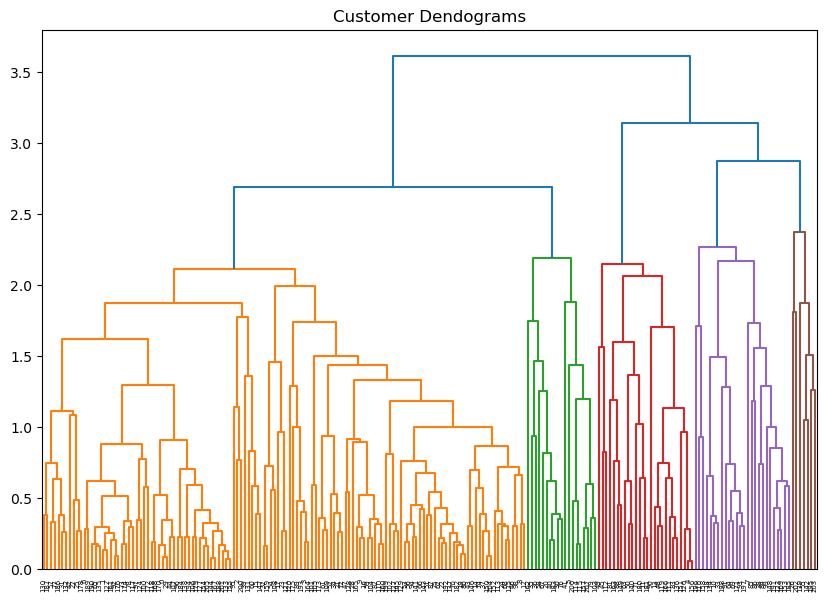

In [126]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(df_MM1, method='complete'))

In [127]:
from sklearn.cluster import AgglomerativeClustering
cluster1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
Y1 = cluster1.fit_predict(df_MM1)

In [128]:
Y1=pd.DataFrame(Y1)

In [129]:
Y1.value_counts()

1    149
0     59
dtype: int64

In [130]:
from sklearn.cluster import KMeans
KMeans()
kmeans1 = KMeans(n_clusters=2,random_state=0)
kmeans1 = kmeans1.fit(df_MM1)
Y_cluster1 = kmeans1.predict(df_MM1)

# Total with in centroid sum of squares 
kmeans1.inertia_

212.637697131186

In [131]:
clust1 = []
for i in range(1, 11):
    kmeans1 = KMeans(n_clusters=i,random_state=0)
    kmeans1.fit(df_MM1)
    clust1.append(kmeans1.inertia_)

In [132]:
clust1

[336.5437929433525,
 212.637697131186,
 181.21472968301725,
 157.36076423051765,
 144.13169255913448,
 130.5402104652338,
 119.38888047107957,
 110.98506360674679,
 106.50761875414639,
 96.5025850393587]

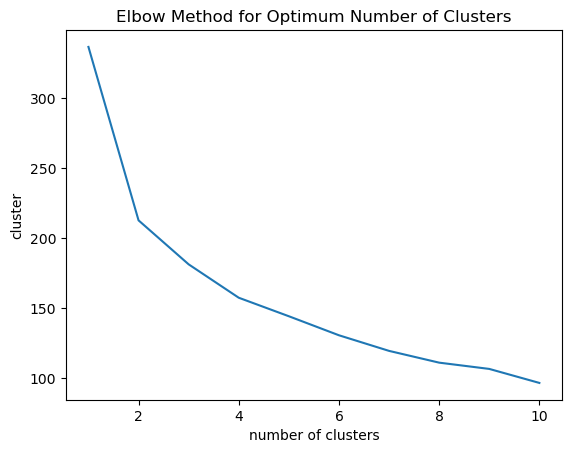

In [133]:
plt.plot(range(1,11),clust1)
plt.title('Elbow Method for Optimum Number of Clusters')
plt.xlabel('number of clusters')
plt.ylabel('cluster')
plt.show()

In [135]:
df_merged["Cluster"]=Y_cluster1

In [136]:
df_merged

Birth_Rate  Business_Tax_Rate  CO2_Emissions  \
Country                                                         
Afghanistan        0.043154         602.609375   80289.659091   
Albania            0.014692         602.609375   80289.659091   
Algeria            0.022077         737.125000  102837.636364   
AmericanSamoa      0.020500         602.609375   80289.659091   
Andorra            0.010583         602.609375   80289.659091   
...                     ...                ...            ...   
Vietnam            0.016769         602.609375   98764.272727   
VirginIslandsUS    0.013000         602.609375   80289.659091   
YemenRep           0.034923         624.750000   80289.659091   
Zambia             0.043923         602.609375   80289.659091   
Zimbabwe           0.032000         602.609375   80289.659091   

                 Days_to_Start_Business  Energy_Usage           GDP  \
Country                                                               
Afghanistan                     54.7875   38273.46875  1.541043e+11   
Albania                         54.7875   38273.46875  1.541043e+11   
Algeria                         54.7875   38273.46875  1.541043e+11   
AmericanSamoa                   54.7875   38273.46875  1.541043e+11   
Andorra                         54.7875   38273.46875  1.541043e+11   
...                                 ...           ...           ...   
Vietnam                         54.7875   43263.75000  1.541043e+11   
VirginIslandsUS                 54.7875   38273.46875  1.541043e+11   
YemenRep                        54.7875   38273.46875  1.541043e+11   
Zambia                          54.7875   38273.46875  1.541043e+11   
Zimbabwe                        82.0625   38273.46875  1.541043e+11   

                 Health Exp % GDP  Health_Exp/Capita  Hours_to_do_Tax  \
Country                                                                 
Afghanistan              0.094769         825.625000       439.859375   
Albania                  0.094769         825.625000       439.859375   
Algeria                  0.094769         825.625000       451.000000   
AmericanSamoa            0.094769         825.625000       439.859375   
Andorra                  0.094769        1354.759615       439.859375   
...                           ...                ...              ...   
Vietnam                  0.094769         825.625000       647.765625   
VirginIslandsUS          0.094769         825.625000       439.859375   
YemenRep                 0.094769         825.625000       439.859375   
Zambia                   0.094769         825.625000       439.859375   
Zimbabwe                 0.094769         825.625000       439.859375   

                 Infant_Mortality_Rate  ...  Life_Expectancy_Male  \
Country                                 ...                         
Afghanistan                   0.082769  ...             79.884615   
Albania                       0.071683  ...             79.884615   
Algeria                       0.071683  ...             79.884615   
AmericanSamoa                 0.071683  ...             79.884615   
Andorra                       0.071683  ...             79.884615   
...                                ...  ...                   ...   
Vietnam                       0.071683  ...             79.884615   
VirginIslandsUS               0.071683  ...             79.884615   
YemenRep                      0.071683  ...             79.884615   
Zambia                        0.075692  ...             79.884615   
Zimbabwe                      0.071683  ...             79.884615   

                 Mobile_Phone_Usage  Population_0-14  Population_15-64  \
Country                                                                  
Afghanistan                0.254545         0.490308          0.735587   
Albania                    0.561538         0.258385          0.735587   
Algeria                    0.492308         0.292692          0.735587   
AmericanSamoa              0.

In [158]:
df_merged.corr()

Birth_Rate  Business_Tax_Rate  CO2_Emissions  \
Birth_Rate                1.000000           0.277232      -0.255909   
Business_Tax_Rate         0.277232           1.000000       0.030200   
CO2_Emissions            -0.255909           0.030200       1.000000   
Days_to_Start_Business    0.276087           0.036473      -0.033052   
Energy_Usage             -0.231706           0.010614       0.961983   
GDP                      -0.331859          -0.000565       0.757571   
Health Exp % GDP         -0.001352           0.091537       0.122894   
Health_Exp/Capita        -0.426341          -0.125657       0.229420   
Hours_to_do_Tax           0.103049           0.192861       0.141289   
Infant_Mortality_Rate     0.519123           0.265637      -0.112285   
Internet_Usage           -0.691426          -0.228751       0.237251   
Lending_Interest          0.269288           0.082480      -0.063023   
Life_Expectancy_Female         NaN                NaN            NaN   
Life_Expectancy_Male     -0.005066          -0.024530      -0.032172   
Mobile_Phone_Usage       -0.663650          -0.222754       0.214514   
Population_0-14           0.862284           0.224921      -0.164699   
Population_15-64         -0.081272          -0.040221       0.080382   
Population_65+           -0.602995          -0.118608       0.289666   
Population_Total         -0.090056           0.070051       0.674596   
Population_Urban         -0.587289          -0.141359       0.227831   
Tourism_Inbound          -0.366934          -0.085568       0.650566   
Tourism_Outbound         -0.343107          -0.048776       0.680424   
Cluster                  -0.345571          -0.051201       0.774743   

                        Days_to_Start_Business  Energy_Usage       GDP  \
Birth_Rate                            0.276087     -0.231706 -0.331859   
Business_Tax_Rate                     0.036473      0.010614 -0.000565   
CO2_Emissions                        -0.033052      0.961983  0.757571   
Days_to_Start_Business                1.000000     -0.026314 -0.050444   
Energy_Usage                         -0.026314      1.000000  0.792474   
GDP                                  -0.050444      0.792474  1.000000   
Health Exp % GDP                     -0.083557      0.131027  0.217482   
Health_Exp/Capita                    -0.166679      0.242355  0.498694   
Hours_to_do_Tax                       0.125538      0.152918 -0.031701   
Infant_Mortality_Rate                 0.195596     -0.071854 -0.124637   
Internet_Usage                       -0.242938      0.251534  0.459416   
Lending_Interest                      0.367713     -0.060349 -0.066151   
Life_Expectancy_Female                     NaN           NaN       NaN   
Life_Expectancy_Male                 -0.025920     -0.031128  0.001674   
Mobile_Phone_Usage                   -0.217768      0.198721  0.356432   
Population_0-14                       0.282779     -0.148354 -0.246020   
Population_15-64                     -0.042501      0.012531  0.047856   
Population_65+                       -0.201122      0.295182  0.468323   
Population_Total                      0.013727      0.712049  0.549218   
Population_Urban                     -0.133368      0.223954  0.336686   
Tourism_Inbound                      -0.143339      0.669167  0.772174   
Tourism_Outbound                     -0.106230      0.725979  0.889119   
Cluster                              -0.066455      0.799134  0.899370   

                        Health Exp % GDP  Health_Exp/Capita  Hours_to_do_Tax  \
Birth_Rate                     -0.001352          -0.426341         0.103049   
Business_Tax_Rate               0.091537          -0.125657         0.192861   
CO2_Emissions                   0.122894           0.229420         0.141289   
Days_to_Start_Business         -0.083557          -0.166679         0.125538   
Energy_Usage                    0.131027           0.242355         0.152918   
GDP                             0.2174

# Model-Evaluation

# Using neural-Neywork concept

In [145]:
x = df_merged.drop(columns=['Cluster'])
y = df_merged['Cluster'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [149]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [153]:
model = Sequential()

model.add(Dense(7,activation='ReLU',input_dim=22))
model.add(Dense(7,activation="ReLU"))
model.add(Dense(7,activation="ReLU"))
model.add(Dense(1,activation='sigmoid'))

In [154]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 7)                 161       
                                                                 
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 7)                 56        
                                                                 
 dense_7 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [155]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [173]:
history = model.fit(X_train_trf,y_train,batch_size=78,epochs=100,validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 0s 115ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 2/100
2/2 [==============================] - 0s 61ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 3/100
2/2 [==============================] - 0s 65ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 71ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 65ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 49ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 49ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 8/100
2/2 [==

In [174]:
model.layers[1].get_weights()

[array([[ 0.02336229,  0.21574055,  0.3188929 ,  0.692228  , -0.26508647,
         -0.6480429 ,  0.15113866],
        [ 0.20480973,  0.7947029 ,  0.5653055 ,  0.18264006,  0.8483069 ,
         -0.41539326, -0.7145898 ],
        [ 0.08687299,  0.29862767,  0.14881393,  0.4872252 ,  0.7663889 ,
          0.31073543, -0.21551242],
        [ 0.2691654 , -0.40209627,  0.5955372 , -0.23637839, -0.0068315 ,
          0.41716447,  0.20693286],
        [-0.42649904,  0.16800751,  0.29666367,  0.07844948, -0.12105747,
          0.5080578 , -0.17743805],
        [-0.6322143 , -0.5346565 , -0.76247287,  1.0565323 , -0.63232684,
         -0.26839292, -0.5126514 ],
        [ 0.8436076 ,  0.67348117,  0.597987  ,  0.3155586 ,  0.59053797,
         -0.49748477,  0.47008514]], dtype=float32),
 array([-0.17096233, -0.30185753, -0.20086968,  0.50243855, -0.29247615,
        -0.15156701, -0.07065065], dtype=float32)]

In [175]:
y_log=model.predict(X_test_trf)

2/2 [==============================] - 0s 0s/step


In [176]:
y_pred=np.where(y_log > 0.5,1,0)

In [177]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0